# 🧭 **Exploratory Data Analysis (EDA): Flights Dataset**

This notebook marks the **Exploratory Data Analysis (EDA)** phase within our **Travel MLOps Project**. Our focus is the **Flights dataset**, which we will dissect to uncover critical insights, identify data quality issues, and lay a robust groundwork for developing our **Flight Price Prediction Model**.

🎯 **Primary Goal of this EDA**:
To gather the necessary understanding and insights to construct a high-performing **Regression Model** capable of accurately predicting flight prices. This model will leverage key features including distance, time, flight class, agency, and travel route.

---

## 📦 **Dataset At a Glance: Flights**

The **Flights dataset** provides structured records of user flight bookings. It encompasses details on travel routes, flight characteristics, pricing (our target variable), and booking agencies.

| Column       | Description                                     |
|--------------|-------------------------------------------------|
| `travelCode` | Unique identifier for each travel itinerary     |
| `userCode`   | Identifier for the user (links to Users table)  |
| `from`       | Origin city/airport of the flight               |
| `to`         | Destination city/airport of the flight          |
| `flightType` | Service class of the flight (e.g., Economy, First Class) |
| `price`      | **Target Variable**: Cost of the flight (USD)   |
| `time`       | Flight duration (in hours)                      |
| `distance`   | Flight distance (e.g., in kilometers or miles)  |
| `agency`     | Airline or travel agency facilitating the booking|
| `date`       | Date of the flight departure                    |

---

## 🎯 **Key Objectives of this Analysis**

This EDA serves several critical functions in our model development lifecycle:

-   **Deep Dive into Data Structure:** We will thoroughly examine the dataset's schema, data types, and the distributions of categorical and numerical features.
-   **Pinpoint Data Quality Concerns:** Our investigation will focus on identifying and quantifying issues such as missing values, outliers, anomalies, and duplicate records.
-   **Evaluate Feature Relationships and Importance:** We aim to understand how each feature correlates with the target variable (`price`) and with other features, highlighting potential predictors.
-   **Inform Preprocessing and Feature Engineering:** The insights gained will directly guide the strategies for data cleaning, transformation, feature selection, and the creation of new, impactful features for the **Flight Price Prediction Model**.

---

## 🔍 **Analytical Approach**

Our exploration of the Flights dataset will involve a comprehensive analysis using descriptive statistics, various data visualizations (histograms, scatter plots, box plots), and correlation studies.

The findings from this process are crucial, as they will directly inform our **feature selection criteria, data transformation techniques, and the overall design of our model training pipeline**, all aimed at achieving accurate flight price predictions.

> Given the manageable number of features in this dataset, we will employ a thorough visualization strategy. This includes generating pair plots for numerical features, frequency plots for categorical features, and comparative plots (like box plots) across numerical and categorical feature combinations. This ensures a comprehensive understanding of inter-feature relationships and patterns.

Let's dive into the data!

## **EDA Summary And Model Pipeline Recommendations for Flight Price Prediction**

A comprehensive summary of the Exploratory Data Analysis (EDA), integrating detailed findings from univariate, bivariate, and multivariate analyses, including aggregations and temporal trend assessments. This summary provides actionable insights crucial for developing a robust and accurate flight price prediction model.

---

## **1. 🗂️ Data Understanding & Quality Assessment**

-   **Schema & Data Types:**
    -   The dataset initially includes `travelCode` and `userCode` which were dropped as they are identifiers. The 8 core features for modeling are: `from` (Origin City), `to` (Destination City), `flightType` (Service Class), `price` (Target Variable), `time` (Flight Duration), `distance` (Flight Distance), `agency` (Airline Agency), and `date` (Flight Date).
    -   **Categorical Features:** `from`, `to` (9 unique cities each), `flightType` (3 unique values: 'economic', 'premium', 'firstClass'), `agency` (3 unique values). These, along with extracted `year` and `day_name`, were converted to `category` dtype.
    -   **Numerical Features:** `price`, `time`, `distance` were downcast to `float32`. Extracted `month` and `day` were optimized to `uint8`.
    -   **Temporal Feature:** `date` was converted to `datetime64[ns]` objects, and features like `year`, `month`, `day`, `day_name` were extracted and `month`, `day` can be converted to `cyclic` encoding for better performance.

-   **Dataset Size & Integrity:**
    -   **Initial State:** The raw dataset (before dropping unique identifiers for duplication check on core features) contained 271,888 rows.
    -   **Duplicate Records:** After removing `travelCode` and `userCode`, **45.02%** of the records were found to be duplicates based on the remaining flight attributes.
    -   **Deduplicated Dataset:** After removal of these duplicates, the dataset consists of **149,484 unique flight records**.
    -   **Critical Action:** Deduplication is paramount before any modeling to prevent data leakage and model bias, ensuring the model learns from unique instances.

-   **Missing Values Assessment:**
    -   ✅ The current dataset (after deduplication and processing) shows **no missing values** in any column, as confirmed by `flights.info()` showing non-null counts equal to the total number of entries for all columns.
    -   **Proactive Strategy:** Despite current completeness, production pipelines must include robust imputation strategies (e.g., mean/median/mode imputation for numerical, constant/mode for categorical) to handle potential missing data in new, incoming flight records.

-   **Memory Efficiency:**
    -   Strategic downcasting of numerical types (e.g., `float64` to `float32`, appropriate `uint` types for date components) and conversion of object strings to `category` dtype resulted in a substantial memory usage reduction. The memory footprint for the 149,484 records was reduced from over **10.3 MB** (with initial dtypes after loading and dropping original ID columns) to approximately **5.1 MB** after all optimizations.
    -   **Production Implication:** Utilizing optimized data types is crucial for faster processing, reduced memory footprint, and improved scalability in production environments.

---

## **2. 🎯 Target Variable (`price`) Analysis**

-   **Distributional Characteristics (from `flights.describe()` and skewness calculation):**
    -   **Central Tendency:** Mean: **\$949.42**, Median: **\$898.04**. The mean being higher than the median indicates a positive skew.
    -   **Spread & Range:** Min: **\$301.51**, Max: **\$1754.17**. Standard Deviation: **\$358.45**.
    -   **Quartiles:** 25th Percentile (Q1): **\$669.83**, 75th Percentile (Q3): **\$1214.82**. Interquartile Range (IQR): \$544.99.
    -   **Skewness:** The `price` distribution is **slightly right-skewed** (skewness ~0.53), with a longer tail towards higher prices. This was confirmed by visual inspection (histograms, box plots in the notebook) and skewness statistics.

-   **Implications for Modeling:**
    -   The presence of higher-priced outliers and the right skew can disproportionately influence models sensitive to data distribution (e.g., linear regression).
    -   **Action:** Consider applying a **log transformation** (e.g., `np.log1p`) to the `price` variable to normalize its distribution, stabilize variance, and potentially improve model performance and interpretability.

---

## **3. 🏗️ Feature Analysis, Relationships & Engineering Insights**

-   **Numerical Features (`distance`, `time`):**
    -   **Correlation with `price`:** Both `distance` and `time` exhibit a **moderately strong positive correlation** with `price` (correlation coefficients around **0.65**, as seen in the correlation heatmap). Longer flights (in distance or duration) generally cost more.
    -   **Inter-Correlation (Multicollinearity):** `distance` and `time` are **almost perfectly positively correlated** with each other (correlation coefficient **~1.0** from the heatmap). They essentially convey redundant information.
        -   `distance`: Mean: **524.68 units**, Median: **555.74 units**. Range: 168.22 to 937.77 units. Skewness ~0.00 (nearly symmetric).
        -   `time`: Mean: **1.36 hours**, Median: **1.44 hours**. Range: 0.44 to 2.44 hours. Skewness ~0.00 (nearly symmetric).
    -   **Distribution:** Both `distance` and `time` are nearly symmetric with very low skewness, confirmed by histograms and skewness statistics in the notebook.

-   **Categorical Features (`from`, `to`, `flightType`, `agency`):**
    -   **Cardinality:** `from` (9 unique cities), `to` (9 unique cities), `flightType` (3 unique values: 'economic', 'premium', 'firstClass'), `agency` (3 unique values).
    -   **Impact on `price`, `distance`, and `time` (Insights from Mean, Mode, and Sum Aggregations via Bivariate Plots in Notebook):**
        -   **`flightType`:**
            -   **Price:** The **strongest differentiator**.
                -   *Mean/Median Price:* 'firstClass' (e.g., mean ~\$1500 from plots) > 'premium' (mean ~\$900) > 'economic' (mean ~\$800).
                -   *Mode Price:* Similar stratification observed in mode price bar plots.
                -   *Sum Price (Total Revenue):* 'firstClass' generates the most total revenue, followed by 'premium' and 'economic', indicating its high value.
            -   **Distance/Time:** 'firstClass' flights are associated with the highest mean, mode, and sum of distances and times, suggesting they are often longer-haul. 'economic' and 'premium' show similar total distance/time.
        -   **`agency`:**
            -   **Price:**
                -   *Mean Price:* 'FlyingDrops' shows the highest mean price, followed by 'CloudFy', then 'Rainbow'.
                -   *Mode Price:* 'FlyingDrops' shows higher common prices.
                -   *Sum Price (Total Revenue):* 'CloudFy' and 'Rainbow' are market leaders in total revenue, while 'FlyingDrops' has significantly less, suggesting a niche, higher-margin strategy for FlyingDrops.
            -   **Distance/Time:** 'Rainbow' and 'CloudFy' cover the largest total distance and time. 'FlyingDrops' has the highest *mean* distance/time.
        -   **`from` & `to` (Routes):**
            -   **Price:**
                -   *Mean/Median Price:* Flights involving **Salvador (BH)** and **Florianopolis (SC)** (as origin or destination) consistently show higher average prices. **Sao Paulo (SP)** and **Natal (RN)** are generally more affordable.
                -   *Sum Price (Total Revenue):* **Florianopolis (SC)** as a destination and origins like **Aracaju (SE), Campo Grande (MS), Brasilia (DF)** are among top revenue generators.
            -   **Distance/Time:**
                -   *Mean/Median Distance/Time:* Routes involving **Salvador (BH)** and **Florianopolis (SC)** show longer average distances/times.
                -   *Sum Distance/Time:* **Florianopolis (SC)** (origin and destination) and **Aracaju (SE)** account for high cumulative flight distances/times.

-   **Temporal Feature (`date` and extracted components):**
    -   **Range:** Data spans from **2019-09-26 to 2023-07-24**.
    -   **Flight Volume Patterns (from Bar Plots & `describe()` output):**
        -   **Yearly:** Peak flight volume observed in **2020** (55,095 flights in the deduplicated dataset).
        -   **Monthly:** Strong seasonality with the highest flight volumes in **Q4 (October, November, December)**. August shows the lowest volume.
        -   **Weekly:** **Thursday** is the busiest day with **52,115 flights** in the deduplicated dataset. Other days like Monday, Sunday, Friday, Saturday show comparable, lower volumes.
    -   **Average Price, Time, and Distance Trends (from Line Plots in Notebook):**
        -   **Yearly Trends:**
            -   *Average Price:* Shows volatility, with a potential peak around 2020-2021, followed by adjustments.
            -   *Average Time/Distance:* Appear relatively stable across the years with minor fluctuations.
        -   **Monthly Trends (Seasonality):**
            -   *Average Price:* Clear seasonality; peaks during summer (e.g., June-August) and end-of-year (e.g., December). Lower in off-peak months (e.g., February, November).
            -   *Average Time/Distance:* Subtle seasonal pattern, slight increase during peak vacation periods.
        -   **Weekly Trends (Day-of-Week):**
            -   *Average Price:* Fluctuates, commonly higher on Fridays and Sundays. Mid-week often lower. Thursday shows moderate average prices despite high volume.
            -   *Average Time/Distance:* Variations less pronounced; slight tendency for longer average flights on weekends.
    -   **Action:** These strong temporal trends necessitate feature engineering.

-   **Recommended Feature Engineering (based on notebook actions and EDA insights):**
    -   **Route Definition:** Create a `route` feature by combining `from` and `to`.
    -   **Temporal Features (Implemented & Potential):** `year`, `month`, `day`, `day_name` were extracted. Further consider  `is_weekend`, `is_thursday` flag, and cyclical encoding for `month` and `day_of_week`.
    -   **Categorical Encoding:**
        -   `flightType`, `agency`: One-hot encoding is suitable.
        -   `route`, `from`, `to`: Consider target encoding (with careful cross-validation), frequency encoding, or embedding layers.
        **Cyclic Encoding:**
        -   `month`, `day`
    -   **Interaction Features:** Explore interactions like `route_flightType`, `agency_month`, or `flightType_day_of_week`.

---

## **4. 🚨 Outlier Detection & Treatment**

-   **Observations:**
    -   `price` exhibits right-skewness, with outliers on the higher end. Box plots for categorical features vs. `price` (e.g., `flightType` vs. `price` in the notebook) visually confirm that 'firstClass' and certain agencies/routes contribute more to these higher-priced outliers. `time` and `distance` are nearly symmetric and show fewer extreme outliers compared to `price`.
-   **Actionable Strategies:**
    -   **Detection:** IQR method or Z-scores can be used.
    -   **Treatment:** For `price`, log transformation is the primary strategy suggested. For other features, if extreme outliers persist and affect sensitive models, consider capping. Tree-based models are generally more robust to outliers.

---

## **5. 🕵️ Data Leakage & Bias Risks**

-   **Duplicate Data:** Mitigated by thorough deduplication after removing non-predictive identifiers.
-   **Temporal Consistency:** **Critical:** The notebook utilizes a `chronological_split` function. A **time-based split** for model training/validation/testing is essential to simulate real-world deployment and prevent temporal leakage, ensuring the model generalizes to future unseen data.

---

## **6. 🤖 Modeling Considerations & Strategy**

-   **Baseline Model:** Tree-based ensembles like Random Forest Regressor or Gradient Boosting Regressor are good starting points due to their robustness to outliers and ability to capture non-linearities.
-   **Feature Importance & Selection:**
    -   **Primary Drivers:** `flightType`, `route` (or `from`/`to`), `agency`, and temporal features (`month`, `day_of_week`, `year`) are expected to be highly important based on EDA.
    -   **Secondary Drivers:** `distance` (or `time`).
    -   **Multicollinearity:** Given the ~1.0 correlation between `distance` and `time`, use only one (e.g., `distance`) to avoid multicollinearity issues in some models.
-   **Evaluation Metrics:** Standard regression metrics like RMSE (Root Mean Squared Error), MAE (Mean Absolute Error), R² (R-squared), and MAPE (Mean Absolute Percentage Error).
-   **Iterative Refinement:** Plan for hyperparameter tuning, further feature importance analysis, and residual analysis to improve the model.
-   **Capturing Temporal Dynamics:** The model must be structured to effectively learn the strong yearly, monthly, and weekly patterns observed in both flight volume and average price/time/distance.

---

## **📋 Summary Table of Key Actions & Strategies**

| **Lifecycle Stage**       | **Key Action / Strategy**                                                                                                | **Rationale / Detail**                                                                                                |
| :------------------------ | :----------------------------------------------------------------------------------------------------------------------- | :-------------------------------------------------------------------------------------------------------------------- |
| **Data Ingestion & Cleaning** | Rigorous deduplication (45.02% duplicates removed after dropping identifiers); Implement robust missing value imputation in production pipeline. | Prevent bias/leakage; Handle real-world data imperfections. Final dataset: 149,484 rows.                                                            |
|                           | Optimize data types (categorical, float32, uint types).                                                                  | Improve memory efficiency (10.3MB to 5.1MB) and processing speed.                                                     |
| **Target Variable Prep**  | Apply log transformation to `price` (skewness ~0.53).                                                                    | Normalize distribution, stabilize variance, improve model performance for skewed target.                              |
| **Feature Engineering**   | Create `route`; Extract comprehensive temporal features (`year`, `month`, `day`, `day_name`; consider cyclical, `is_thursday`). | Capture key predictive signals from location, time, and observed anomalies (e.g., Thursday volume).                 |
|                           | Implement appropriate encoding for categorical features (one-hot, target encoding).                                      | Convert categorical data into a model-usable format effectively.                                                      |
| **Outlier Management**    | Detect outliers (visualized via boxplots); Log-transform `price`; Consider capping for other features if needed.           | Mitigate undue influence of extreme values, especially for `price`.                                                   |
| **Data Splitting**        | **Strict time-based split** (e.g., using `chronological_split`) for training, validation, and test sets.                 | Prevent temporal data leakage and ensure realistic performance evaluation.                                          |
| **Model Selection**       | Start with tree-based ensemble models (Random Forest, Gradient Boosting).                                                | Robust to outliers, handle mixed data types well, capture non-linearities and interactions.                           |
| **Feature Selection**     | Address multicollinearity: use `distance` OR `time` (corr ~1.0). Evaluate feature importances from baseline model.       | Avoid unstable coefficients, improve interpretability, focus on impactful features.                                     |
| **Model Evaluation**      | Use RMSE/MAE as primary metrics; R² and MAPE as secondary.                                                               | Quantify prediction accuracy and relative error.                                                                      |
| **Iteration & Deployment**| Iteratively refine features and hyperparameters; Monitor model performance over time post-deployment.                      | Continuously improve model and adapt to changing data patterns (concept drift).                                       |

---

### **Import Necessary Libraries and Packages**

In [1]:
# reloads the modules automatically
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd

%matplotlib inline

In [3]:
# Move to the parent directory and import utils
import sys

sys.path.append("../")
import utils

In [ ]:
# from utils folder import specific functions from data_utils which contains basic data operations
from utils.data_utils import (
    check_duplicates,
    generate_eda_report,
    get_date_stats,
    count_rows_between_dates,
    check_missing,
    optimize_dtypes,
    skewness,
)

from utils.plots_utils import (
    plot_flights_per_year,
    plot_flights_per_month,
    histograms,
    boxplots,
    barplot_univariate,
    pairplots,
    boxplot_bivariate,
    barplot_bivariate,
    correlation_heatmap,
)

from utils.data_splitting import chronological_split

ImportError: cannot import name 'flights_distribution' from 'utils.plots_utils' (c:\Users\dave\Desktop\Flights_Mlops\Notebooks\..\utils\plots_utils.py)

### **Load The Dataset**

In [6]:
# relative path to the dataset
flights_path = "../data/flights.csv"
# Load the csv dataset
flights = pd.read_csv(flights_path)

In [7]:
# view first five rows
# flights.head()

# view 5 random samples
flights.sample(5)

,travelCode,userCode,from,to,flightType,price,time,distance,agency,date
250505,125252,1236,Campo Grande (MS),Florianopolis (SC),premium,1031.59,1.49,573.81,CloudFy,07/10/2020
118864,59432,576,Campo Grande (MS),Brasilia (DF),economic,517.82,0.72,277.70,Rainbow,12/03/2020
31444,15722,156,Brasilia (DF),Campo Grande (MS),economic,583.60,0.72,277.70,CloudFy,11/19/2020
127774,63887,621,Campo Grande (MS),Natal (RN),firstClass,778.01,0.65,250.68,Rainbow,06/17/2021
36137,18068,179,Natal (RN),Aracaju (SE),economic,301.61,0.46,176.33,Rainbow,02/03/2020


- Dataset loaded to flights variable as a pandas dataframe

### **Checking Duplicates**

In [8]:
# check duplicates
check_duplicates(flights)  # takes input dataframe

Percentage of rows involved in duplication: 0.00%


#### **Duplicate Values Insights**

- No Duplicate values were found.

### **Relevance of `travelCode` and `userCode` in EDA**

The `travelCode` and `userCode` columns primarily serve as identifiers.

*   **`travelCode`**: This links related flight segments, such as an outbound and its corresponding return trip. For example:

    | travelCode | userCode | from             | to                 | date       |
    |------------|----------|------------------|--------------------|------------|
    | 0          | 0        | Recife (PE)      | Florianopolis (SC) | 09/26/2019 |
    | 0          | 0        | Florianopolis (SC)| Recife (PE)        | 09/30/2019 |

*   **`userCode`**: This links flights to specific users, enabling connections to the `users.csv` data.

*   It's possible for different `travelCode` or `userCode` entries to correspond to flights with identical details (route, price, time, distance, agency). This can happen if multiple users book the same flight. Including these identifiers directly in analyses focused on flight attributes without aggregation could potentially cause **Bias** in a model by over-representing frequently booked flight configurations.

In [9]:
# Drop primary and foreign keys
flights.drop(columns=["travelCode", "userCode"], inplace=True)

In [10]:
# view the changes
flights.head()

,from,to,flightType,price,time,distance,agency,date
0,Recife (PE),Florianopolis (SC),firstClass,1434.38,1.76,676.53,FlyingDrops,09/26/2019
1,Florianopolis (SC),Recife (PE),firstClass,1292.29,1.76,676.53,FlyingDrops,09/30/2019
2,Brasilia (DF),Florianopolis (SC),firstClass,1487.52,1.66,637.56,CloudFy,10/03/2019
3,Florianopolis (SC),Brasilia (DF),firstClass,1127.36,1.66,637.56,CloudFy,10/04/2019
4,Aracaju (SE),Salvador (BH),firstClass,1684.05,2.16,830.86,CloudFy,10/10/2019


### **Checking And Handling duplicate values after removing unique identifiers(`travelCode` and `userCode`)**


In [ ]:
# function to check percentage of duplicate values
check_duplicates(flights)

Percentage of rows involved in duplication: 45.02%


- This suggest many of the duplicates were hidded due to unique identifiers

In [12]:
# remove duplicates
flights.drop_duplicates(inplace=True)
check_duplicates(flights)


Percentage of rows involved in duplication: 0.00%


#### ✈️ **Addressing Duplicate Flight Records**

Our analysis revealed a significant number of duplicate entries within the dataset:

-   **Substantial Duplicate Presence:**
    Approximately **45.02%** of the flight records were identified as duplicates. This high percentage is attributed to multiple unique `travelCode` and `userCode` entries corresponding to identical flight details (route, timing, price, etc.), likely representing different bookings for the same underlying flight service.

-   **Critical Preprocessing Step: Duplicate Removal:**
    🚮 It is crucial to **remove these duplicate records** before proceeding with further analysis or model training.
    -   **Impact on Analysis:** Retaining duplicates would skew descriptive statistics and visualizations, leading to inaccurate interpretations of flight patterns and pricing.
    -   **Impact on Modeling:** For machine learning, these duplicates can introduce significant bias, leading to an overestimation of model performance on seen data and poor generalization to new, unseen flight queries. Removing them ensures model integrity and more reliable predictions.

---

### 📑 **Automated Basic Stats Report with `ydata-profiling`**
- This will calculate basic stats about flights dataset and wont perform any extensive eda which may cause data leakage and bias.

In [13]:
flights.head()

,from,to,flightType,price,time,distance,agency,date
0,Recife (PE),Florianopolis (SC),firstClass,1434.38,1.76,676.53,FlyingDrops,09/26/2019
1,Florianopolis (SC),Recife (PE),firstClass,1292.29,1.76,676.53,FlyingDrops,09/30/2019
2,Brasilia (DF),Florianopolis (SC),firstClass,1487.52,1.66,637.56,CloudFy,10/03/2019
3,Florianopolis (SC),Brasilia (DF),firstClass,1127.36,1.66,637.56,CloudFy,10/04/2019
4,Aracaju (SE),Salvador (BH),firstClass,1684.05,2.16,830.86,CloudFy,10/10/2019


In [ ]:
# this function generates a minimal basic stats report

# generate_eda_report(
#     flights,
#     "Flights EDA Report",
#     "../reports/eda/flights_eda_report.html",
#     minimal=True,
#     explorative=False,
# )

### **Column Information, Feature creation and DataType Opimization**

In [ ]:
# df info
flights.info()

<class 'pandas.core.frame.DataFrame'>
Index: 149484 entries, 0 to 271851
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   from        149484 non-null  object 
 1   to          149484 non-null  object 
 2   flightType  149484 non-null  object 
 3   price       149484 non-null  float64
 4   time        149484 non-null  float64
 5   distance    149484 non-null  float64
 6   agency      149484 non-null  object 
 7   date        149484 non-null  object 
dtypes: float64(3), object(5)
memory usage: 10.3+ MB


In [16]:
# shows number of unique values for each column
flights.nunique()

from            9
to              9
flightType      3
price         490
time           33
distance       35
agency          3
date          999
dtype: int64

#### **Breaking Date Column**
- Extracting Year, Month , Day and Day name from Date column

In [17]:
flights["date"] = pd.to_datetime(flights["date"], errors="coerce")
flights["month"] = flights["date"].dt.month
flights["year"] = flights["date"].dt.year
flights["day"] = flights["date"].dt.day
flights["day_name"] = flights["date"].dt.day_name()
flights.head()


,from,to,flightType,price,time,distance,agency,date,month,year,day,day_name
0,Recife (PE),Florianopolis (SC),firstClass,1434.38,1.76,676.53,FlyingDrops,2019-09-26,9,2019,26,Thursday
1,Florianopolis (SC),Recife (PE),firstClass,1292.29,1.76,676.53,FlyingDrops,2019-09-30,9,2019,30,Monday
2,Brasilia (DF),Florianopolis (SC),firstClass,1487.52,1.66,637.56,CloudFy,2019-10-03,10,2019,3,Thursday
3,Florianopolis (SC),Brasilia (DF),firstClass,1127.36,1.66,637.56,CloudFy,2019-10-04,10,2019,4,Friday
4,Aracaju (SE),Salvador (BH),firstClass,1684.05,2.16,830.86,CloudFy,2019-10-10,10,2019,10,Thursday


#### **Optimize Dataypes**

In [ ]:
# optimize_dtypes function automatically based on a criteria converts datatypes to optimal
flights = optimize_dtypes(flights)
flights.info()

<class 'pandas.core.frame.DataFrame'>
Index: 149484 entries, 0 to 271851
Data columns (total 12 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   from        149484 non-null  category      
 1   to          149484 non-null  category      
 2   flightType  149484 non-null  category      
 3   price       149484 non-null  float32       
 4   time        149484 non-null  float32       
 5   distance    149484 non-null  float32       
 6   agency      149484 non-null  category      
 7   date        149484 non-null  datetime64[ns]
 8   month       149484 non-null  uint8         
 9   year        149484 non-null  uint16        
 10  day         149484 non-null  uint8         
 11  day_name    149484 non-null  category      
dtypes: category(5), datetime64[ns](1), float32(3), uint16(1), uint8(2)
memory usage: 5.3 MB


In [ ]:
# year to category type
flights["year"] = flights["year"].astype("category")
flights.info()

<class 'pandas.core.frame.DataFrame'>
Index: 149484 entries, 0 to 271851
Data columns (total 12 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   from        149484 non-null  category      
 1   to          149484 non-null  category      
 2   flightType  149484 non-null  category      
 3   price       149484 non-null  float32       
 4   time        149484 non-null  float32       
 5   distance    149484 non-null  float32       
 6   agency      149484 non-null  category      
 7   date        149484 non-null  datetime64[ns]
 8   month       149484 non-null  uint8         
 9   year        149484 non-null  category      
 10  day         149484 non-null  uint8         
 11  day_name    149484 non-null  category      
dtypes: category(6), datetime64[ns](1), float32(3), uint8(2)
memory usage: 5.1 MB



#### **Column Information and Data Type Optimization**

Effective data management is crucial for efficient analysis and model training. This section details the steps taken to inspect the dataset's structure, understand its column types, and optimize these types for better memory usage and computational performance.

#### **Initial Data Structure**

Upon loading and initial cleaning (including duplicate removal), the dataset comprised 149,484 flight records. A preliminary check using `flights.info()` revealed the following data types:

*   **Object Types**: `from`, `to`, `flightType`, `agency`, `date`. These are typically strings and require careful handling.
*   **Float64 Types**: `price`, `time`, `distance`. These are standard 64-bit floating-point numbers.

The `flights.nunique()` command was used to assess the number of unique values in each column, providing an early indication of which columns might be suitable for conversion to more memory-efficient types like `category`.

#### **Date Feature Engineering and Standardization**

The `date` column, initially an object type, is vital for time-series analysis and understanding temporal patterns. The following transformations were applied:

*   **Conversion to Datetime**: The `date` column was converted to Pandas' `datetime64[ns]` format using `pd.to_datetime(flights["date"], errors="coerce")`. This standardization is essential for performing date-specific operations.
*   **Feature Extraction**: To leverage temporal information more directly, new columns were extracted from the `date` column:
    *   `month`: The month of the flight (e.g., 1 for January, 12 for December).
    *   `year`: The year of the flight.
    *   `day`: The day of the month.
    *   `day_name`: The name of the day of the week (e.g., Monday, Tuesday).

These new features allow for more granular analysis of trends related to specific times of the year or days of the week.

#### **Data Type Optimization Strategy**

To enhance performance and reduce the memory footprint of the dataset, the following data type optimizations were implemented using a custom `optimize_dtypes` function and specific column conversions:

*   **Categorical Conversion for Low Cardinality Features**:
    *   Columns such as `from`, `to`, `flightType`, `agency`, and the newly created `year` were identified as having a relatively small number of unique values (low cardinality).
    *   These were converted from `object` or numerical types to the `category` dtype. This is highly beneficial as Pandas stores `category` data more efficiently by using integer codes internally, significantly reducing memory usage for repetitive string data.

*   **Downcasting Numerical Features**:
    *   The numerical columns `price`, `time`, and `distance`, initially `float64`, were downcast to `float32`. This conversion reduces the memory required for each floating-point number by half, often without a practical loss of precision for the type of data represented (e.g., flight prices, durations, distances).

*   **Optimizing Extracted Date Components**:
    *   The newly created `month` and `day` columns, representing integer values within a small range, were optimized to `uint8` (unsigned 8-bit integer). However for Modeling month and day can be converted to  `cyclic`.
    *   The `year` column, before its conversion to `category`, was suitable for `uint16` (unsigned 16-bit integer).

#### **Impact of Optimization**

The combined effect of these data type optimizations was substantial:

*   **Memory Reduction**: The dataset's memory usage was significantly reduced. Initially, after basic loading and cleaning, the memory footprint was over 10.3 MB. After the optimization process, this was brought down to approximately **5.1 MB**.
*   **Performance Gains**: Smaller data types lead to faster processing for many Pandas operations and can accelerate the training of machine learning models.

By thoughtfully optimizing data types, we ensure that the dataset is not only memory-efficient but also primed for faster and more effective subsequent analytical and modeling tasks. This step is a best practice in any data science workflow, particularly when dealing with larger datasets.

---

### **5 Number Summary**

In [24]:
flights.sample(5)

,from,to,flightType,price,time,distance,agency,date,month,year,day,day_name
41895,Rio de Janeiro (RJ),Recife (PE),economic,932.590027,2.30,885.570007,Rainbow,2020-07-20,7,2020,20,Monday
223103,Rio de Janeiro (RJ),Florianopolis (SC),economic,519.099976,1.21,466.299988,Rainbow,2023-04-09,4,2023,9,Sunday
168883,Brasilia (DF),Natal (RN),premium,1107.520020,1.43,550.690002,Rainbow,2019-12-20,12,2019,20,Friday
153618,Natal (RN),Brasilia (DF),firstClass,1192.619995,1.43,550.690002,FlyingDrops,2021-07-22,7,2021,22,Thursday
13586,Recife (PE),Salvador (BH),premium,1249.829956,2.05,788.549988,Rainbow,2021-06-24,6,2021,24,Thursday


In [ ]:
# descibe basic stats numerical columns
flights.describe(include="number")

,price,time,distance,month,day
count,149484.000000,149484.000000,149484.000000,149484.000000,149484.000000
mean,949.422363,1.363235,524.676514,6.579473,15.757258
std,358.446228,0.547743,210.998199,3.587578,8.817627
min,301.510010,0.440000,168.220001,1.000000,1.000000
25%,669.830017,0.850000,327.549988,3.000000,8.000000
50%,898.039978,1.440000,555.739990,7.000000,16.000000
75%,1214.819946,1.760000,676.530029,10.000000,23.000000
max,1754.170044,2.440000,937.770020,12.000000,31.000000


In [ ]:
# descibe basic stats categorical  columns
flights.describe(include=["object", "category"])

,from,to,flightType,agency,year,day_name
count,149484,149484,149484,149484,149484,149484
unique,9,9,3,3,5,5
top,Florianopolis (SC),Florianopolis (SC),firstClass,Rainbow,2020,Thursday
freq,18800,31438,64169,64167,55095,52115



#### **Descriptive Statistics: The Five-Number Summary and Categorical Overview**

To gain a foundational understanding of the dataset's characteristics, descriptive statistics were computed for both numerical and categorical features. This includes the five-number summary (minimum, first quartile (Q1), median (Q2), third quartile (Q3), and maximum) for numerical variables, and frequency distributions for categorical variables.

#### **Numerical Feature Summary**

The `flights.describe(include="number")` method provided key statistical measures for the numerical columns: `price`, `time`, `distance`, `month`, and `day`.

*   **`price` (Target Variable)**:
    *   **Mean**: Approximately 949.42 currency units.
    *   **Standard Deviation**: Approximately 358.45, indicating a moderate spread in prices.
    *   **Minimum**: 301.51 currency units.
    *   **25th Percentile (Q1)**: 669.83 currency units.
    *   **Median (50th Percentile)**: 898.04 currency units. The median being slightly lower than the mean suggests a mild positive (right) skew in the price distribution, implying a larger number of flights at lower price points with a tail of higher-priced flights.
    *   **75th Percentile (Q3)**: 1214.82 currency units. The interquartile range (IQR = Q3 - Q1) is approximately 544.99.
    *   **Maximum**: 1754.17 currency units.
    *   *Interpretation*: Flight prices exhibit a considerable range, with most falling within the IQR. The skewness indicates that while the bulk of prices are below 1000 units, there are instances of significantly higher prices.

*   **`time` (Flight Duration in Hours)**:
    *   **Mean**: Approximately 1.36 hours.
    *   **Standard Deviation**: Approximately 0.55 hours, reflecting moderate variability in flight durations.
    *   **Minimum**: 0.44 hours (approximately 26 minutes).
    *   **Median**: 1.44 hours. The median is very close to the mean, suggesting a relatively symmetric distribution of flight times.
    *   **Maximum**: 2.44 hours.
    *   *Interpretation*: Flight durations are generally clustered around the mean, with a limited range from short hops to medium-length flights.

*   **`distance` (Flight Distance)**:
    *   **Mean**: Approximately 524.68 units (e.g., kilometers).
    *   **Standard Deviation**: Approximately 211.00 units, indicating a fairly wide spread in flight distances.
    *   **Minimum**: 168.22 units.
    *   **Median**: 555.74 units. The median being slightly higher than the mean suggests a slight negative (left) skew, though the distribution is close to symmetrical.
    *   **Maximum**: 937.77 units.
    *   *Interpretation*: The dataset covers a diverse range of flight distances, from short regional flights to longer domestic routes.

*   **`month` and `day`**:
    *   These features, derived from the `date`, represent the month of the year (1-12) and the day of the month (1-31). Their distributions are as expected, covering the full range of possible values. The mean for `month` is around 6.58, and for `day` is around 15.76, indicating data is spread across the calendar.

#### **Categorical Feature Summary**

The `flights.describe(include=["object", "category"])` method provided insights into categorical columns:

*   **`from` (Origin City/Airport)**:
    *   **Unique Values**: 9 distinct origin locations.
    *   **Top (Most Frequent)**: "Florianopolis (SC)" with 18,800 occurrences.
    *   *Interpretation*: Indicates a limited set of departure points, with Florianopolis (SC) being a primary hub.

*   **`to` (Destination City/Airport)**:
    *   **Unique Values**: 9 distinct destination locations.
    *   **Top (Most Frequent)**: "Florianopolis (SC)" with 31,438 occurrences.
    *   *Interpretation*: Similar to origins, destinations are concentrated, with Florianopolis (SC) also being a major arrival hub. The higher frequency as a destination suggests it might be a more common endpoint or a central connecting point.

*   **`flightType` (Service Class)**:
    *   **Unique Values**: 3 distinct flight types.
    *   **Top (Most Frequent)**: "firstClass" with 64,169 occurrences.
    *   *Interpretation*: First class is the most represented service type in this dataset, followed by other classes like economic and premium.

*   **`agency` (Booking Agency)**:
    *   **Unique Values**: 3 distinct agencies.
    *   **Top (Most Frequent)**: "Rainbow" with 64,167 occurrences.
    *   *Interpretation*: The "Rainbow" agency handles the largest volume of bookings in this dataset.

*   **`year`**:
    *   **Unique Values**: 5 distinct years.
    *   **Top (Most Frequent)**: 2020 with 55,095 occurrences.
    *   *Interpretation*: The data spans five years, with 2020 having the highest representation of flight records.

*   **`day_name` (Day of the Week)**:
    *   **Unique Values**: 5 distinct day names (e.g., Monday to Friday, as weekends were noted to be excluded).
    *   **Top (Most Frequent)**: "Thursday" with 52,115 occurrences.
    *   *Interpretation*: Flights are distributed across the weekdays, with Thursday showing the highest frequency in this particular dataset.

#### **Overall Summary**

The descriptive statistics reveal a dataset characterized by flights primarily within a domestic or regional scope, given the distance and time ranges. Prices show variability and a slight positive skew. Key hubs, flight classes, and agencies are evident from the categorical data. The temporal distribution indicates that the data is spread across several years, with specific years and days of the week showing higher flight volumes. These initial statistics are crucial for understanding data distributions, identifying potential outliers, and informing subsequent feature engineering and modeling decisions.

---


### **Date Analysis for Splitting Criteria**

- To **prevent data leakage** and ensure robust model performance, it is essential to use only historical (past) data during exploratory data analysis (EDA) and model training phases. Future data should be strictly reserved for validation and testing.
- Implementing **date-based splits** simulates real-world scenarios by maintaining temporal order, enabling realistic and unbiased model evaluation while preserving the integrity and generalizability of your results.

In [22]:
# check datatypes for new columns and optimize them
# flights.info()
flights = optimize_dtypes(flights)
flights.info()

<class 'pandas.core.frame.DataFrame'>
Index: 149484 entries, 0 to 271851
Data columns (total 12 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   from        149484 non-null  category      
 1   to          149484 non-null  category      
 2   flightType  149484 non-null  category      
 3   price       149484 non-null  float32       
 4   time        149484 non-null  float32       
 5   distance    149484 non-null  float32       
 6   agency      149484 non-null  category      
 7   date        149484 non-null  datetime64[ns]
 8   month       149484 non-null  uint8         
 9   year        149484 non-null  category      
 10  day         149484 non-null  uint8         
 11  day_name    149484 non-null  category      
dtypes: category(6), datetime64[ns](1), float32(3), uint8(2)
memory usage: 5.1 MB


In [23]:
# shows min, max, vlaue counts for year and month
get_date_stats(flights["date"])

--- Date Stats for: Date Column ---
Min date: 2019-09-26
Max date: 2023-07-24
Time span: 1397 days 00:00:00
Unique days: 999

Year counts:
 date
2019    16153
2020    55095
2021    43792
2022    28912
2023     5532
Name: count, dtype: int64

Month counts:
 date
1     13903
2     12335
3     12651
4     12330
5     11916
6     10743
7     11137
8     10392
9     10792
10    15018
11    13965
12    14302
Name: count, dtype: int64

Unique year-months: 47
--- End of Stats ---


In [29]:
flights.groupby(["month", "year"], observed=False).aggregate({"price": "mean"}).rename(
    {"price": "average price"}
)

price
month year             
1     2019          NaN
      2020   943.285767
      2021   941.015503
      2022   950.483154
      2023   945.310974
2     2019          NaN
      2020   943.707764
      2021   943.018982
      2022   956.953369
      2023   977.811890
3     2019          NaN
      2020   948.160339
      2021   948.967957
      2022   955.758118
      2023   954.138245
4     2019          NaN
      2020   939.292236
      2021   950.007263
      2022   949.714417
      2023   958.361877
5     2019          NaN
      2020   947.484863
      2021   947.645386
      2022   953.654480
      2023   961.209900
6     2019          NaN
      2020   941.442932
      2021   948.829590
      2022   969.782166
      2023   964.049438
7     2019          NaN
      2020   943.606262
      2021   940.923401
      2022   978.065735
      2023  1040.593140
8     2019          NaN
      2020   945.804871
      2021   952.486450
      2022   962.183838
      2023          NaN
9     2019   939.672791
      2020   945.418945
      2021   952.704468
      2022   956.616699
      2023          NaN
10    2019   941.447571
      2020   947.688049
      2021   960.673828
      2022   970.662170
      2023          NaN
11    2019   947.524658
      2020   945.929871
      2021   959.591492
      2022   957.162659
      2023          NaN
12    2019   945.182373
      2020   942.819702
      2021   950.159363
      2022   960.838989
      2023          NaN

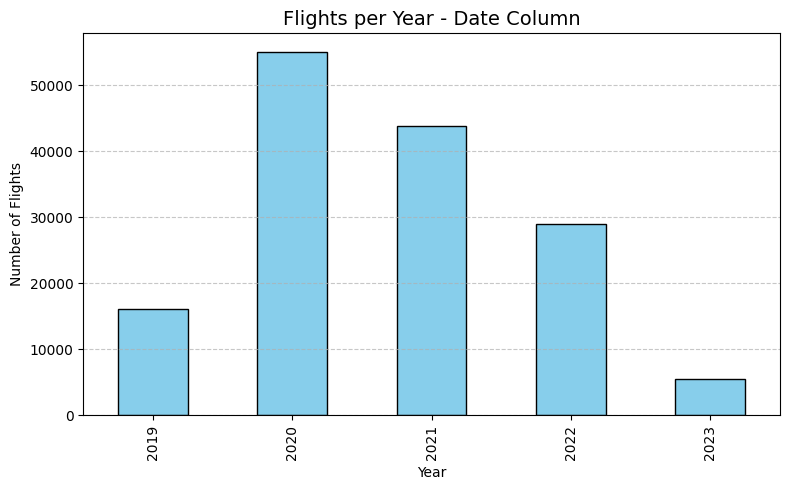

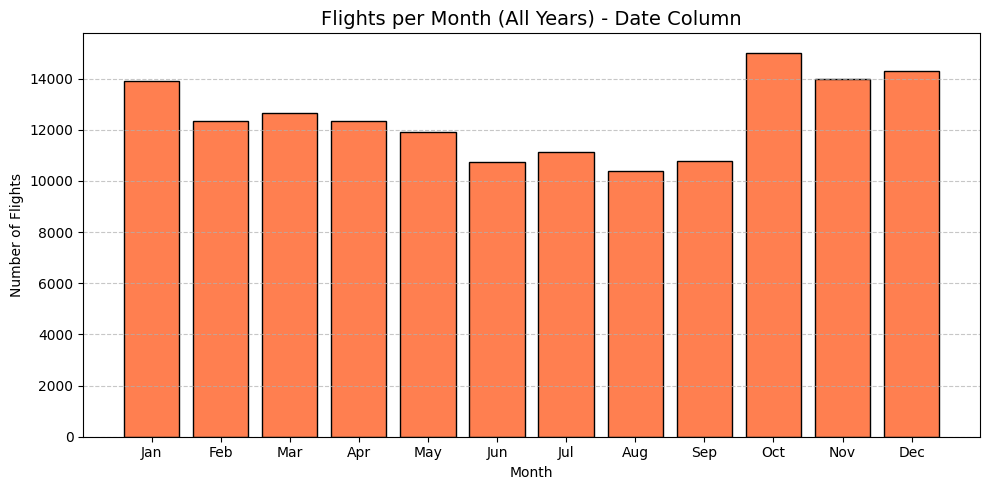

In [ ]:
# bar plots
plot_flights_per_year(flights["date"])
plot_flights_per_month(flights["date"])

In [24]:
# Min date: 2019-09-26
# Max date: 2023-07-24
print(count_rows_between_dates(flights, "date", "2019-09-26", "2023-07-24"))
# view split for training set keeping in mind the seasonality of the data
print(count_rows_between_dates(flights, "date", "2019-09-26", "2021-05-22"))
# view split for validation set
print(count_rows_between_dates(flights, "date", "2021-05-22", "2021-12-05"))
# view split for test set
print(count_rows_between_dates(flights, "date", "2021-12-05", "2022-08-10"))
# view split for production simulation
print(count_rows_between_dates(flights, "date", "2022-08-10", "2023-07-24"))


Rows between 2019-09-26 and 2023-07-24: 149484 (100.00% of total)
149484
Rows between 2019-09-26 and 2021-05-22: 89935 (60.16% of total)
89935
Rows between 2021-05-22 and 2021-12-05: 22568 (15.10% of total)
22568
Rows between 2021-12-05 and 2022-08-10: 22556 (15.09% of total)
22556
Rows between 2022-08-10 and 2023-07-24: 14675 (9.82% of total)
14675




### ✈️ Flights Data Split Strategy

| Split                  | Date Range                | Rows   | % of Total |
|------------------------|--------------------------|--------|------------|
| **Train**              | 2019-09-26 to 2021-05-22 | 89,935 | 60.16%     |
| **Validation**         | 2021-05-22 to 2021-12-05 | 22,568 | 15.10%     |
| **Test**               | 2021-12-05 to 2022-08-10 | 22,556 | 15.09%     |
| **Holdout(Production Simulation)** 🚦  | 2022-08-10 to 2023-07-24 | 14,675 | 9.82%      |
| **Total**              | 2019-09-26 to 2023-07-24 | 149,484| 100.00%    |

### 📝 Initial Split Insights

*   **Chronological splits** are fundamental to prevent data leakage and accurately reflect real-world model deployment scenarios where predictions are made on future, unseen data.
*   **Seasonality is preserved**: Each split is designed to cover multiple months, aiming to capture various holiday and travel patterns.
*   **Balanced validation and test sets** (approx. 15% each) ensure reliable model tuning and an unbiased final evaluation.
*   **Production simulation** (🚦) utilizes the most recent data, offering a realistic preview of model performance during retraining cycles and aiding in drift monitoring.

### 💡 Why This Chronological Split is Crucial (Evidence-Based Justification)

A date-based (chronological) split is not just a best practice; it's essential for this dataset due to observable temporal patterns:

*   **Mimics Real-World Deployment 🌎:** The core principle is to train the model on past data and evaluate its ability to predict future outcomes. This directly mirrors how the model would be used in a production environment.
*   **Captures Evolving Trends & Seasonality 📈:**
    *   The **"Flights per Month" bar chart** clearly shows significant seasonality in flight volume. For instance, October, December, and January exhibit peak flight numbers, while months like June, July, August, and September show relative dips. A random split could create imbalanced representations of these crucial periods across train, validation, and test sets, leading to a model that performs poorly on unseen seasonal data.
    *   The **average price table (month/year)** reveals that prices are not static. There are noticeable **year-over-year price trends** (e.g., prices in 2022 and 2023 are often higher than in 2020/2021 for the same month) and **distinct monthly price fluctuations within each year** (e.g., July 2023 shows a significantly higher average price). A chronological split ensures the model learns these temporal price dynamics and how seasonality might interact with longer-term price evolution.
*   **Prevents Lookahead Bias (Data Leakage) 🕵️:** Randomly shuffling data that has a temporal component would allow the model to inadvertently learn from future information during training, leading to overly optimistic performance metrics that don't hold up in real-world scenarios.
*   **Ensures Robust Model Evaluation & Lifecycle Management 🔄:** By testing on a distinct future period, we get a more reliable estimate of the model's generalization capabilities. The "Production Sim" split further allows for testing how the model adapts to the very latest data patterns, which is vital for ongoing monitoring and retraining decisions.

### **Missing Values**


In [25]:
# prints missing values in each column and %age
check_missing(flights)

,Missing Values,Percentage
from,0,0.0
to,0,0.0
flightType,0,0.0
price,0,0.0
time,0,0.0
distance,0,0.0
agency,0,0.0
date,0,0.0
month,0,0.0
year,0,0.0


#### 🕵️‍♂️ **Missing Value Assessment**

-   ✅ **No Missing Data Found:** A thorough check for missing values across all columns and rows confirmed that the current dataset is complete. There are **no missing values** in any cell.

-   **Implication for Current Analysis:** This is a positive finding for the initial EDA and model prototyping phases, as it simplifies preprocessing by eliminating the need for immediate imputation strategies for the existing data.

-   **Consideration for Production Pipelines:** While the current dataset is clean, it's crucial to design production MLOps pipelines to be robust against potential missing data in future incoming flight records. Therefore, strategies for handling missing values (e.g., imputation or flagging) should still be incorporated into the production data preprocessing steps.

###

## **Analysis on Training Set**

### **Spitting Data into Training, Valdiation, Testing and Holdout(For Production Simulation) Sets**


| Split                  | Date Range                | Rows   | % of Total |
|------------------------|--------------------------|--------|------------|
| **Train**              | 2019-09-26 to 2021-05-22 | 89,935 | 60.16%     |
| **Validation**         | 2021-05-23 to 2021-12-05 | 22,568 | 15.10%     |
| **Test**               | 2021-12-06 to 2022-08-10 | 22,556 | 15.09%     |
| **Production Sim** 🚦  | 2022-08-11 to 2023-07-24 | 14,675 | 9.82%      |
| **Total**              | 2019-09-26 to 2023-07-24 | 149,484| 100.00%    |



In [26]:
all_sets_dict = chronological_split(
    flights,
    "date",  # date column
    "price",  # target variable
    "2021-05-22",  # train_end
    "2021-12-05",  # val_end
    "2022-08-10",  # test_end
)

# Now unpack each tuple from the dictionary
train_x, train_y = all_sets_dict["train"]
validation_x, validation_y = all_sets_dict["validation"]
test_x, test_y = all_sets_dict["test"]

# For the 'holdout' set:
holdout_x, holdout_y = all_sets_dict["holdout"]


In [ ]:
# Add price column back and make a new df called flights_train
flights_train = train_x.copy()
flights_train["price"] = train_y
flights_train.sample(5)

,from,to,flightType,time,distance,agency,date,month,year,day,day_name,price
68525,Recife (PE),Natal (RN),premium,0.58,222.669998,CloudFy,2020-12-12,12,2020,12,Saturday,474.600006
24014,Rio de Janeiro (RJ),Campo Grande (MS),firstClass,2.09,806.479980,Rainbow,2020-02-17,2,2020,17,Monday,1518.880005
37604,Rio de Janeiro (RJ),Florianopolis (SC),premium,1.21,466.299988,Rainbow,2020-05-15,5,2020,15,Friday,672.659973
67961,Aracaju (SE),Campo Grande (MS),premium,1.69,650.099976,Rainbow,2020-12-07,12,2020,7,Monday,1116.829956
39269,Campo Grande (MS),Aracaju (SE),premium,1.69,650.099976,CloudFy,2020-05-25,5,2020,25,Monday,1215.449951


### 📑 **Extensive Automated EDA for Training Set**
- This will generate a extensive EDA report fot the training set.

In [31]:
# generate_eda_report(
#     flights_train,
#     "Flights Training set EDA Report",
#     "../reports/eda/flights_training_eda_report.html",
#     minimal=False,
#     explorative=True,
# )

#### **Insights from the Report**

- **Distance** shows a strong positive correlation with both **price** and **flight time**.
- **Month** and **year** are highly correlated, reflecting the chronological structure of the data.
- **Price** is strongly correlated with both **distance** and **flight time**, indicating that longer and longer-duration flights tend to be more expensive.
- **Flight time** is also highly correlated with both **distance** and **price**, suggesting that longer flights cover greater distances and cost more.
- **Year** and **month** exhibit a strong correlation, as expected in time series data.

> Detailed report can be found in reports/eda folder which can be viewed as html file in browser.

### **5 Number Summary**

In [29]:
flights_train.describe(include="number")

,time,distance,month,day,price
count,89935.000000,89935.000000,89935.000000,89935.000000,89935.000000
mean,1.350871,519.917725,6.426597,15.760327,944.785095
std,0.548463,211.149643,3.745957,8.800451,357.462952
min,0.440000,168.220001,1.000000,1.000000,301.510010
25%,0.850000,327.549988,3.000000,8.000000,667.000000
50%,1.440000,555.739990,6.000000,16.000000,889.070007
75%,1.760000,676.530029,10.000000,23.000000,1209.040039
max,2.440000,937.770020,12.000000,31.000000,1754.170044


In [30]:
flights_train.describe(include="category")

,from,to,flightType,agency,year,day_name
count,89935,89935,89935,89935,89935,89935
unique,9,9,3,3,3,5
top,Campo Grande (MS),Florianopolis (SC),firstClass,Rainbow,2020,Thursday
freq,11020,18337,38498,38557,55095,29104


In [34]:
flights_train.describe(include="datetime")

,date
count,89935
mean,2020-07-09 01:49:17.696113920
min,2019-09-26 00:00:00
25%,2020-02-08 00:00:00
50%,2020-07-02 00:00:00
75%,2020-12-04 00:00:00
max,2021-05-22 00:00:00


#### ✈️ Five Number Summary Insights

- **Flight Time ⏱️:**  
  - Ranges from **0.44** to **2.44 hours**, with an average of **1.35 hours**.  
  - The median is **1.44 hours**, and most flights are between **0.85** and **1.76 hours**, indicating a focus on short to medium-haul routes.

- **Distance 📏:**  
  - Flights cover **168 km** to **938 km**, with an average of **520 km**.  
  - The median distance is **556 km**, and most flights fall between **328 km** and **677 km**, showing a concentration on regional travel.

- **Month & Day 📅:**  
  - Flights are distributed across all months (**1–12**) and days (**1–31**), with the median flight in **June** on the **16th** day.  
  - The average month is about **June (6.4)**, and the average day is the **16th**, suggesting relatively even distribution throughout the year and month.

- **Price 💸:**  
  - Prices range from **301.51** to **1,754.17**, with an average of **944.79**.  
  - The median price is **889.07**, and most flights are priced between **667.00** and **1,209.04**.  
  - The right-skewed distribution indicates a few high-priced flights.

- **Categorical Features 🏷️:**  
  - **9 unique origins and destinations**, with **Campo Grande (MS)** as the most common origin and **Florianopolis (SC)** as the top destination.
  - **FirstClass** is the most frequent flight type, and **Rainbow** is the leading agency.
  - The year **2020** dominates the data, with **55,095** flights.

- **Date Range 📆:**  
  - Data spans from **2019-09-26** to **2021-05-22**.  
  - The median flight date is **2020-07-02**, and the average date falls in **mid-2020**, indicating a concentration of flights during this period.

---

**Overall:**  
The dataset primarily features short to medium-haul flights, with a strong presence of first-class tickets and a concentration of flights in 2020. Prices and distances show moderate variability, and the data is well-distributed across months and days, supporting robust time-based analysis.

### **Skew in Each Numerical Column**

In [32]:
# list of numerical columns in flights_train
flights_train_num = flights_train.select_dtypes(include=["number"]).columns.tolist()
flights_train_num

['time', 'distance', 'month', 'day', 'price']

In [34]:
# calculates the skew for each column
skewness(flights_train[flights_train_num])

,Column,Skew
0,time,-0.055489
1,distance,-0.059037
2,month,0.065595
3,day,0.007979
4,price,0.353881




#### **Skewness in Numerical Features**

Skewness measures the asymmetry of a feature's distribution. Understanding this is crucial as it can guide feature transformation choices and influence model performance. The following skewness values were observed for the numerical columns:

*   **`price` (Target Variable) 💰**:
    *   **Skewness Value**: **+0.353881**
    *   **Interpretation**: Exhibits a **mild positive (right) skew**. This indicates that while many flight prices are concentrated at the lower end of the distribution, there's a tail extending towards higher prices. This suggests more flights are relatively inexpensive, with fewer, but notably more expensive, options.

*   **`time` (Flight Duration) ⏱️**:
    *   **Skewness Value**: **-0.055489**
    *   **Interpretation**: The distribution of flight duration is **very close to symmetrical**. The skewness value is slightly negative but very near zero, implying that flight times are quite evenly distributed around the average, without a significant bias towards shorter or longer durations.

*   **`distance` (Flight Distance) 🗺️**:
    *   **Skewness Value**: **-0.059037**
    *   **Interpretation**: Similar to flight time, the distribution of flight distance is **very close to symmetrical**. The slightly negative skewness value is minimal, indicating a balanced distribution of flight distances around their mean.

*   **`month` (Month of Flight) 🗓️**:
    *   **Skewness Value**: **+0.065595**
    *   **Interpretation**: The distribution of flights across months is **very close to symmetrical**. The small positive skewness value suggests a fairly even spread of flight records throughout the months of the year, without a strong lean towards earlier or later months in the overall dataset distribution (though seasonal peaks exist, skewness here refers to the shape of the count distribution itself).

*   **`day` (Day of Month) 🔢**:
    *   **Skewness Value**: **+0.007979**
    *   **Interpretation**: The distribution of flights by the day of the month is **highly symmetrical**. The skewness value is extremely close to zero, indicating that flight occurrences are very evenly spread across the days of the month.

**Summary of Skewness Insights**:

The target variable, `price`, displays a mild positive skew, a common characteristic for pricing data. The primary predictor candidates, `time` and `distance`, along with the temporal features `month` and `day`, all exhibit distributions that are very close to symmetrical. This general lack of strong skew in most predictors is favorable, as many machine learning algorithms perform optimally with or assume near-symmetrical data distributions. For the `price` variable, its mild skew might still warrant consideration for transformation (e.g., log transformation) depending on the chosen modeling approach to potentially improve model performance and linearity assumptions.

---

### **Univariate Analysis**

#### 📊 **Univariate Analysis of Numerical Features**

#### **Distribution Of Numerical Columns**

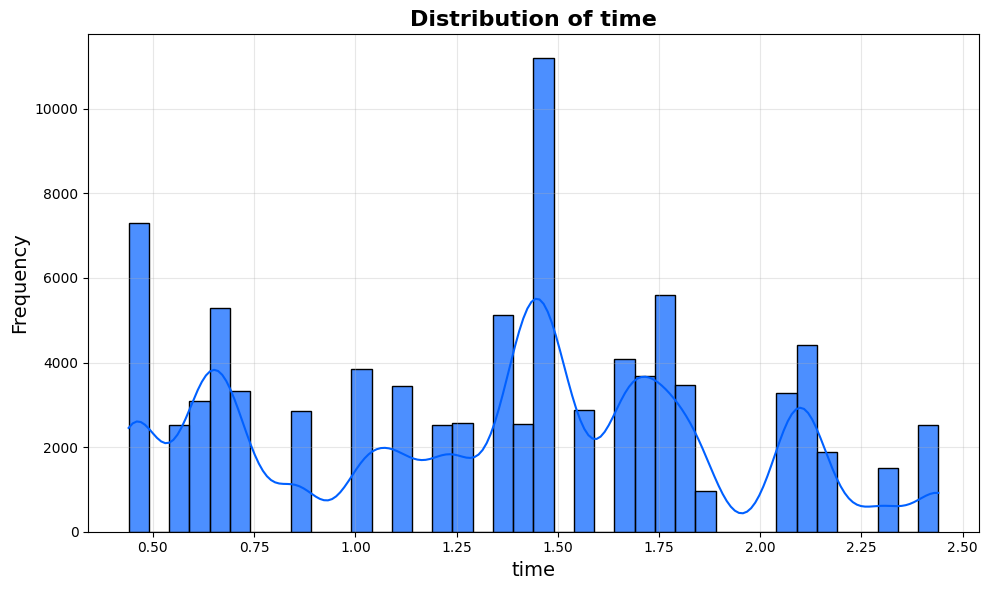

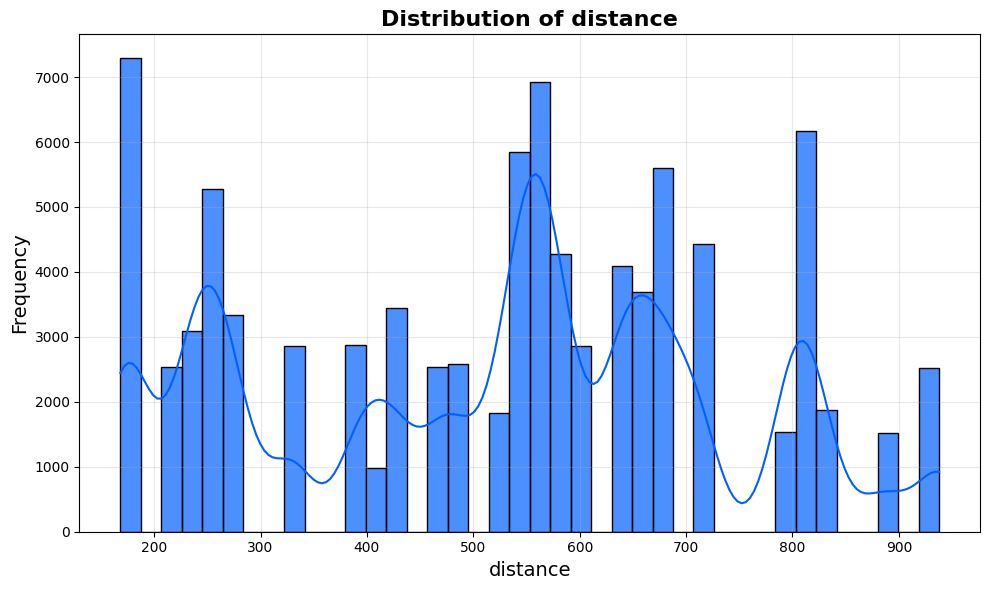

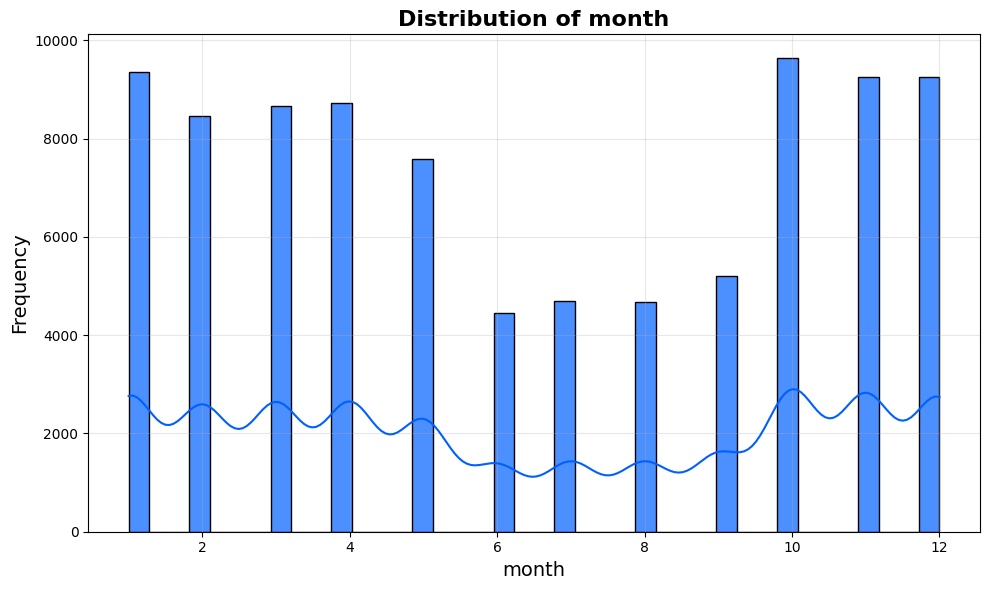

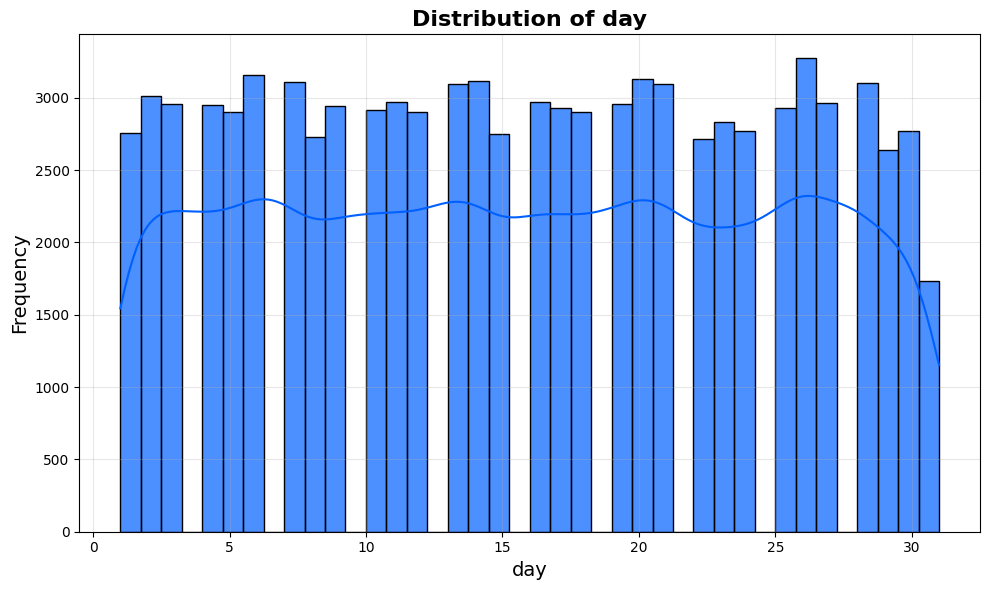

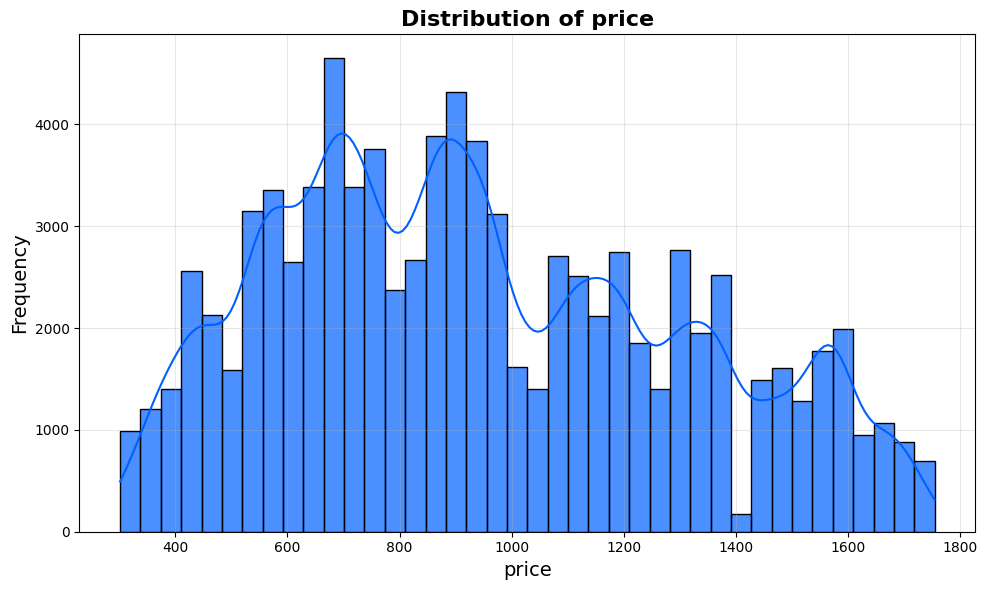

In [ ]:
# plots histograms
histograms(flights_train, flights_train_num)


#### 📊 Distribution Analysis Main Insights

#### 💰 Price
The **price** distribution is **multimodal** and exhibits a slight **right skew**. The presence of several peaks clearly indicates multiple common price ranges. These variations can be attributed to factors such as different **flight classes**, varying **routes**, or periods of **high demand**. Prices are distributed from approximately **300 to 1800**, without extreme outliers.

#### 🗓️ Day
The distribution of flights across **days 1–31** is **nearly uniform**. This uniformity demonstrates **no particular day-of-the-month bias** in the flight data.

#### 📅 Month
Flight frequencies **vary significantly by month**. Months such as January (❄️), February, March, April, October (🍂), November, and December show **higher flight frequencies**. Conversely, June, July (☀️), August, and September have **lower frequencies**. This pattern strongly indicates **seasonality** in flight operations, with more flights occurring in the winter and spring months and fewer during the summer and early fall.

#### ✈️ Distance
The distribution of flight **distances** is **multimodal**, characterized by several distinct peaks. This pattern shows that flights are predominantly **clustered around certain common distances**, which likely correspond to **popular or standard flight routes**.

#### ⏱️ Time
The distribution of flight **durations** is also **multimodal**. A significant peak is observed around **1.5 (presumably hours)**, indicating that flight durations of this length are considerably more common. This reflects typical times for **standard routes**.

### 📝 Summary of Univariate Insights
The data reveals clear and actionable patterns:
*   **Seasonality Trends 📈:** Flight activity varies significantly by month.
*   **Route Clustering 🗺️:** Flight distances and durations show distinct clustering, indicative of popular routes.
*   **Pricing Bands 🏷️:** Multiple distinct price ranges are evident in the data.

No major data quality issues are apparent from this initial univariate examination.

#### **Outlier Detection Using Boxplots**

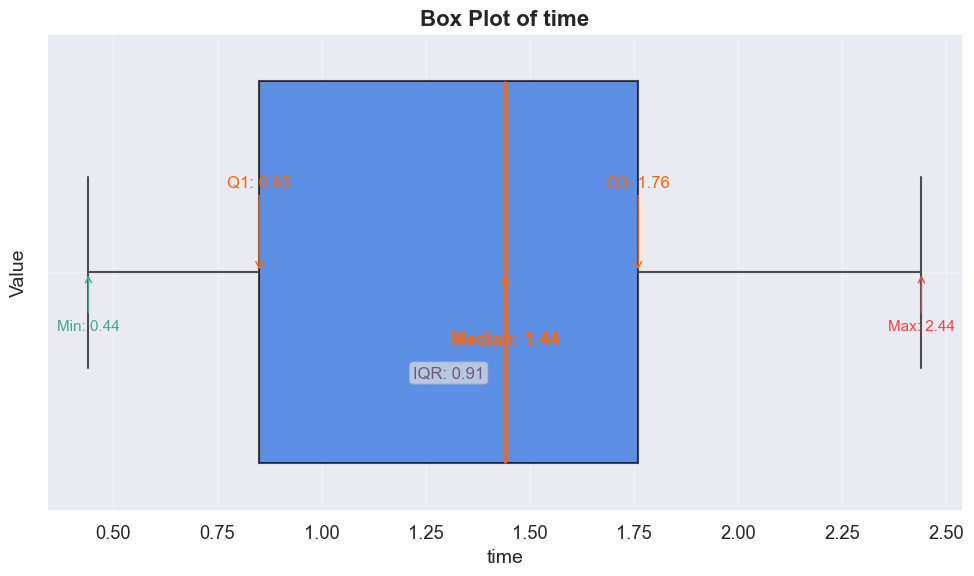

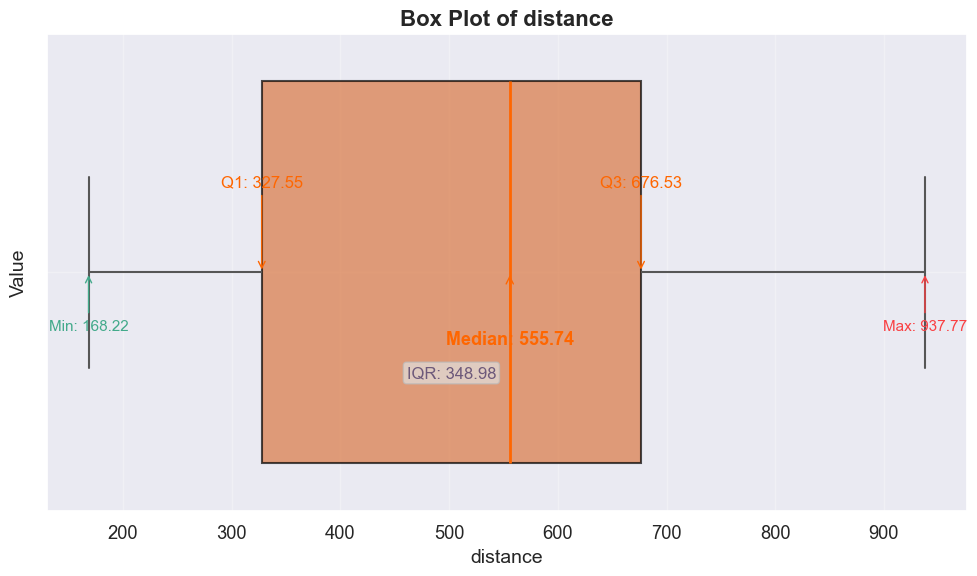

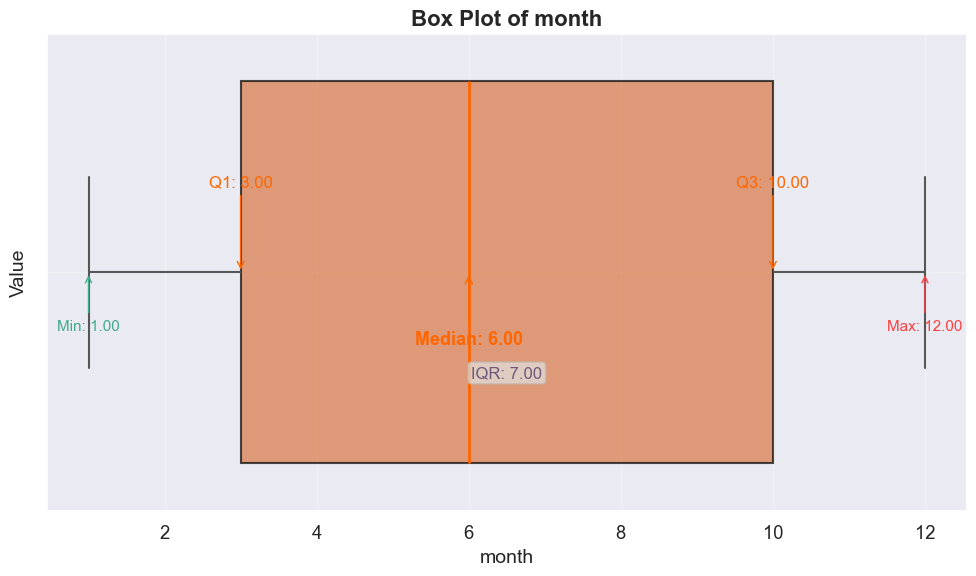

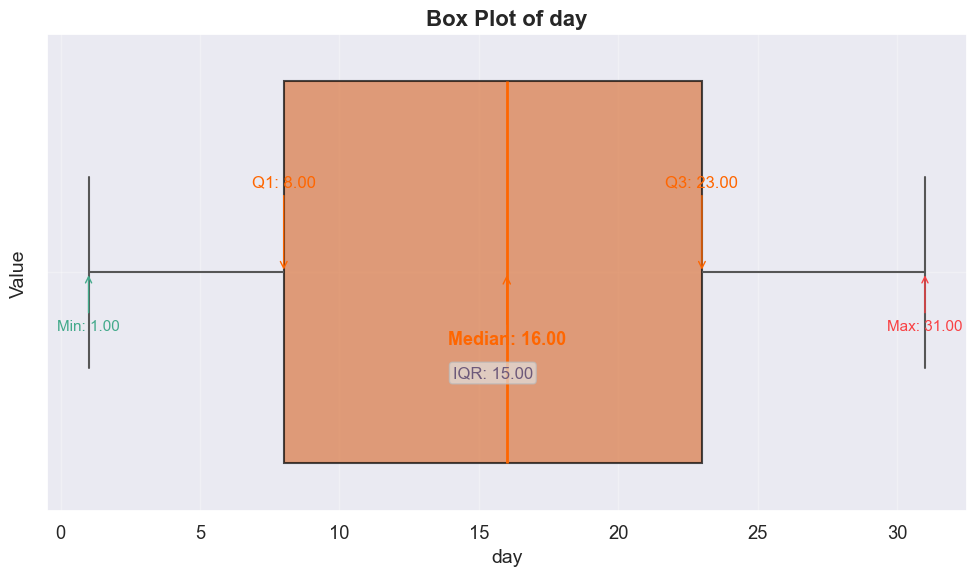

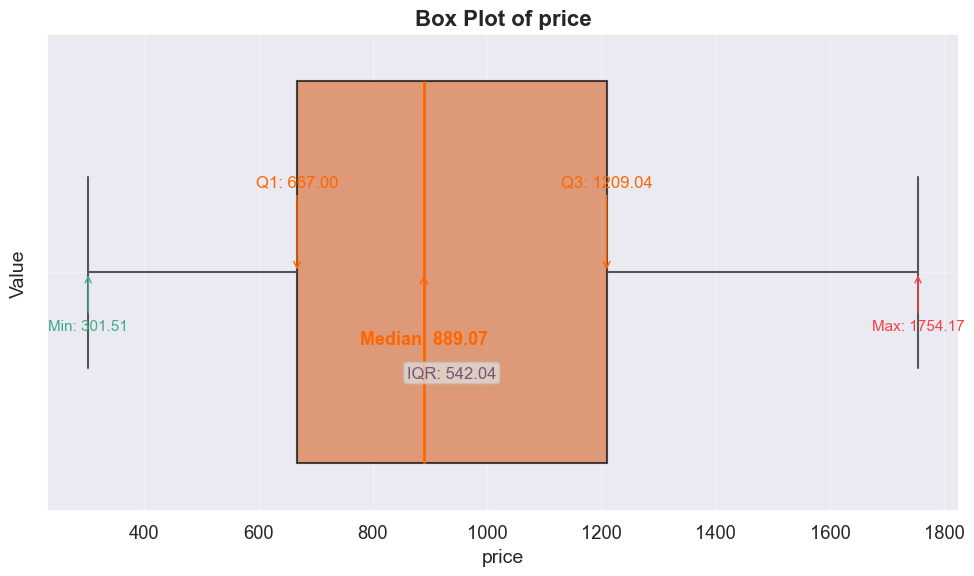

In [38]:
boxplots(flights_train, flights_train_num)


#### 📦 Box Plot Analysis Insights

#### 💰 Price
*   **Median:** ~889
*   **IQR:** 542 (Q1: 667, Q3: 1209)
*   **Range:** 301 (min) to 1754 (max)
**Insight:** The **price distribution is fairly wide**, underscored by a **large interquartile range**. While no extreme outliers are present, this spread signifies **considerable price variability**. This variation likely stems from diverse factors such as different **routes, flight classes, or booking times**.

#### 🗓️ Day
*   **Median:** 16
*   **IQR:** 15 (Q1: 8, Q3: 23)
*   **Range:** 1 to 31
**Insight:** **Days are uniformly distributed**, as expected for calendar days. The absence of outliers indicates a **balanced sampling across the month**.

#### 📅 Month
*   **Median:** 6
*   **IQR:** 7 (Q1: 3, Q3: 10)
*   **Range:** 1 to 12
**Insight:** **Months are also well-distributed**, with no outliers detected. This suggests the dataset comprehensively **covers the full year**.

#### ✈️ Distance
*   **Median:** ~556
*   **IQR:** ~349 (Q1: 328, Q3: 677)
*   **Range:** 168 to 938
**Insight:** Flight **distances vary widely**, although the majority fall between **328 and 677 units** (likely kilometers or miles). No extreme outliers are observed, but the spread indicates a **mix of short and medium-haul flights**.

#### ⏱️ Time
*   **Median:** 1.44
*   **IQR:** 0.91 (Q1: 0.85, Q3: 1.76)
*   **Range:** 0.44 to 2.44
**Insight:** Flight **durations are mostly concentrated between 0.85 and 1.76** (likely hours). The distribution is **relatively tight** with no outliers, suggesting that most flights are of **similar duration**.

### 📊 Overall Box Plot Summary
*   The data demonstrates a **good distribution across time-related features (Day, Month) and categories**.
*   **Price and Distance exhibit the most variability**, highlighting them as potentially significant factors for predictive modeling.
*   The **absence of significant outliers** across these features points towards **good data quality**. ✅
*   The observed spread in **price and distance** may reflect different **flight types or routes**, which could serve as **useful features for prediction tasks**.

#### **Univariate Categorical Analysis**


In [39]:
flights_train_cat = flights_train.select_dtypes(include="category").columns.to_list()
flights_train_cat

['from', 'to', 'flightType', 'agency', 'year', 'day_name']

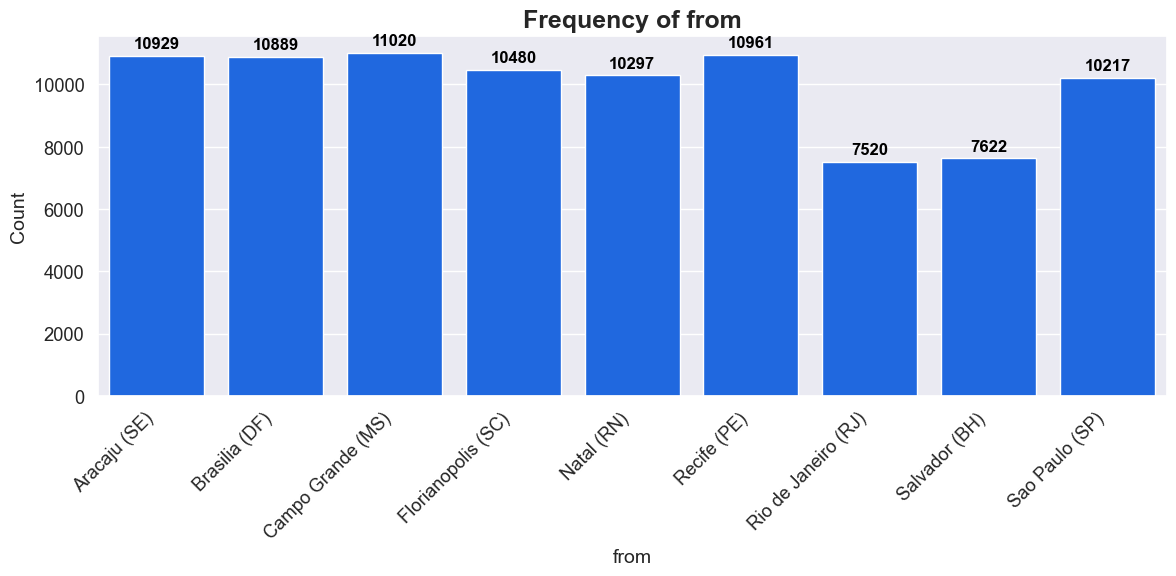

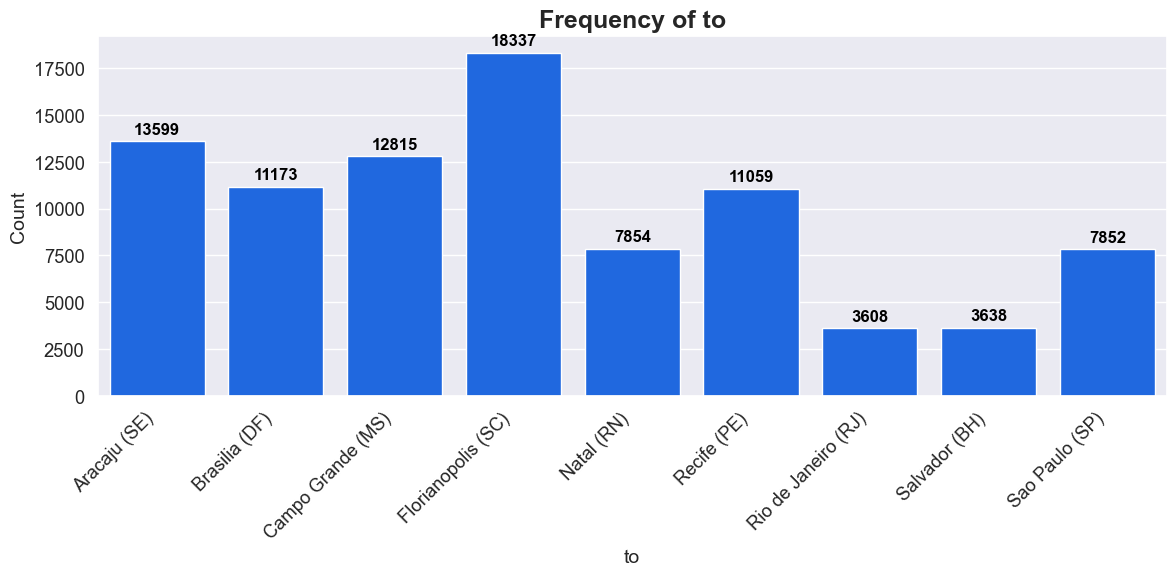

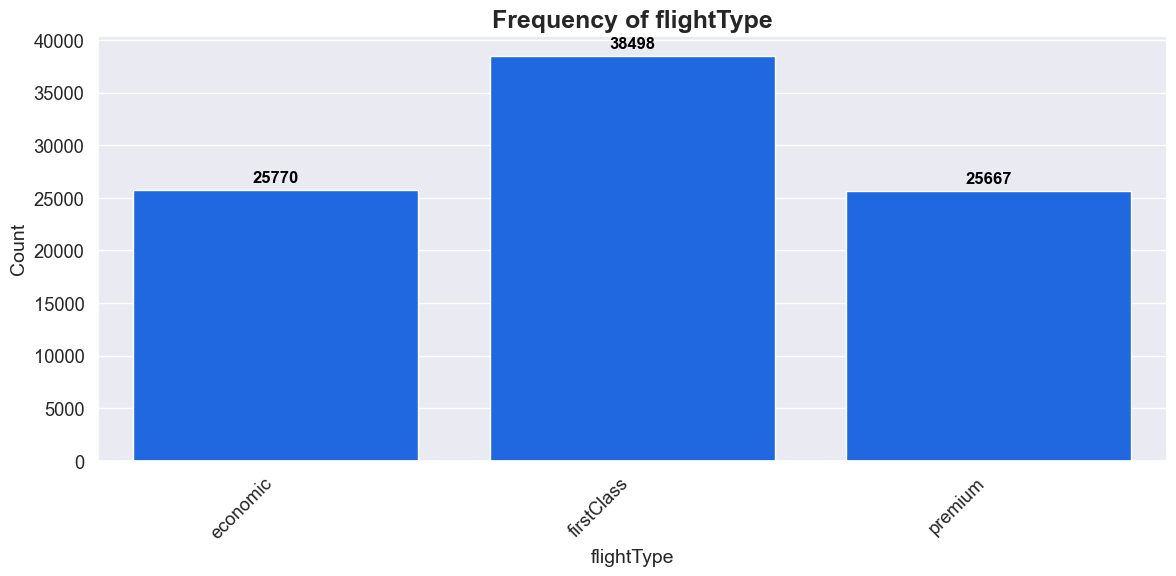

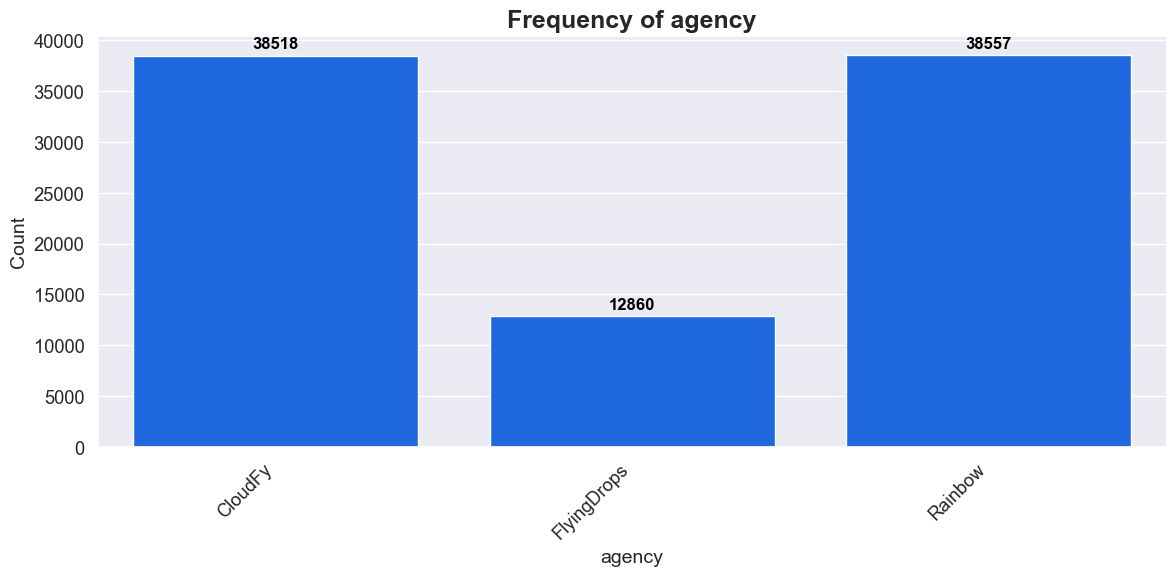

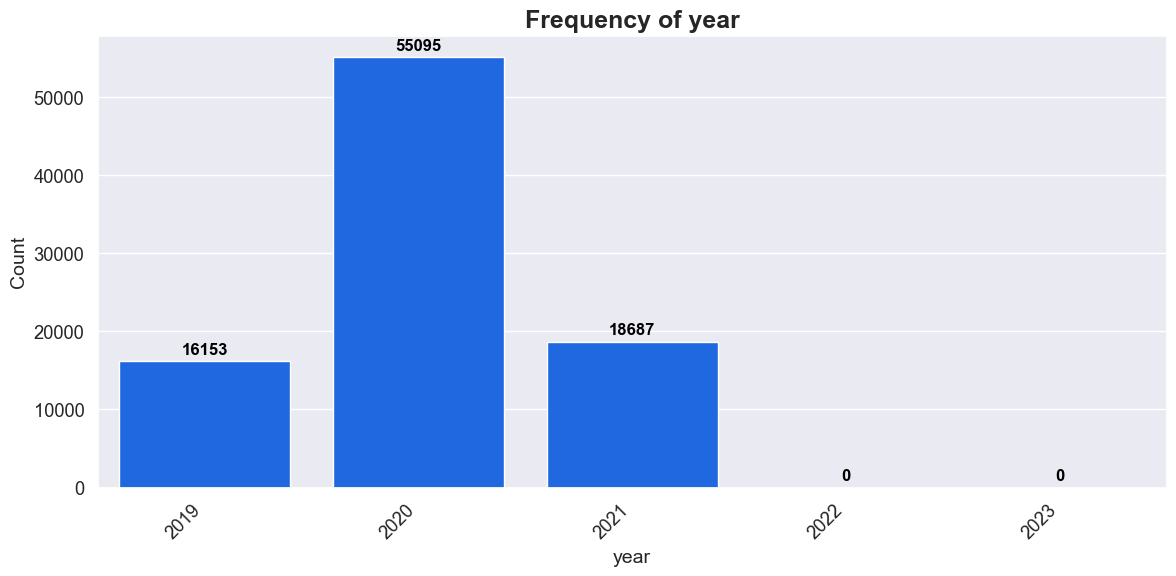

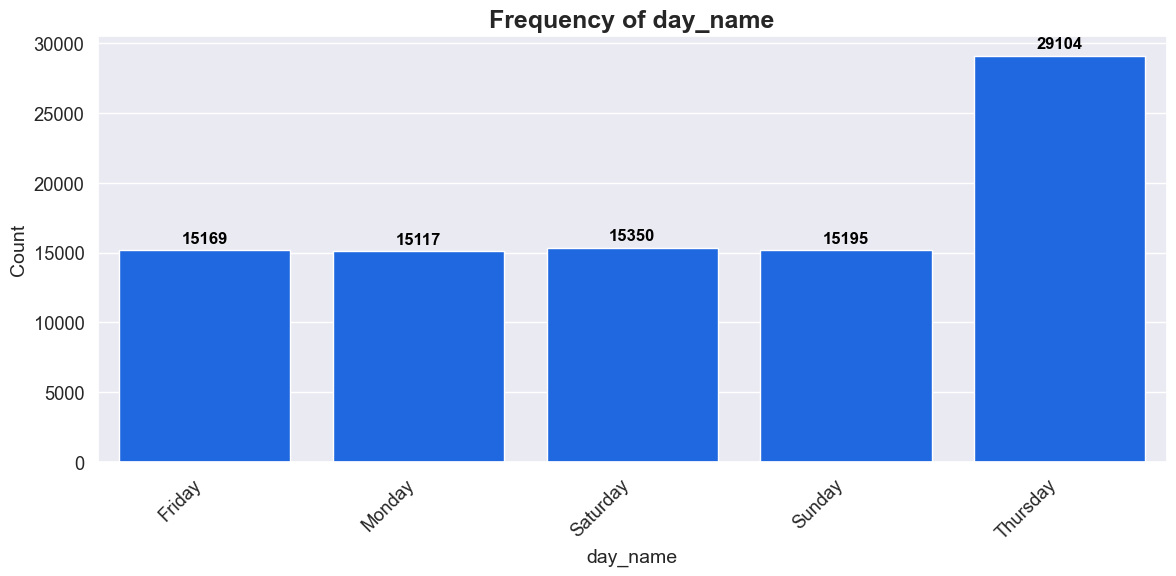

In [40]:
barplot_univariate(flights_train, flights_train_cat)


#### 📊 Categorical Variable Bar Plot Insights

#### 🗓️ `day_name`
*   **Thursday** shows **significantly higher flight counts**, almost double compared to other days.
*   Monday, Friday, Saturday, and Sunday have similar, much lower counts.
**Insight:** A **strong day-of-week effect** is evident, with **Thursday emerging as a peak travel day**. This could be influenced by business travel patterns or specific airline scheduling.

#### 📅 `year`
*   **2020** has the **highest number of flights**, followed by 2021 and 2019.
*   **2022 and 2023 have zero records**.
**Insight:** The dataset is primarily concentrated in the **2019–2021 period**, with a notable **spike in 2020**. This distribution may reflect the data collection's specific timeframe or be indicative of real-world events (e.g., initial phases or disruptions related to COVID-19).

#### 🏢 `agency`
*   **CloudFly** and **Rainbow** show **similar, high flight counts**.
*   **FlyingDrops** has a considerably **lower number of flights**.
**Insight:** The market appears to be **dominated by two main agencies (CloudFly and Rainbow)**, with FlyingDrops playing a more minor role.

#### ✈️ `flightType`
*   **firstClass** is the **most common flight type**.
*   economic and premium classes follow, with nearly equal, lower counts.
**Insight:** There is a **higher proportion of first-class flights** in this dataset. This is somewhat unusual and may reflect the specific focus of the dataset or the primary offerings of the included agencies.

#### 🎯 `to` (Destination)
*   **Florianopolis (SC)** is the **most frequent destination**. 🏖️
*   Aracaju (SE), Campo Grande (MS), and Recife (PE) also have high destination counts.
*   Rio de Janeiro (RJ) and Salvador (BH) have the lowest counts as destinations.
**Insight:** Certain destinations are **significantly more popular** than others. This popularity could be driven by tourism, business activities, or these locations serving as major airline hubs.

#### 🛫 `from` (Origin)
*   Flight **origins are more evenly distributed** compared to destinations.
*   Aracaju (SE), Brasilia (DF), Campo Grande (MS), and Recife (PE) have similar, relatively high origination counts.
*   Rio de Janeiro (RJ) and Salvador (BH) are less frequent as origin points.
**Insight:** Flights originate fairly evenly from most listed cities. However, a comparison with destination data reveals that **some cities are more prominent as destinations than as origins**.

### 📜 Overall Categorical Insights Summary
*   **Strong patterns** are observed in **day-of-week, year, agency, and destination** distributions.
*   **Thursday** (for `day_name`) and the year **2020** (for `year`) stand out as notable peaks within their respective categories.
*   The distributions for **agency** and **flight type** suggest a **non-uniform market structure** and service offering.
*   These categorical features, with their distinct patterns, are **highly likely to be important predictors** in any subsequent modeling tasks. ✨ 

### **Bivariate Analysis**

#### **Pairplot**
- Ploting scatter plots between all numerical columns to see the relation ship.

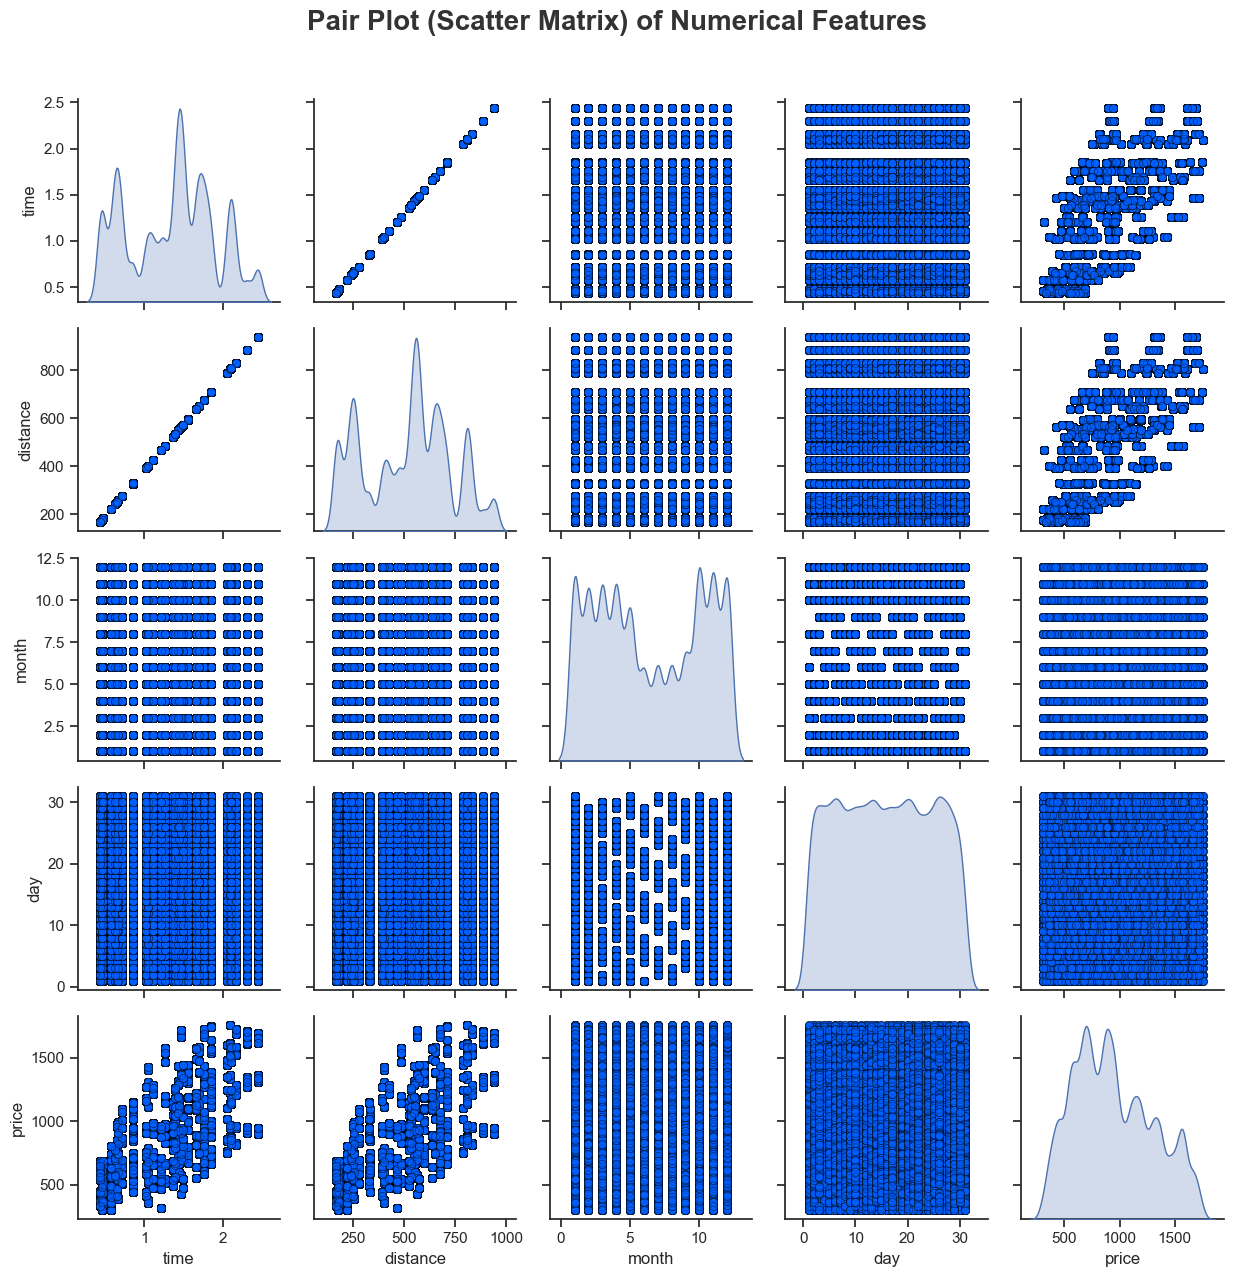

In [41]:
pairplots(flights_train[flights_train_num])

### **Correlation Analysis using Corr Matrix And Heatmap**

In [42]:
corr = flights_train[flights_train_num].corr()
corr

,time,distance,month,day,price
time,1.000000,0.999991,0.000075,-0.002326,0.653463
distance,0.999991,1.000000,0.000079,-0.002339,0.653665
month,0.000075,0.000079,1.000000,0.032190,0.000804
day,-0.002326,-0.002339,0.032190,1.000000,0.000453
price,0.653463,0.653665,0.000804,0.000453,1.000000


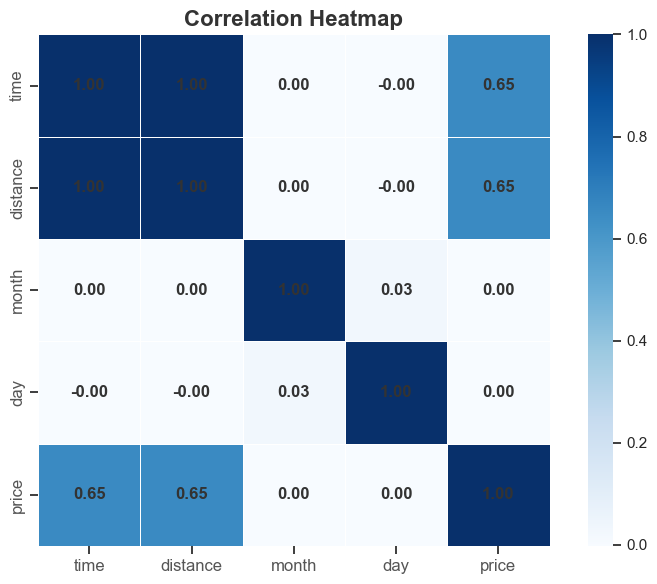

In [43]:
correlation_heatmap(flights_train, flights_train_num)



#### 🔗 Correlation Analysis Insights

#### ✈️⏱️ Strong Correlation: `time` and `distance`
*   **Correlation Coefficient ≈ 1.0 (specifically 0.99999)**
**Insight:** Flight **`time` and `distance` are almost perfectly correlated** in this dataset. This indicates an essentially **linear relationship**, meaning as distance increases, flight time increases proportionally. This is expected, as longer flights naturally cover more ground, assuming relatively consistent cruising speeds.

#### 💰 Moderate Correlation with `price`
*   **`price` vs `time`: 0.65**
*   **`price` vs `distance`: 0.65**
**Insight:** Both flight **`time` and `distance` show a moderate positive correlation with `price`**. This suggests that **longer and farther flights generally tend to be more expensive**. However, the correlation isn't perfect, implying that other factors (such as flight class, agency, demand, or booking time) also significantly influence the final price.

#### 🗓️ Very Weak or No Correlation with `month` and `day`
*   All correlations involving **`month` and `day`** with `price`, `distance`, or `time` are **near zero**.
**Insight:** The **`month` and `day` of the flight do not exhibit a linear relationship** with `price`, `distance`, or `time`. Any influence these temporal features have on pricing or flight characteristics is likely **non-linear or categorical** (e.g., specific effects of holidays, weekends, or seasonal demand peaks not captured by a simple linear trend).

#### 📊 Pairplot Visuals
*   **Scatter Plots:**
    *   The plot of **`time` vs `distance` displays a tight, clear linear pattern**, reinforcing their strong correlation.
    *   Plots for **`price` vs `time` and `price` vs `distance` show discernible positive trends**, but with a **greater degree of spread (variance)**, aligning with the moderate correlation values.
    *   Other variable pairs generally show **no clear linear patterns**.
*   **Distributions:**
    *   The individual distribution plots for each variable along the diagonal of the pairplot **match the shapes observed in the earlier histogram analysis**.

### 📝 Summary of Correlation Insights
*   **Key Numerical Drivers 🔑:** **`Distance` and `time`** are identified as the primary numerical features linearly influencing `price`.
*   **Multicollinearity Alert ⚠️:** `time` and `distance` are highly redundant due to their near-perfect correlation. For modeling purposes, **it's likely that only one of these features will be necessary** to avoid multicollinearity.
*   **Handling Other Features:** `Month` and `day` will likely need to be treated as **categorical features** or used to create **interaction terms** with other features to effectively capture their impact on the target variable.

These insights are crucial for guiding **feature selection and feature engineering** efforts in the development of predictive models.

### **Boxplots For Numerical Insights From Categorical Columns**

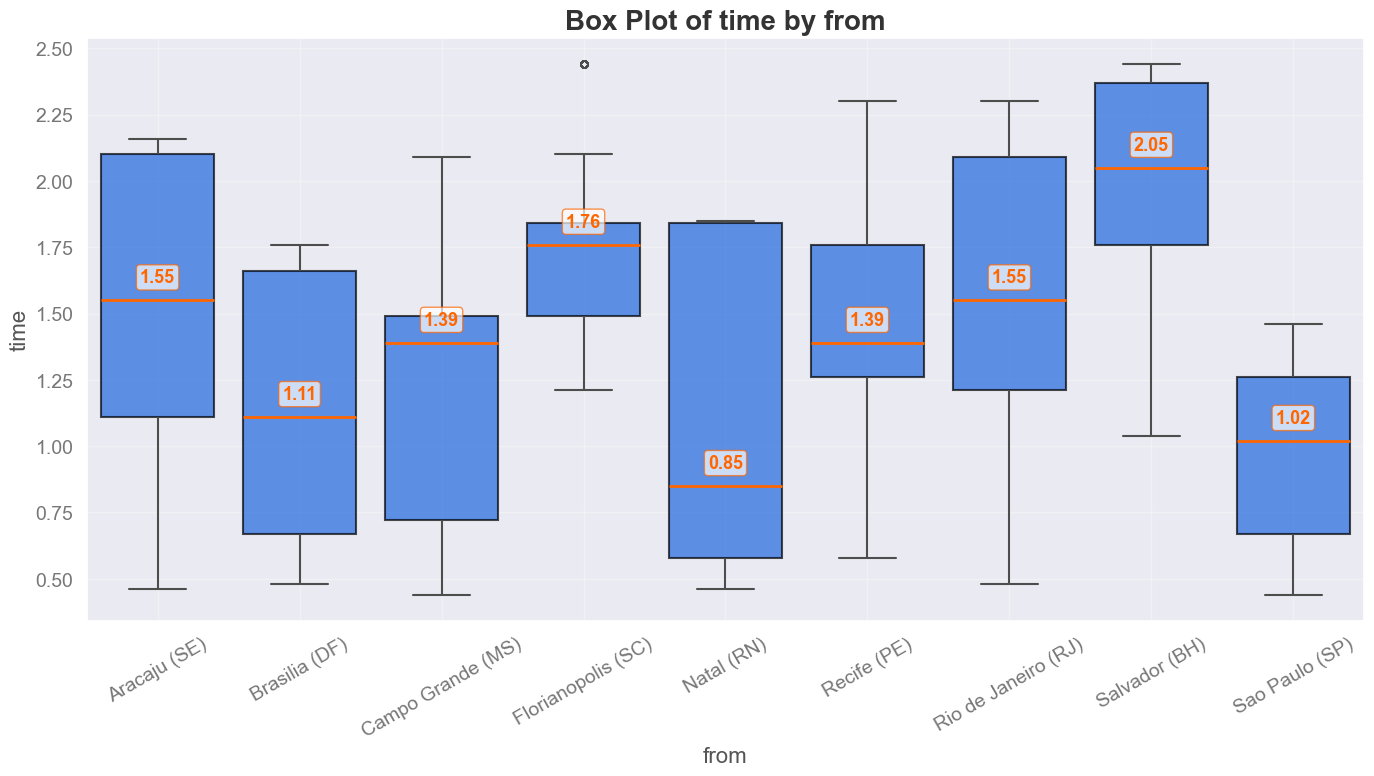

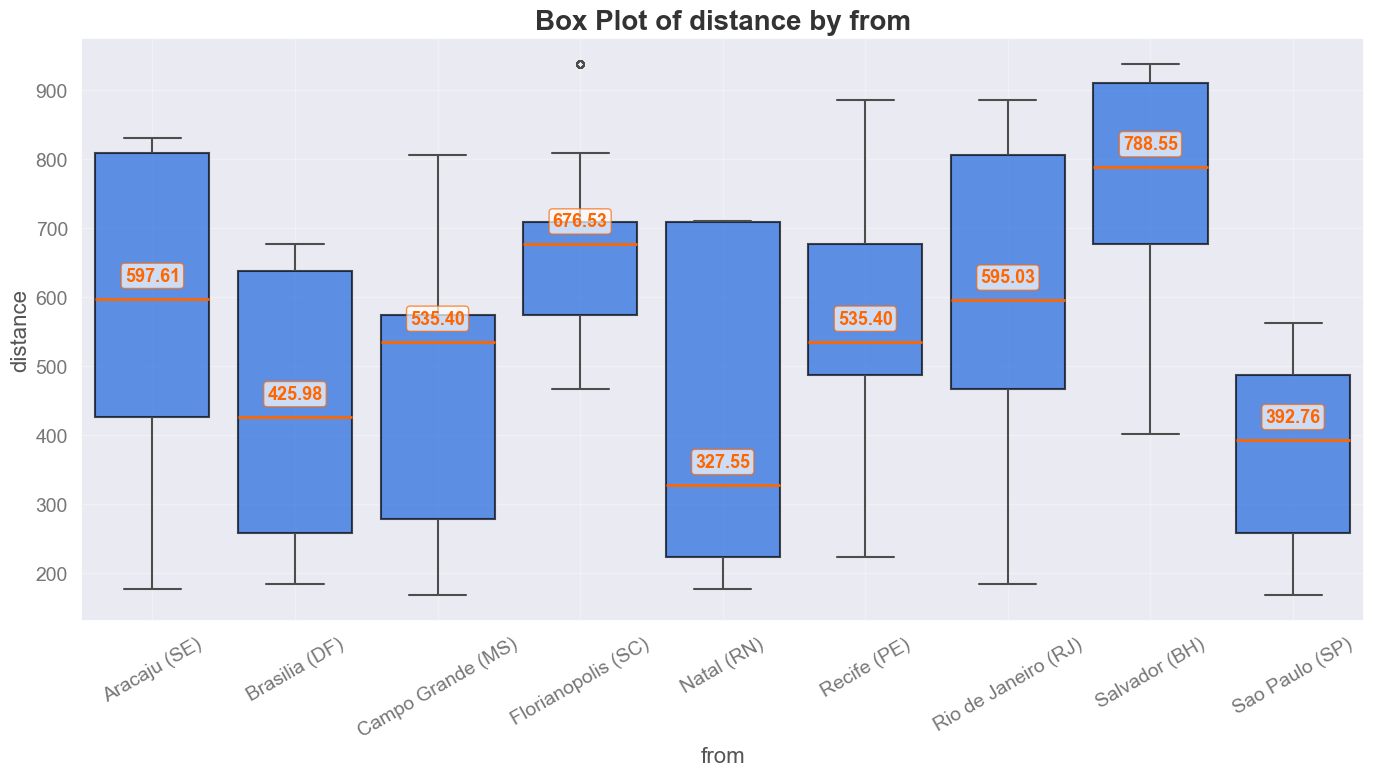

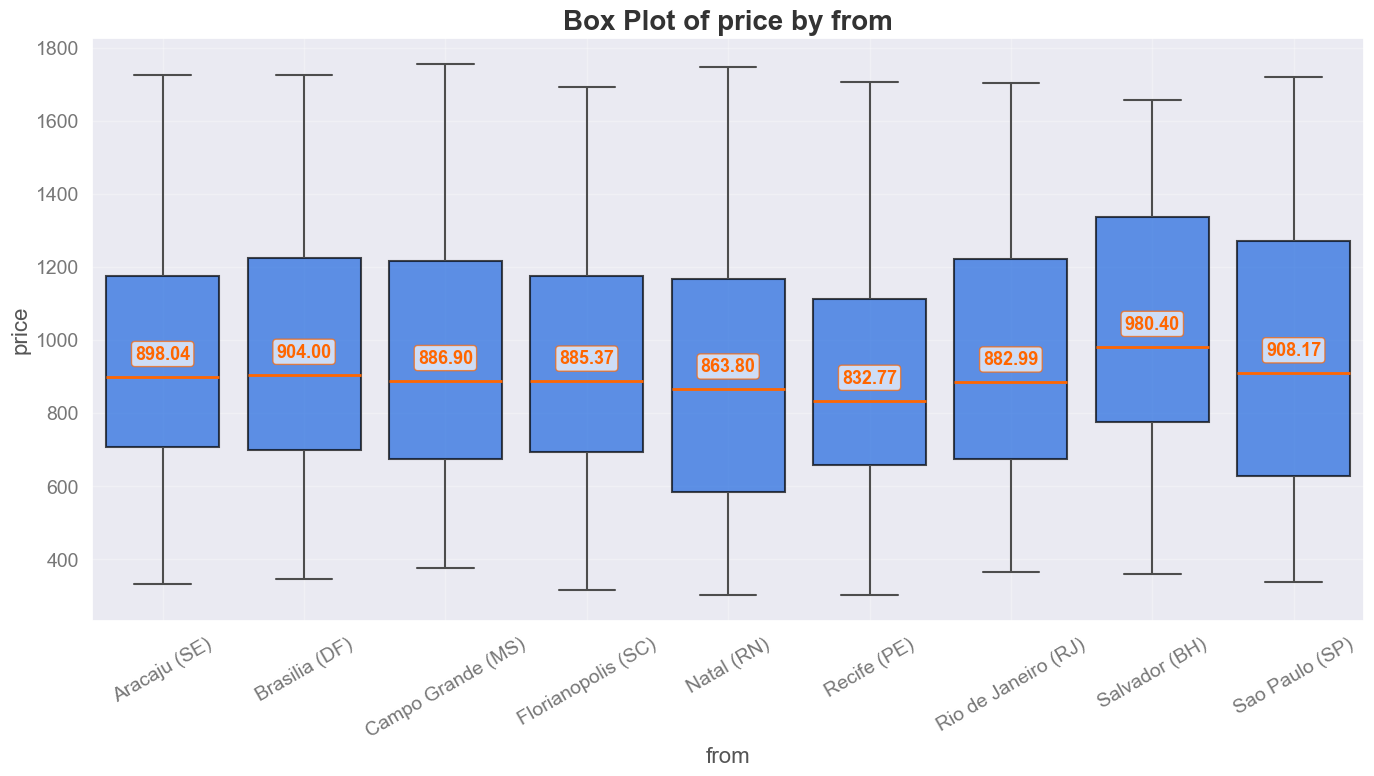

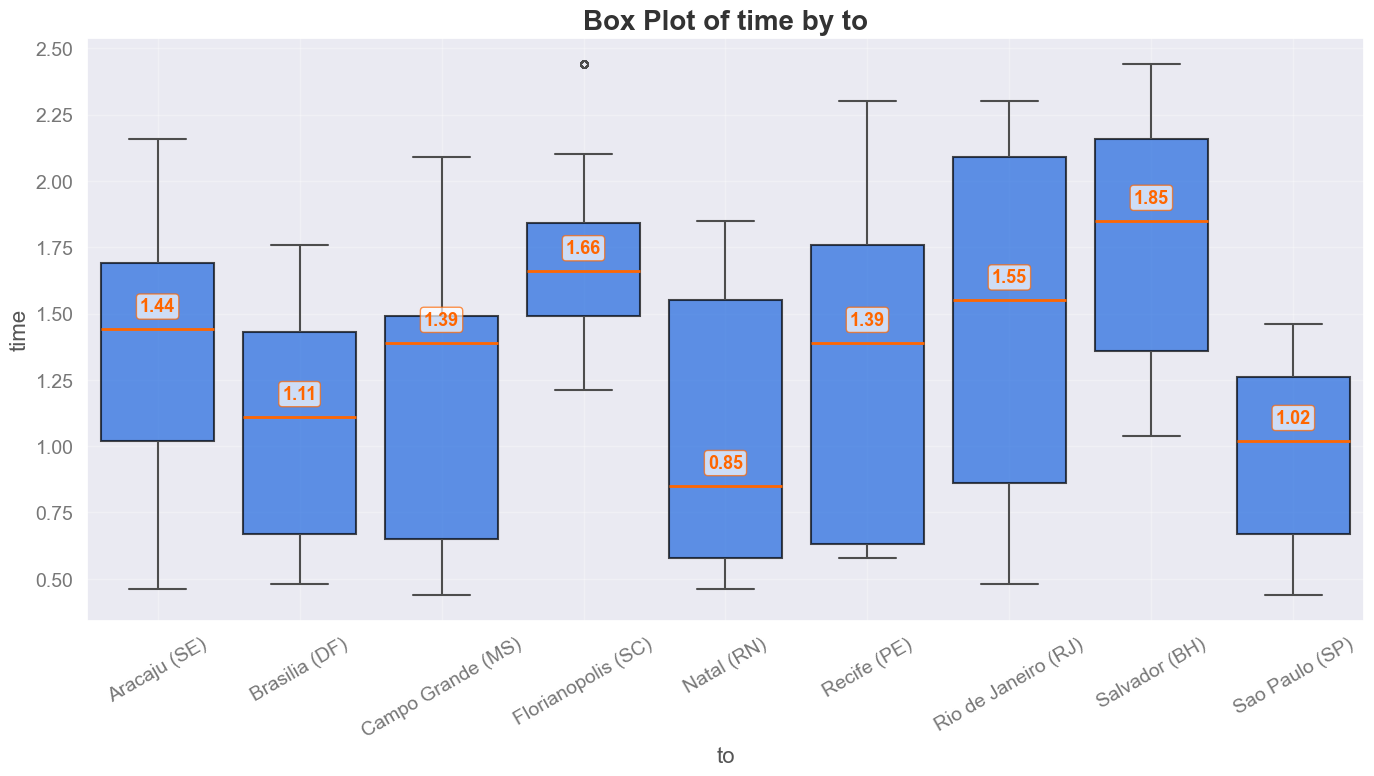

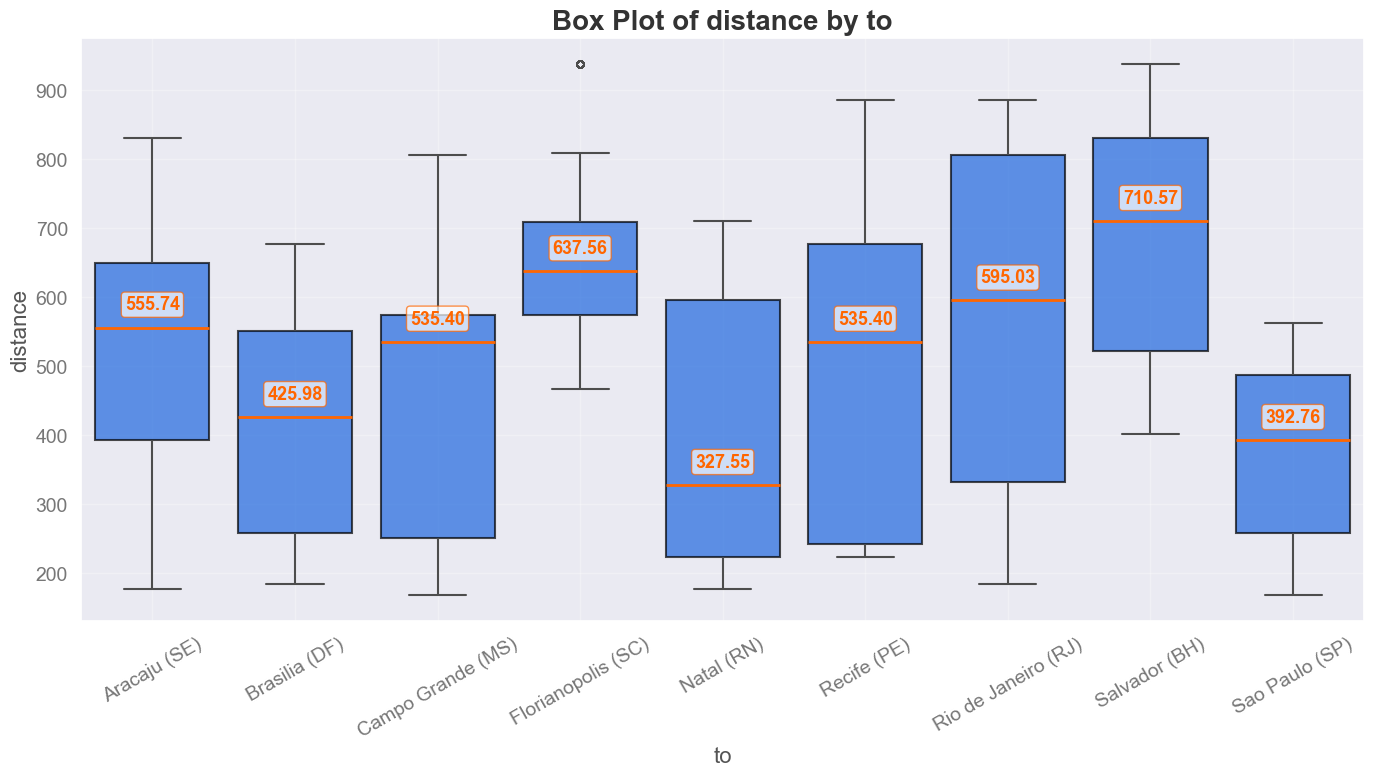

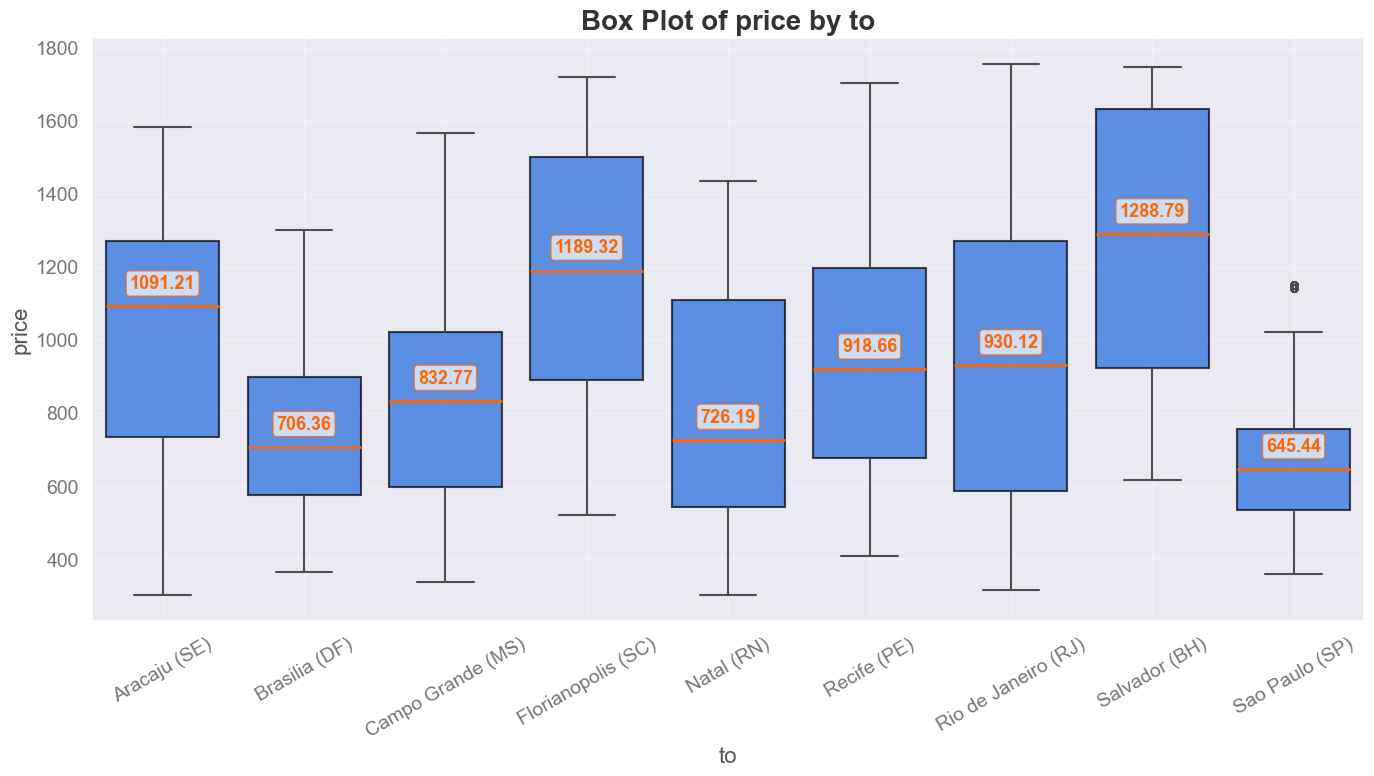

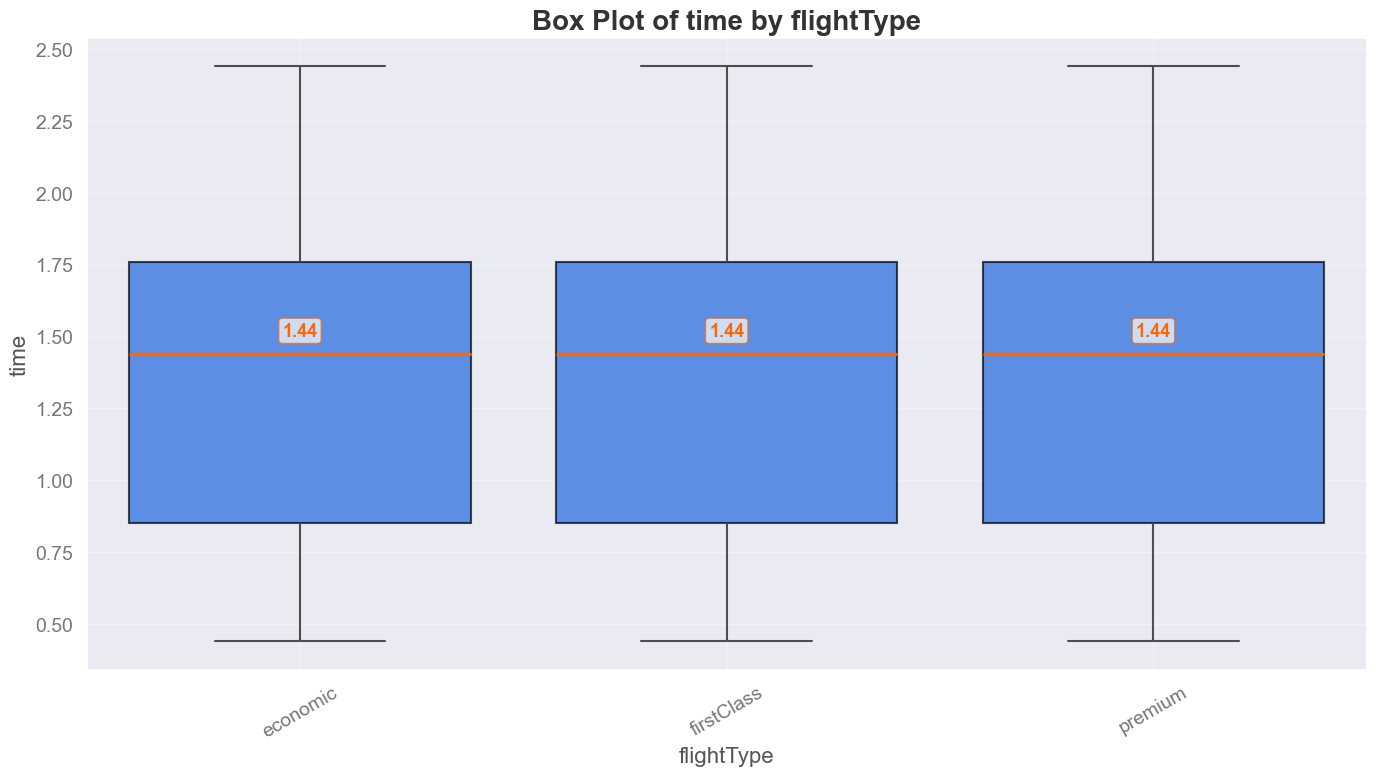

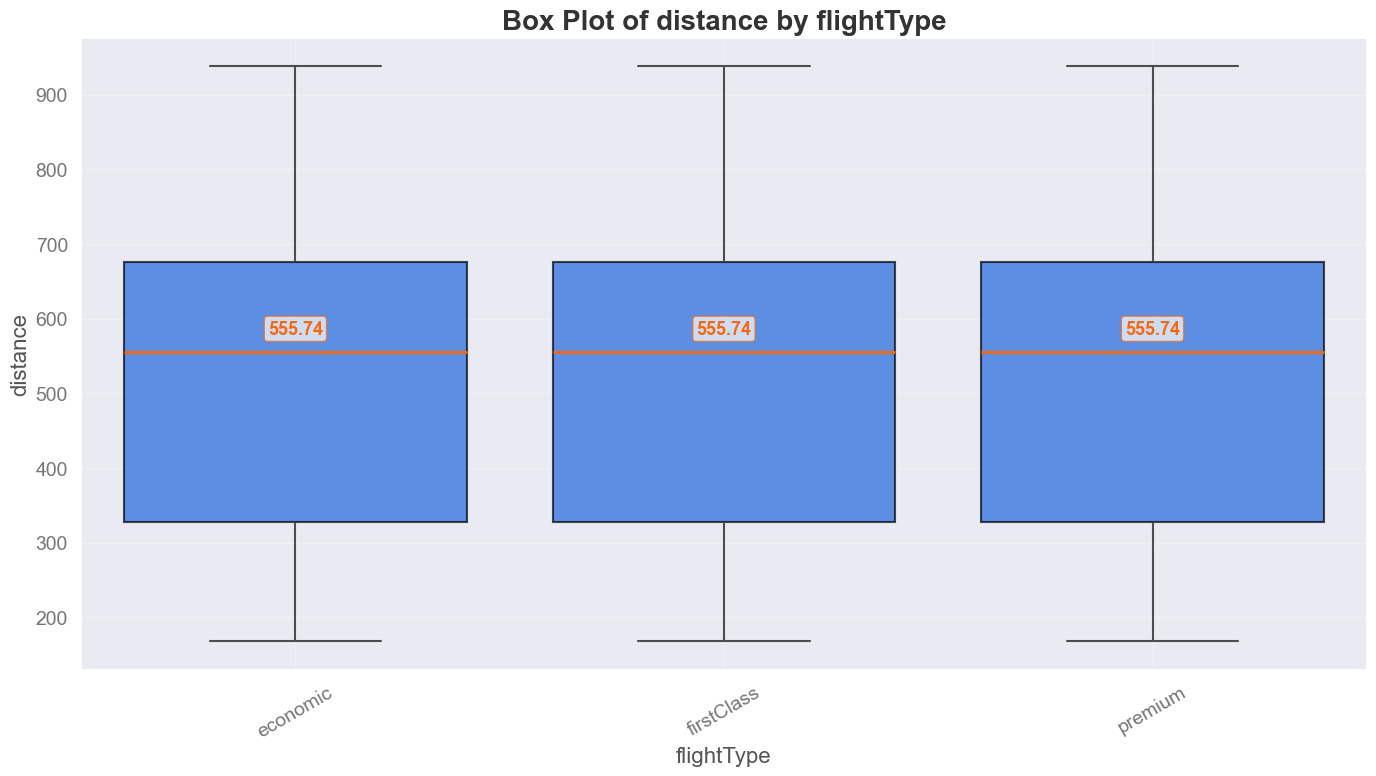

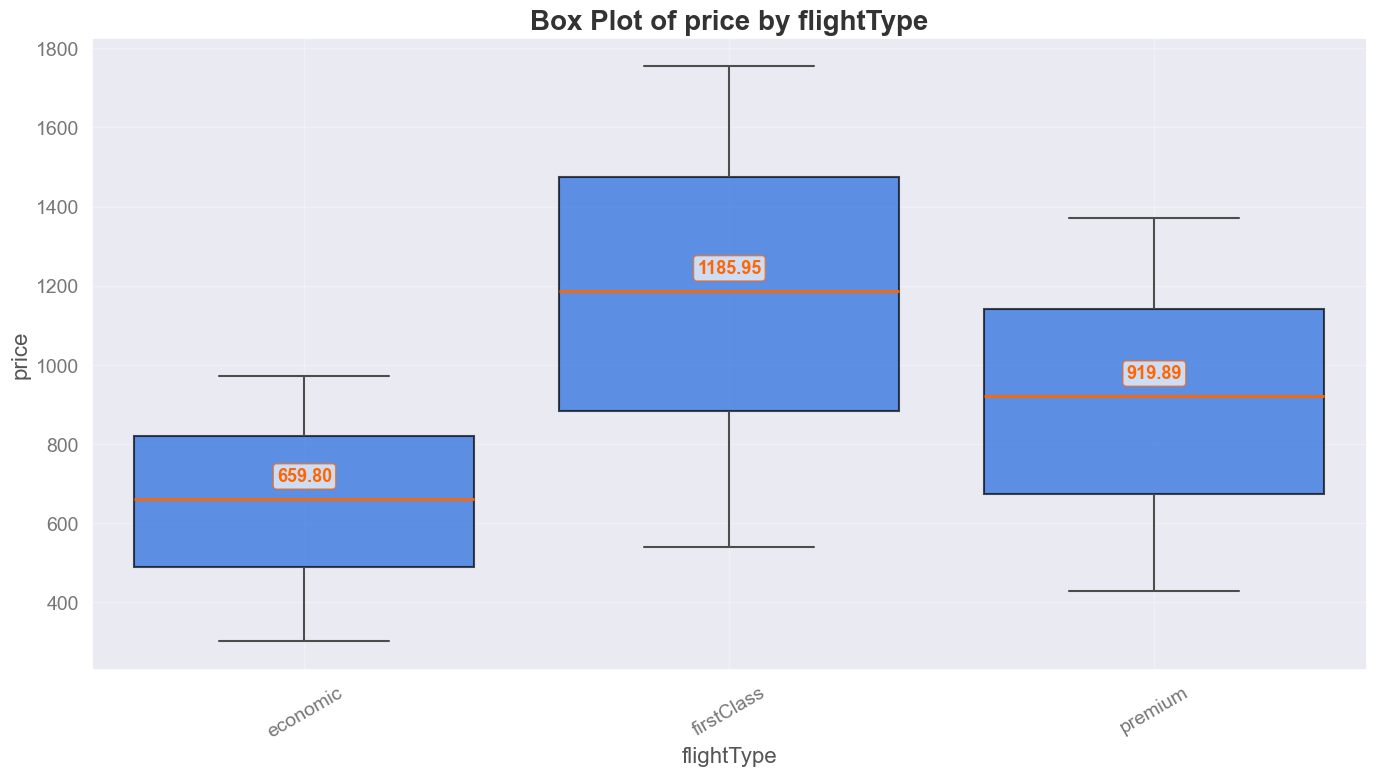

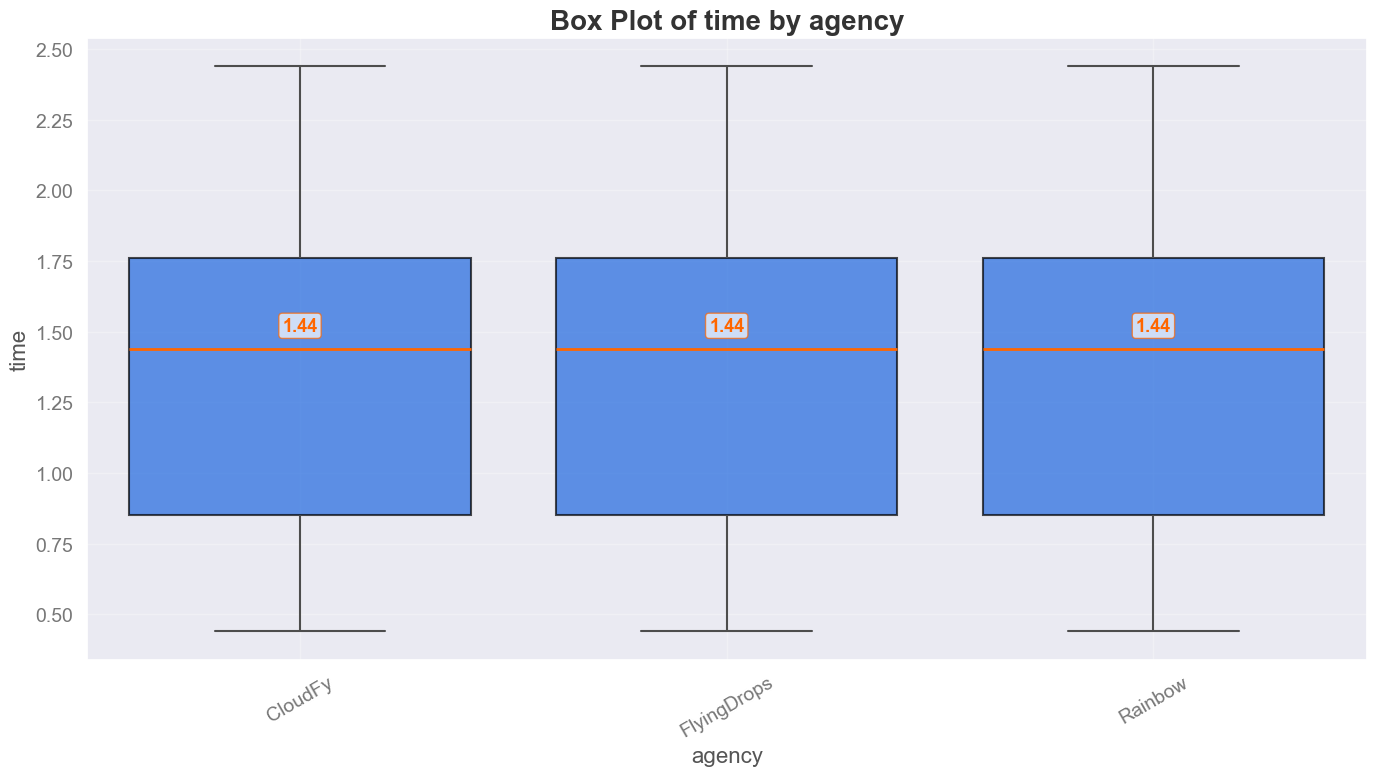

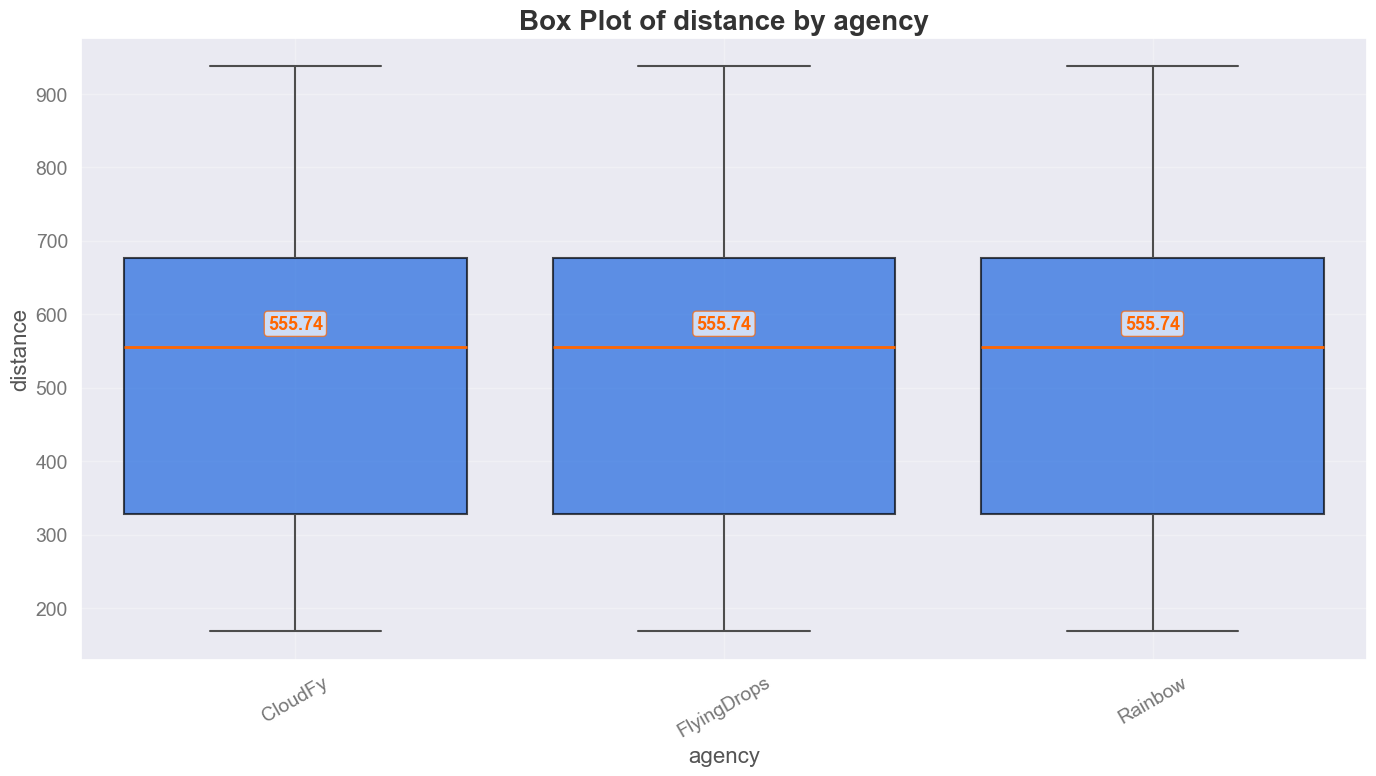

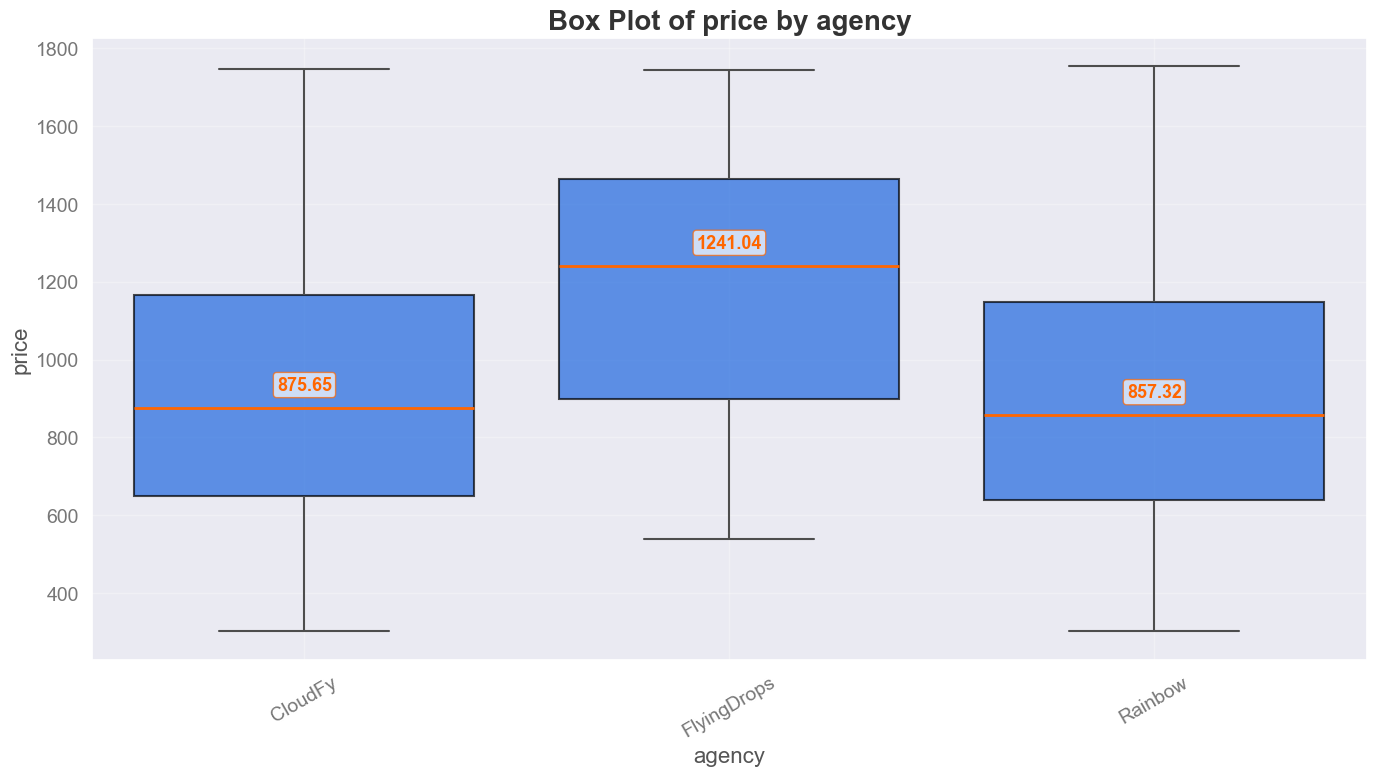

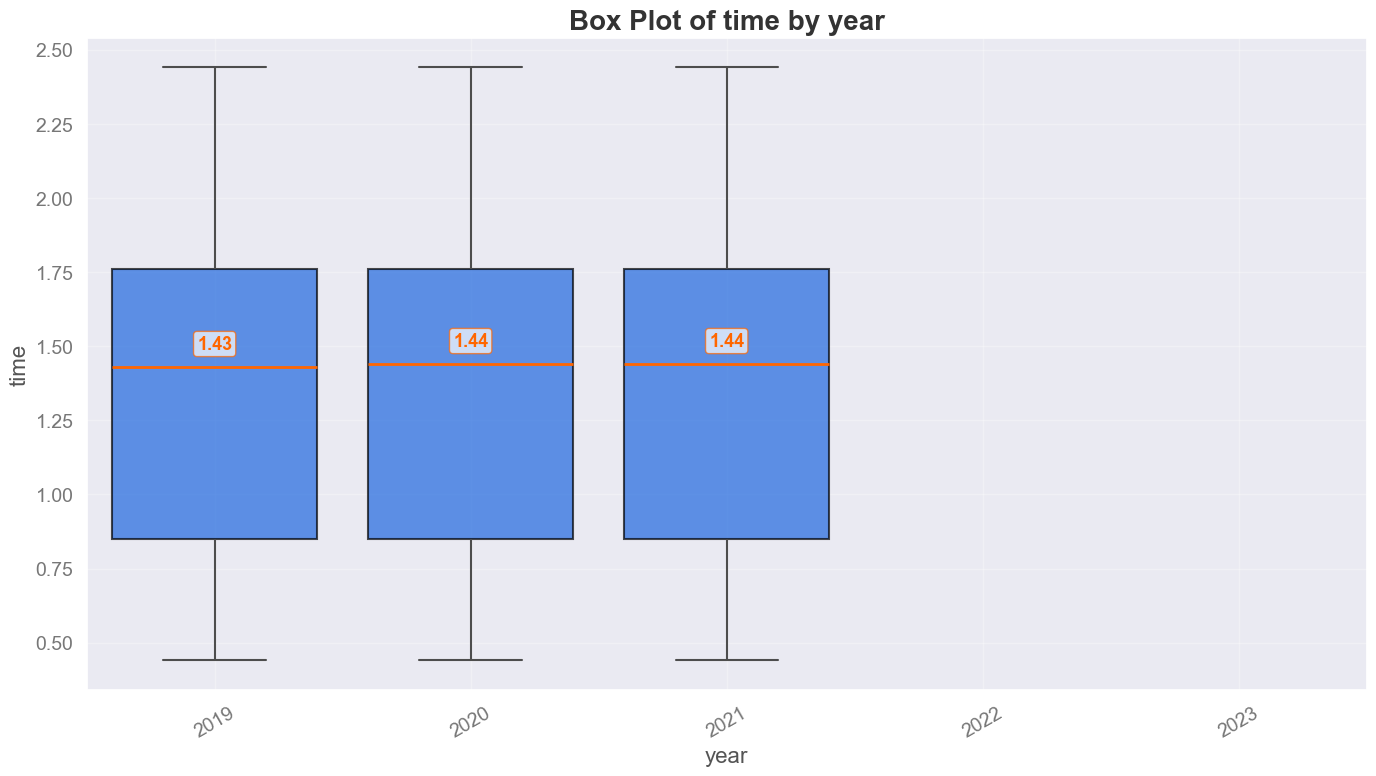

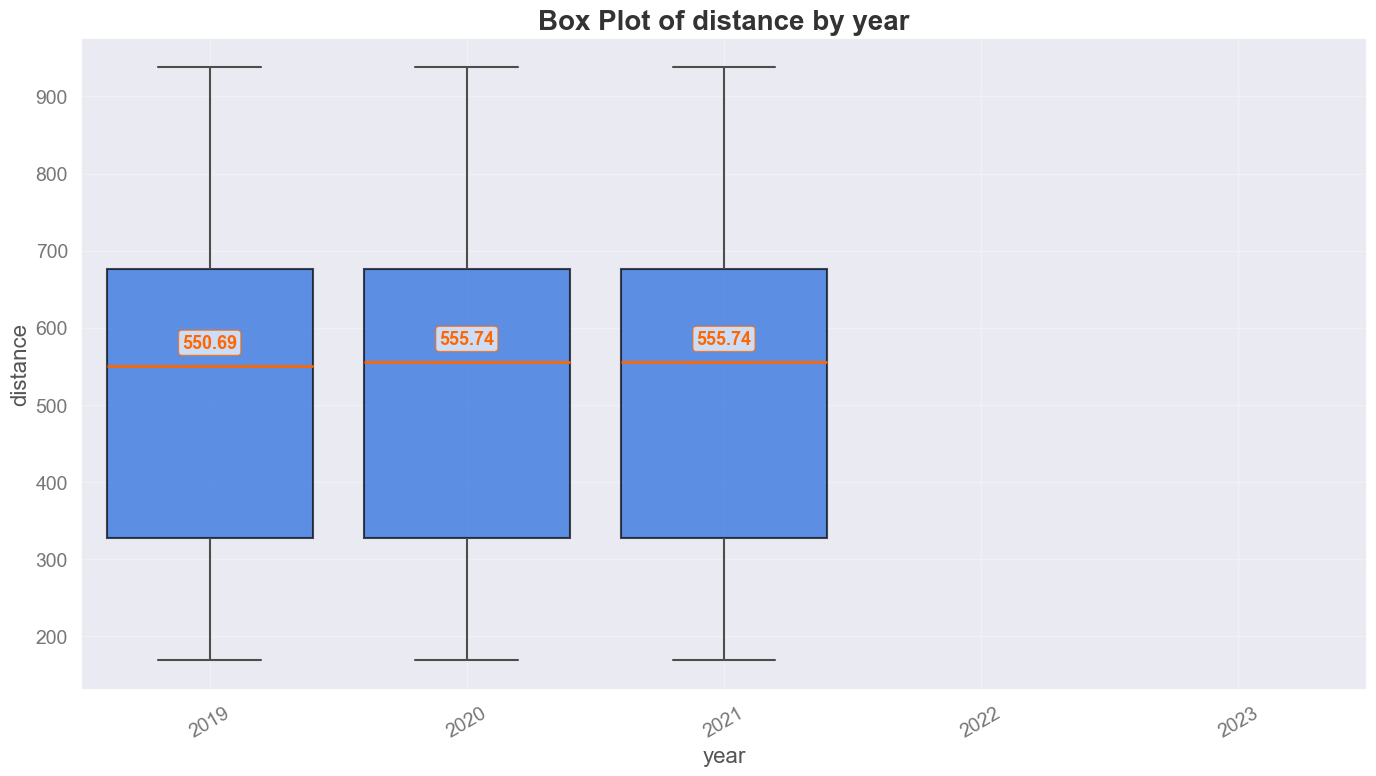

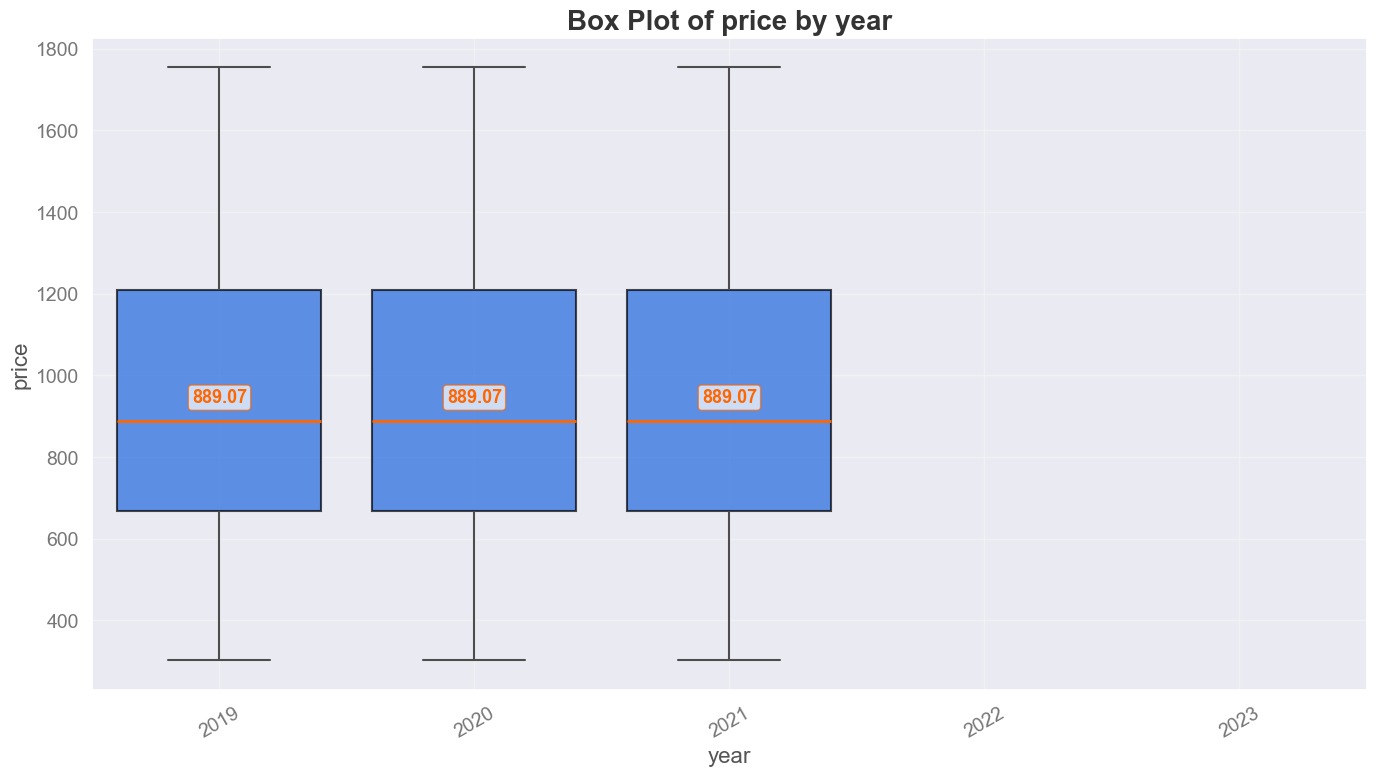

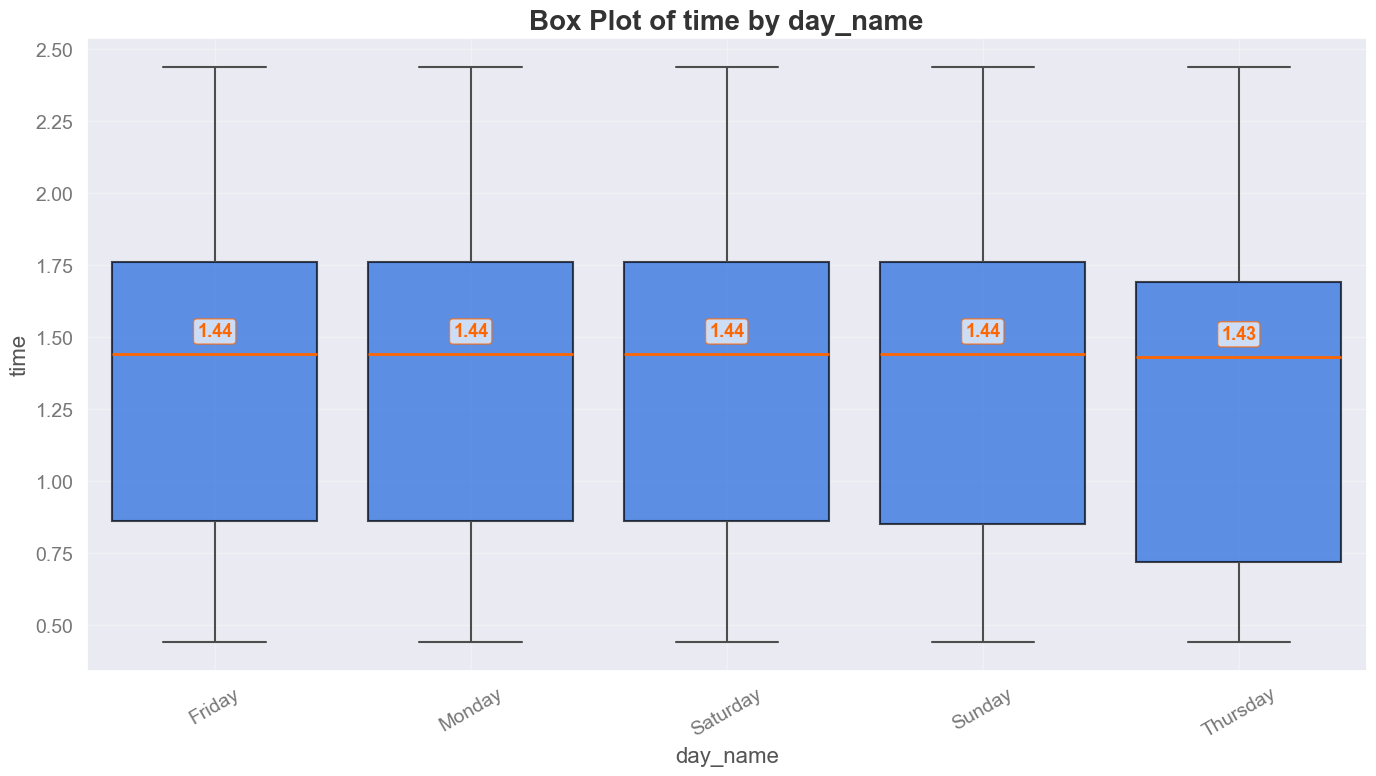

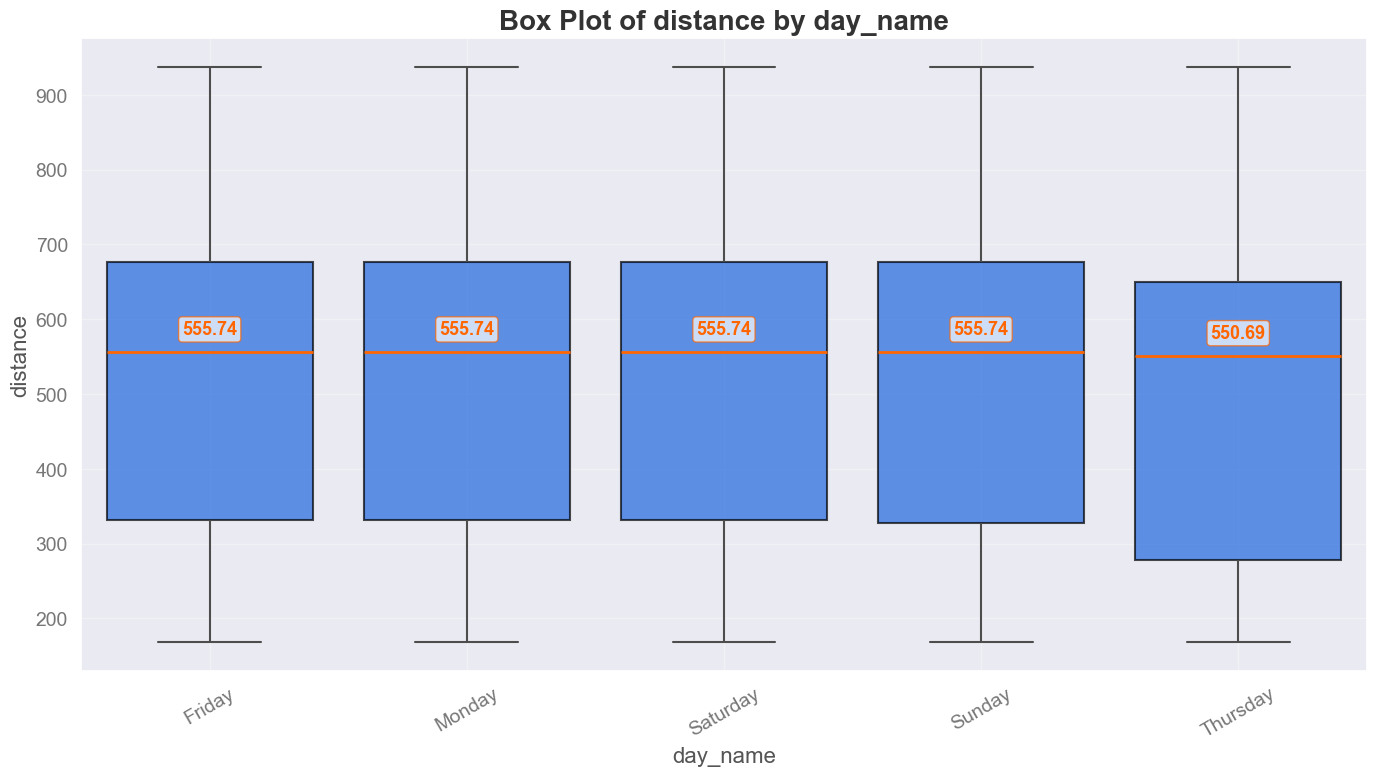

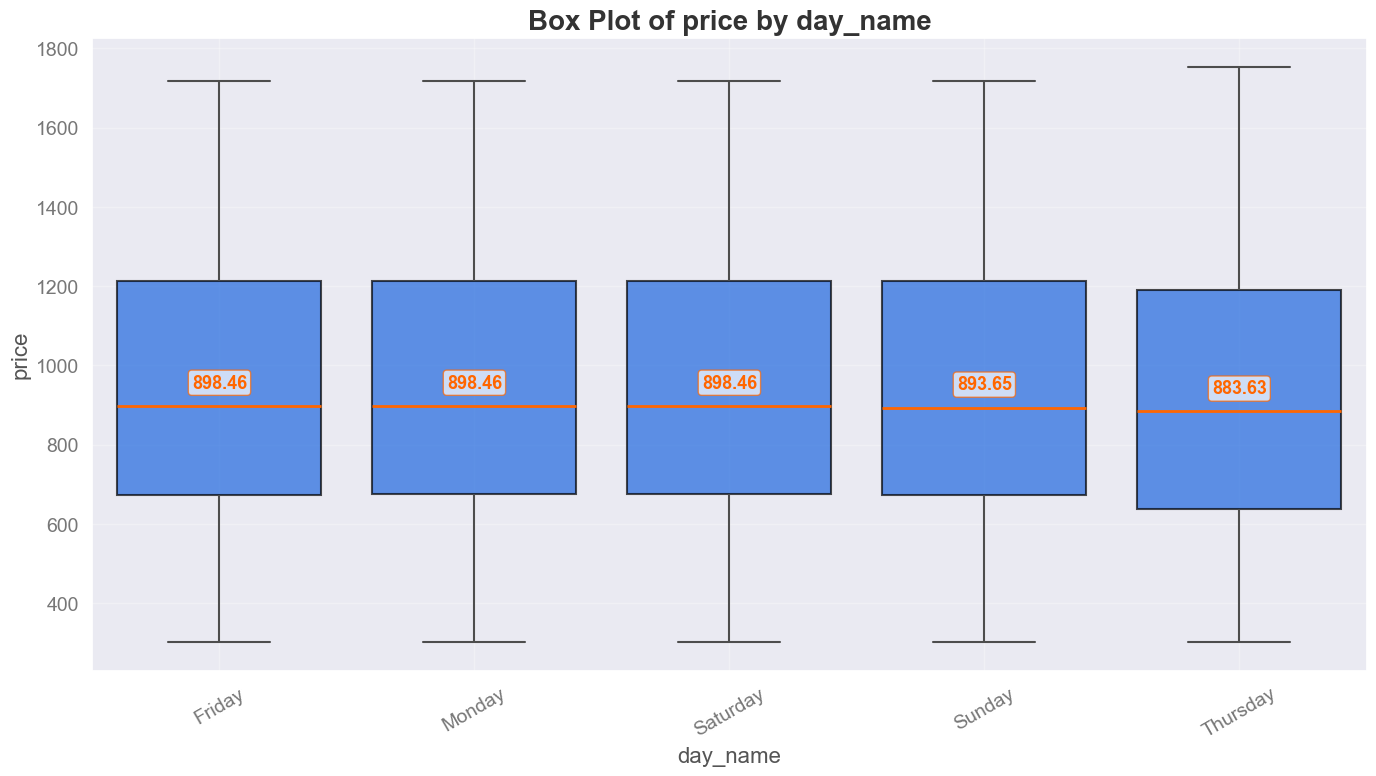

In [44]:
boxplot_bivariate(flights_train, flights_train_cat, ["time", "distance", "price"])


#### ✈️ Analysis of Flight Characteristics by Category

This section details how flight time, distance, and price vary across different categorical features.

#### 🗓️ By Day of the Week

*   **Flight Duration & Distance 🕰️📏:** Flight times and distances exhibit **high consistency across all days of the week**, with only minor variations observed.
*   **Ticket Prices 💰:** Prices generally remain **stable across the days**. A notable **dip in prices occurs on Thursdays**, which aligns with the observation that Thursdays experience higher flight volumes.

#### 📅 By Year

*   **Flight Duration, Distance & Price Over Time ⏳:** Analysis of data from 2019 through 2021 indicates **stability in flight times, distances, and prices**. Median values and data spreads for these variables show minimal change year-over-year, suggesting that despite potential seasonal trends, the average price point remained consistent during this period.

#### 🏢 By Agency

*   **Flight Duration & Distance 🚀:** The distributions for flight time and distance are **nearly identical across all analyzed agencies** (CloudFly, FlyingDrops, and Rainbow). No single agency demonstrates a significant deviation in terms of offering consistently faster or longer flights.
*   **Ticket Prices 💸:** A clear distinction in pricing is observed: **FlyingDrops presents noticeably higher median prices** compared to CloudFly and Rainbow. The latter two agencies offer prices that are largely similar to each other.

#### 💺 By Flight Type

*   **Flight Duration & Distance 🗺️:** Flights categorized as **Economic, firstClass, and premium show almost identical distributions** for both flight time and distance. The class of service does not correlate with significant differences in route length or flight duration.
*   **Ticket Prices 🏷️:** As anticipated, **firstClass flights are the most expensive**. Premium flights are priced in the mid-tier, while **economic class flights are the least expensive**. This confirms standard airline pricing structures.

#### 🌍 By Origin (`from`) and Destination (`to`)

*   **Flight Duration ⏱️:**
    *   Flights originating from or destined for **Salvador (BH) and Florianopolis (SC)** generally have **longer durations**.
    *   Conversely, flights involving **Natal (RN) and Sao Paulo (SP)** tend to have **shorter flight times**.
*   **Flight Distance ✈️:**
    *   Consistent with duration, routes to/from **Salvador (BH) and Florianopolis (SC)** also cover the **longest distances**.
    *   Routes involving **Natal (RN) and Sao Paulo (SP)** are typically the **shortest** in terms of distance.
*   **Ticket Prices 💲:**
    *   Journeys involving **Salvador (BH), Florianopolis (SC), and Aracaju (SE)** are associated with **higher ticket prices**.
    *   Flights to or from **Sao Paulo (SP) and Brasilia (DF)** are generally among the **least expensive**.

This revised version should be more suitable for your documentation needs.



### **Barplots Between Categorical columns and Numerical Agregations(Mean, Mode, Median, Sum)**

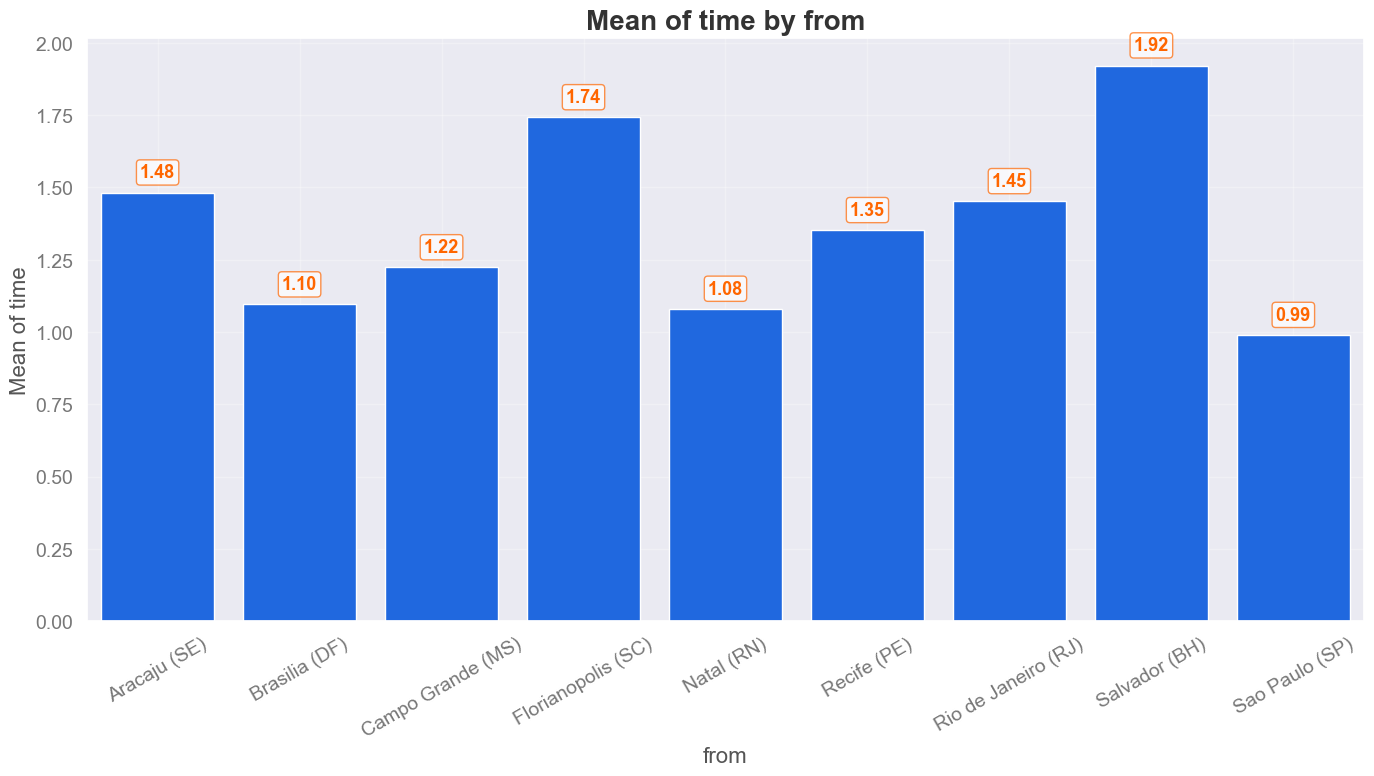

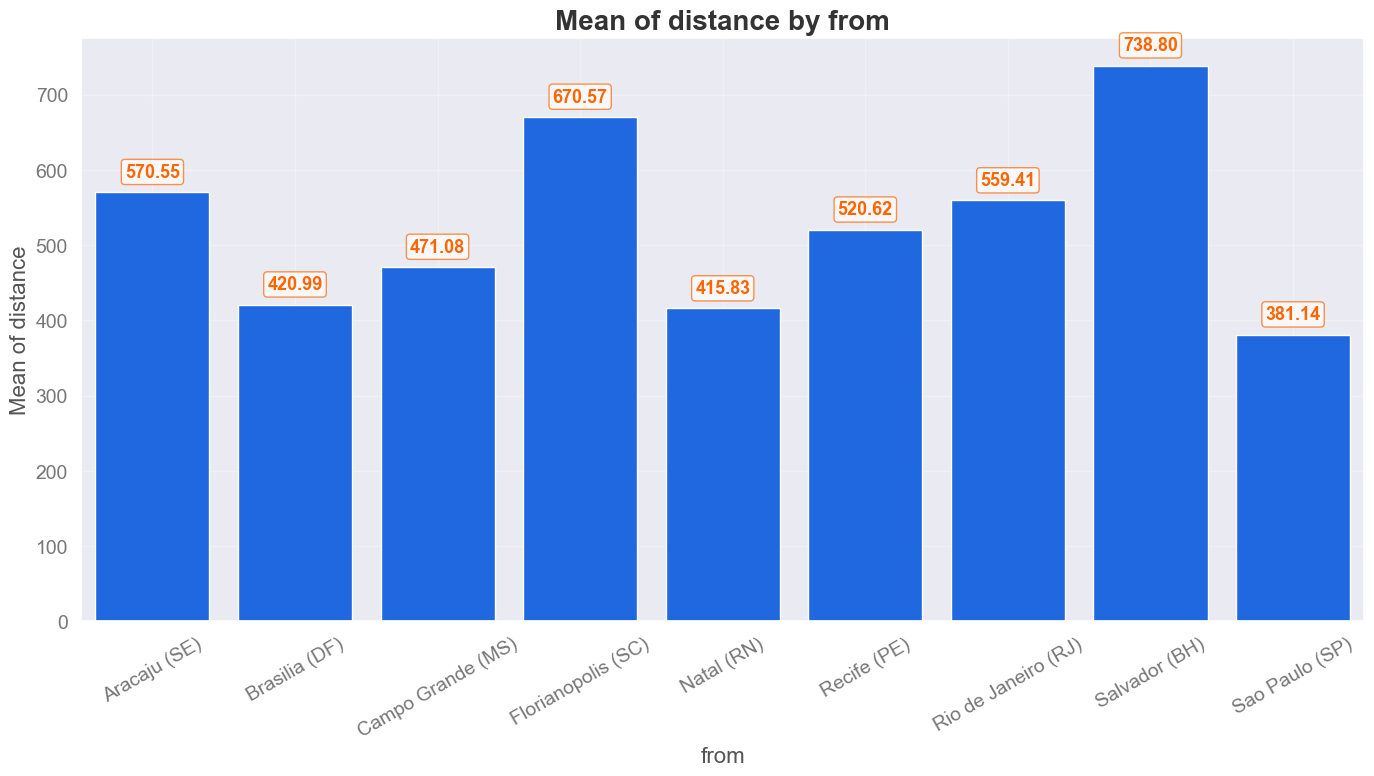

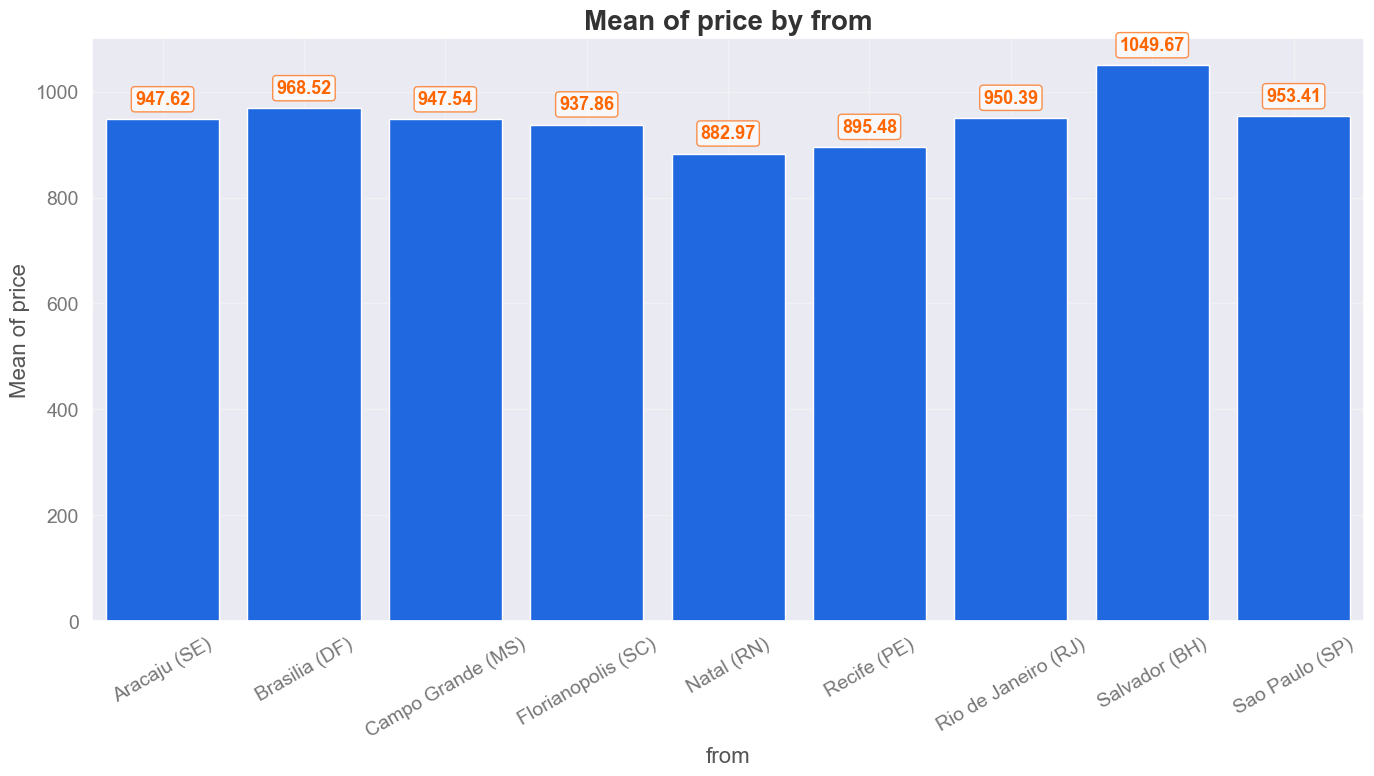

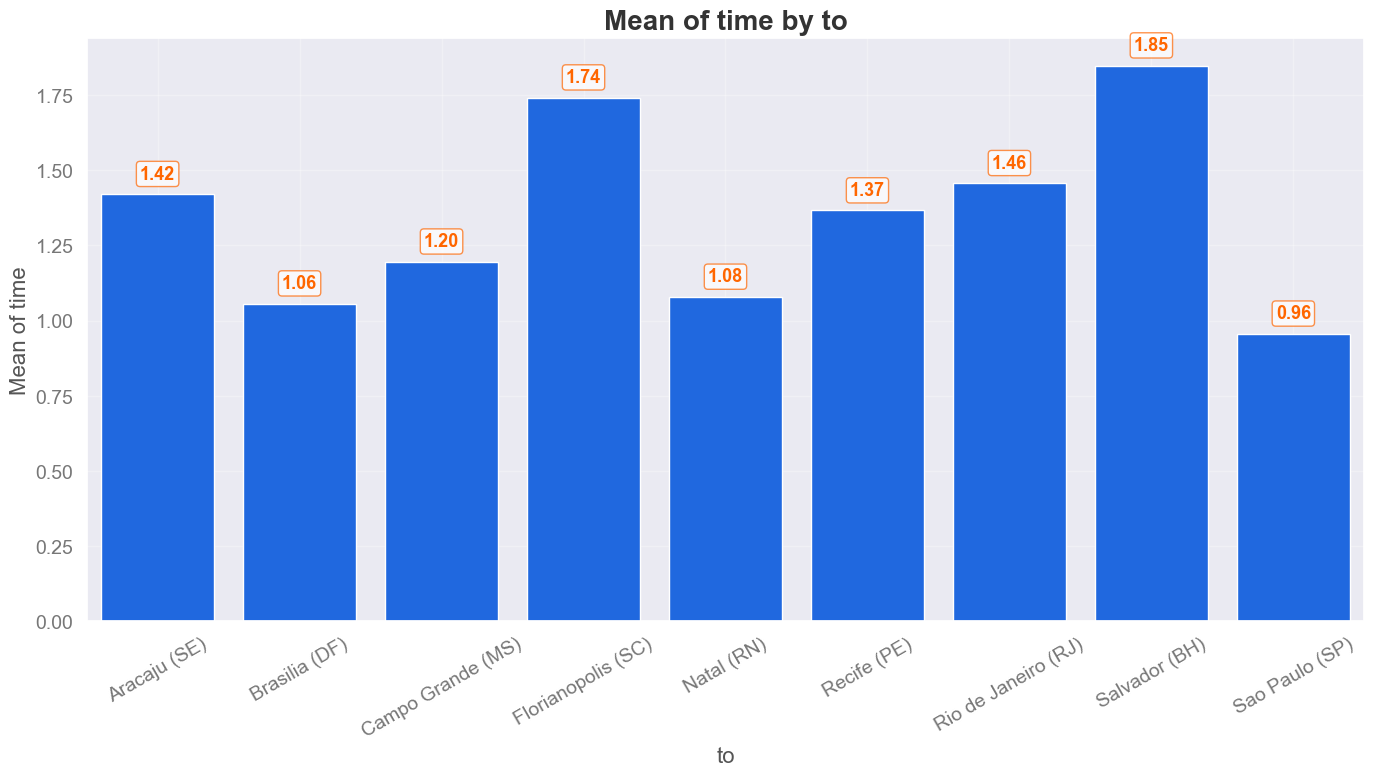

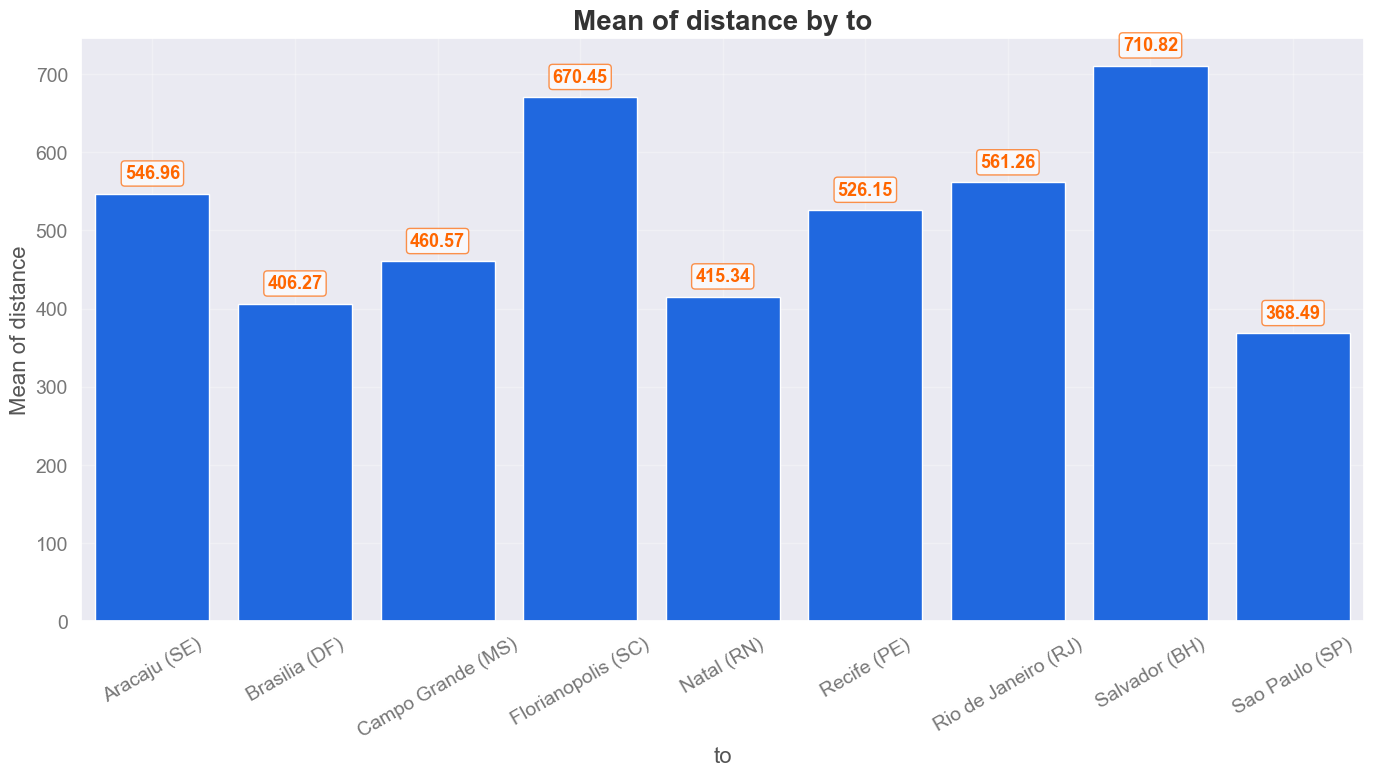

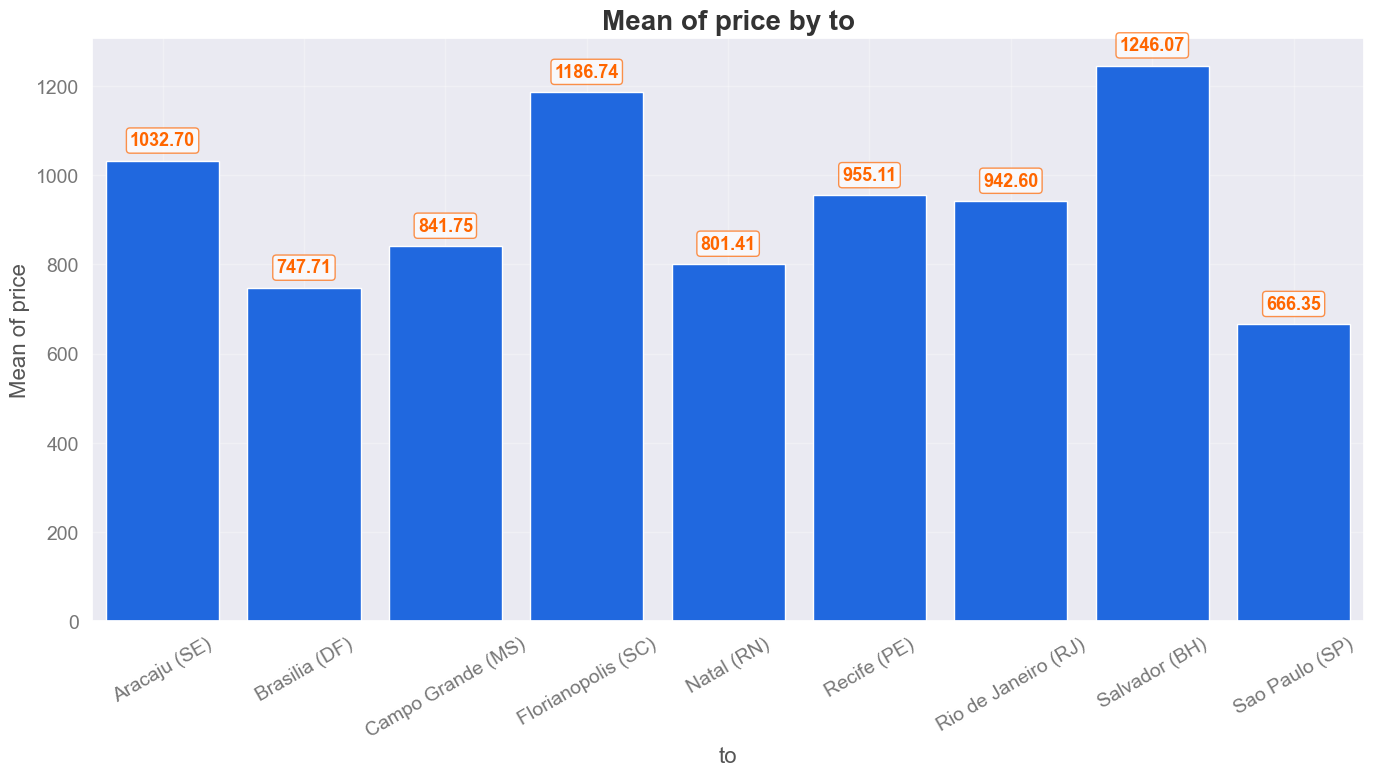

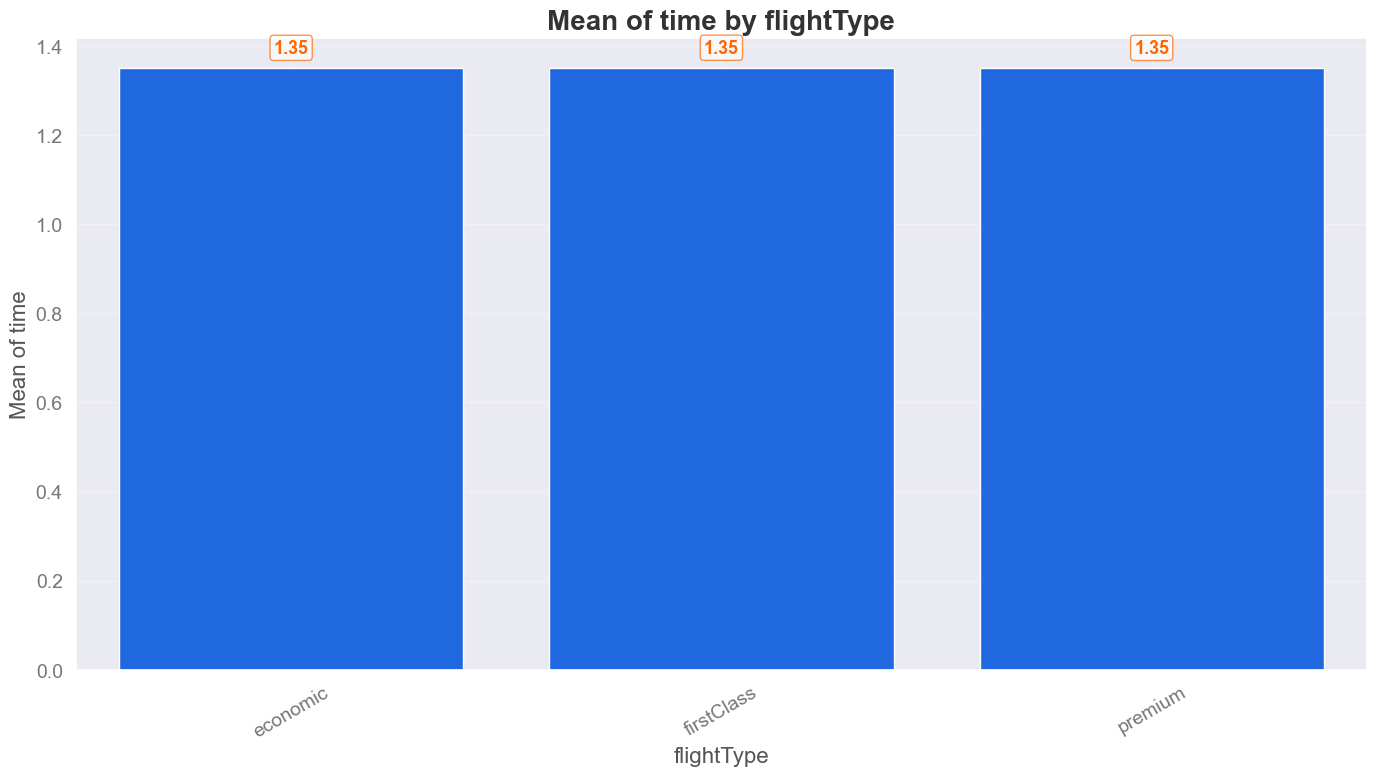

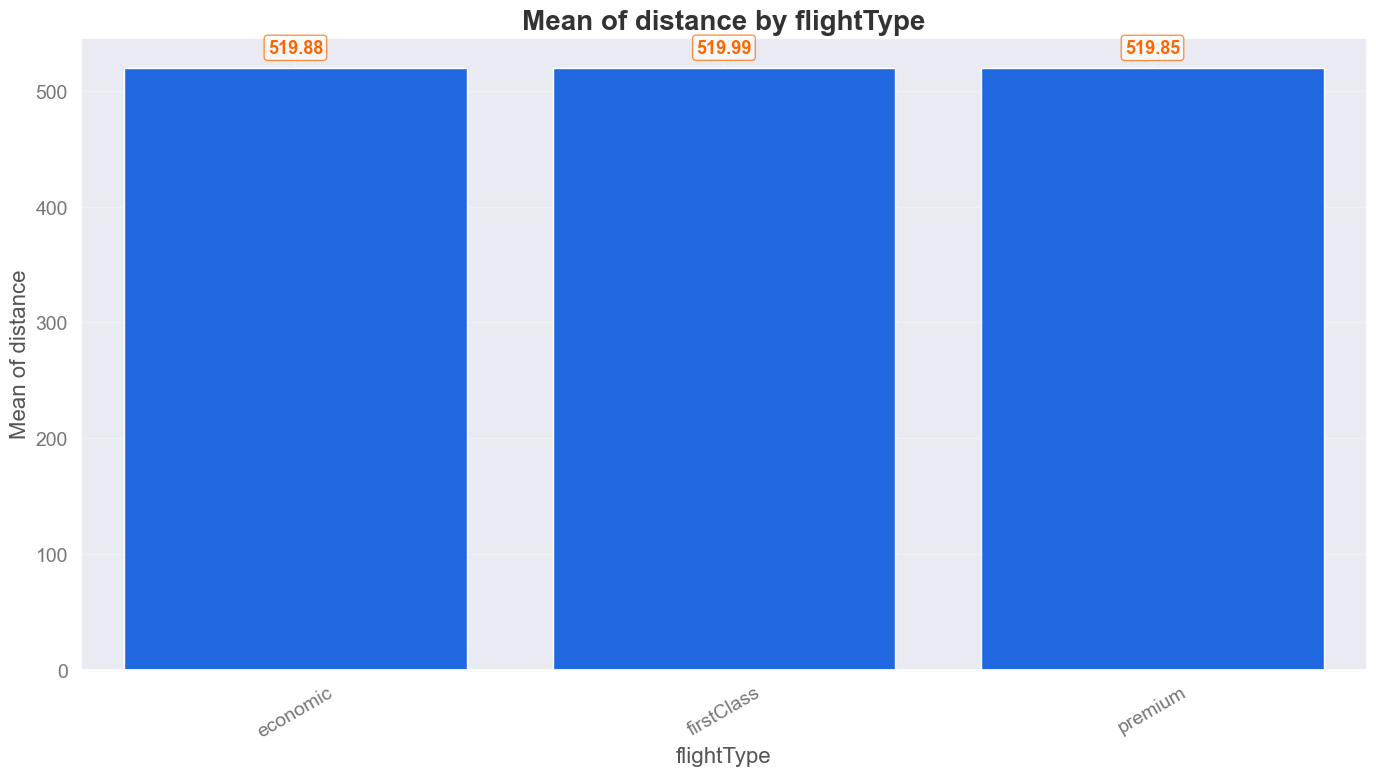

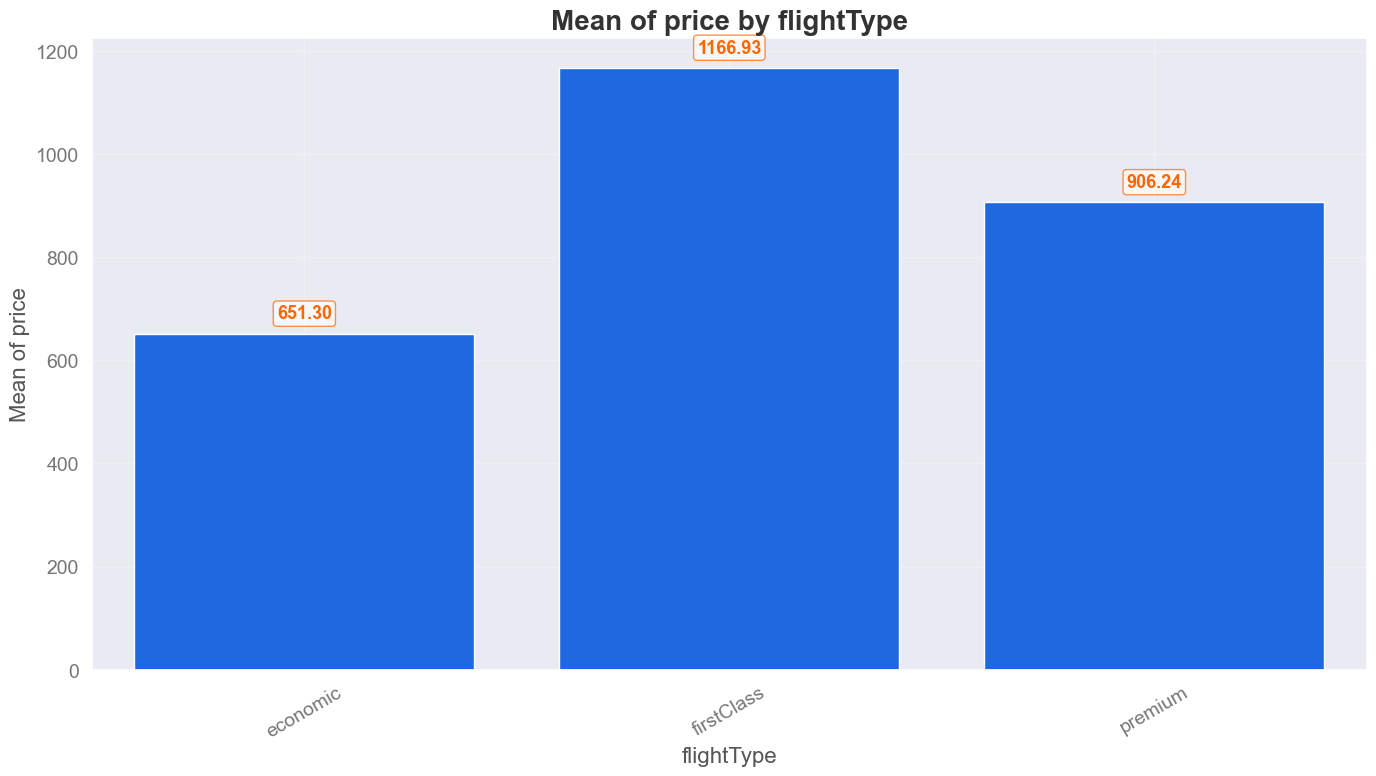

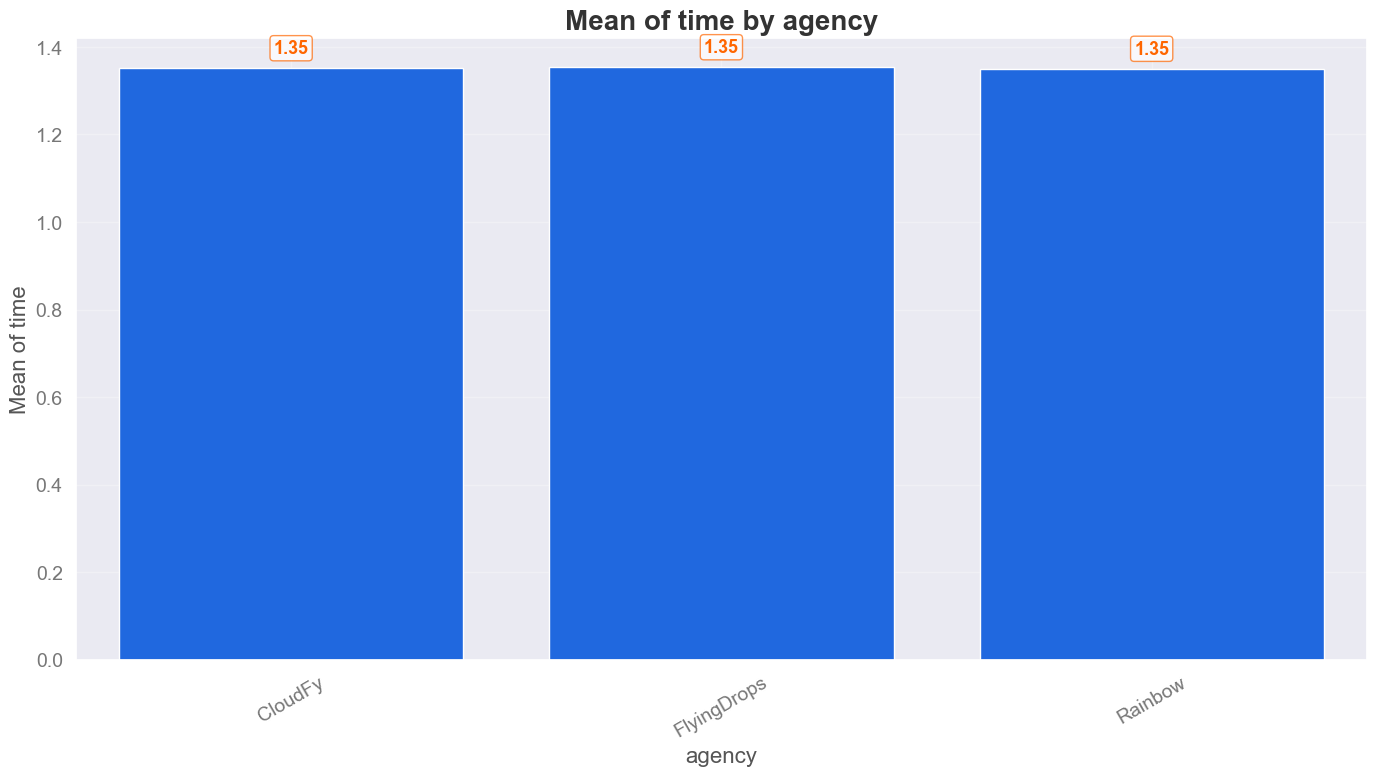

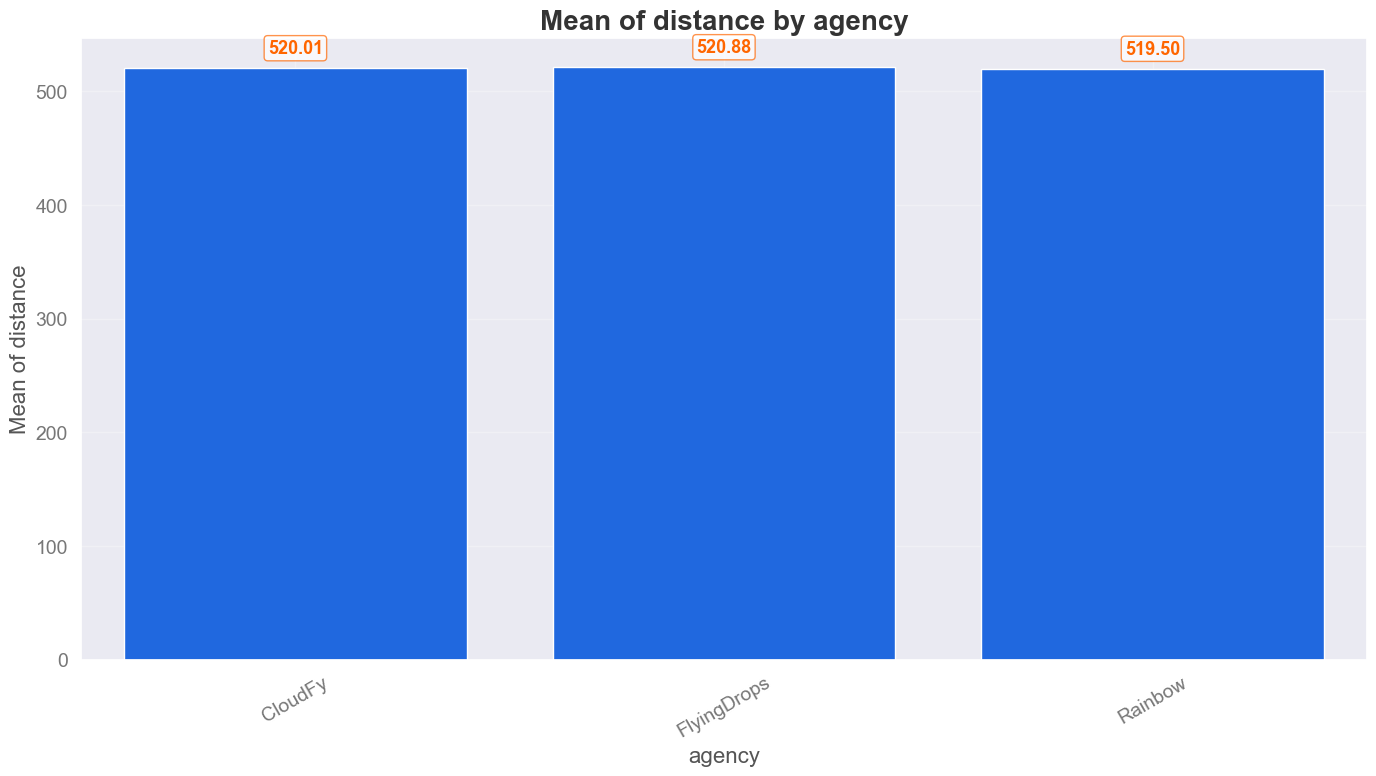

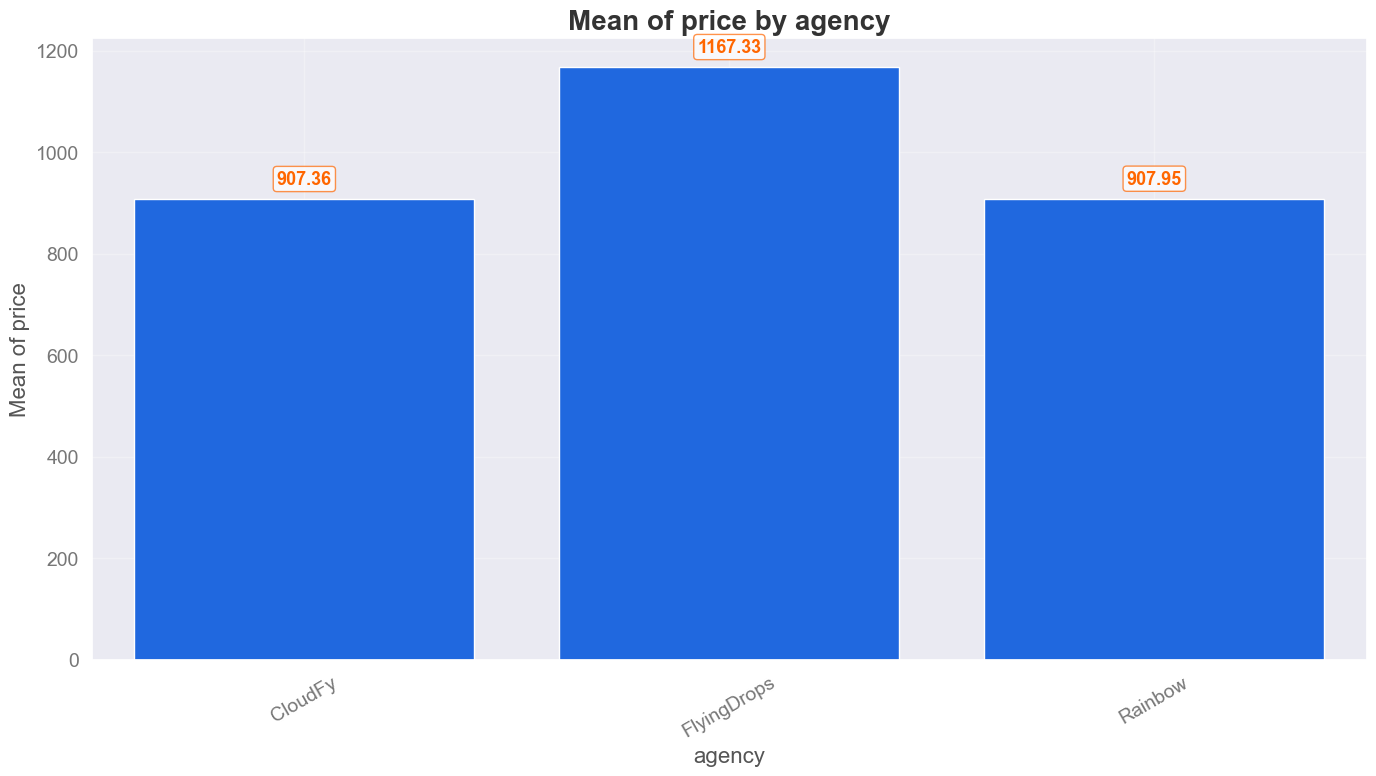

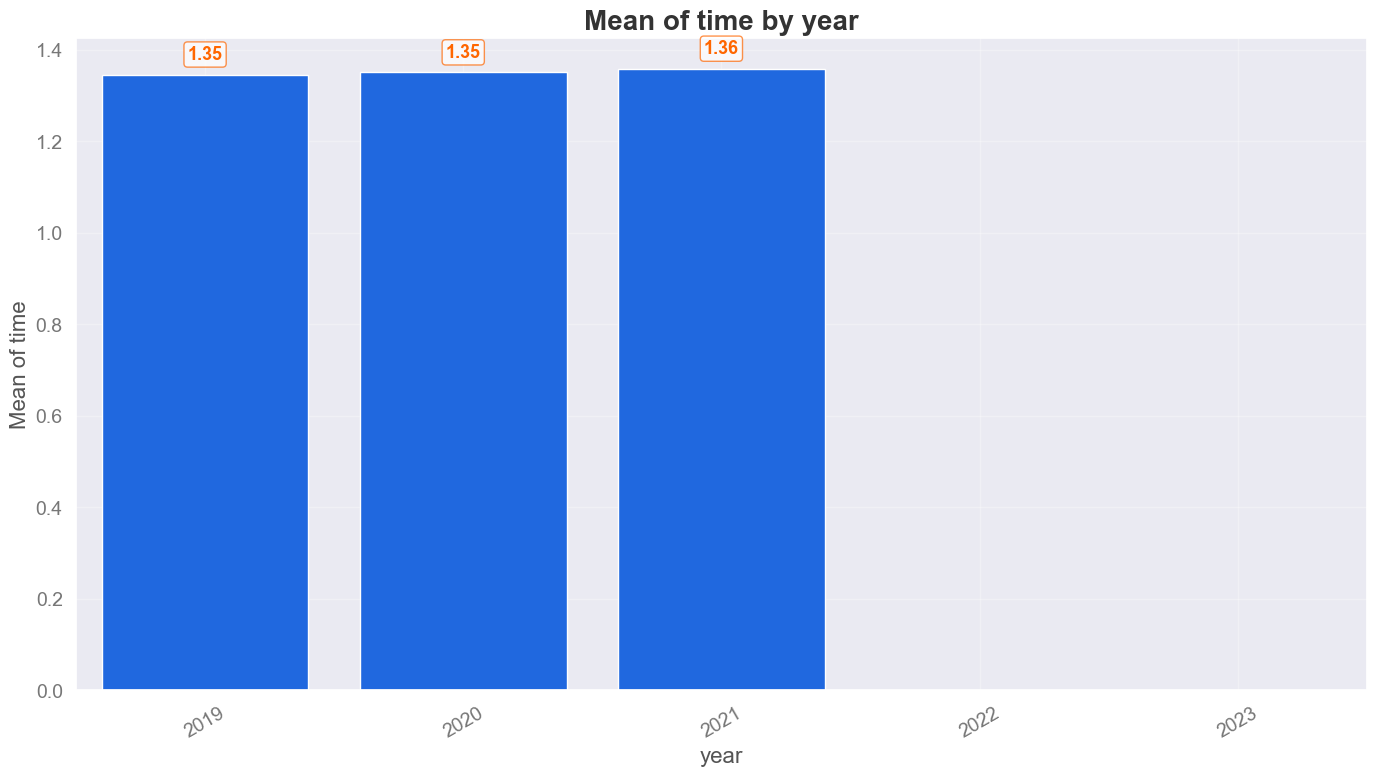

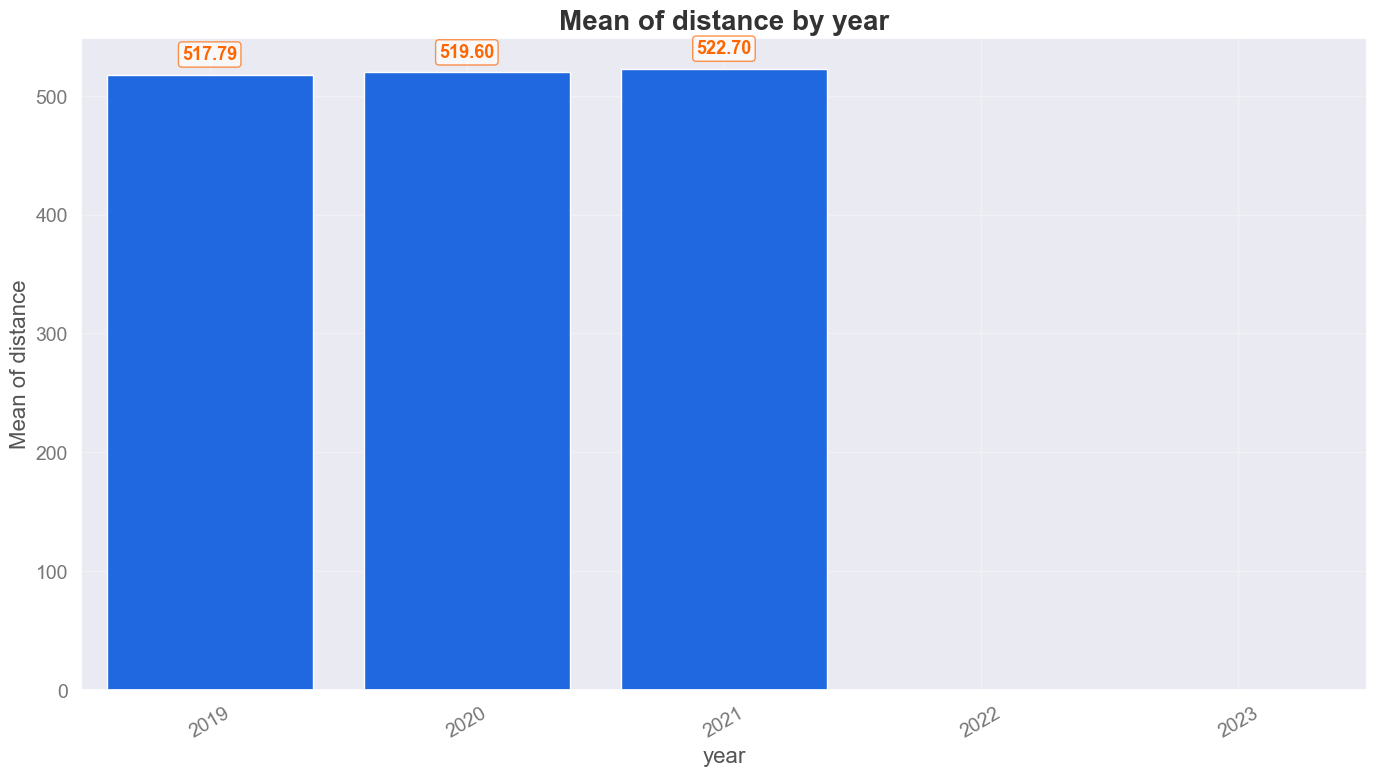

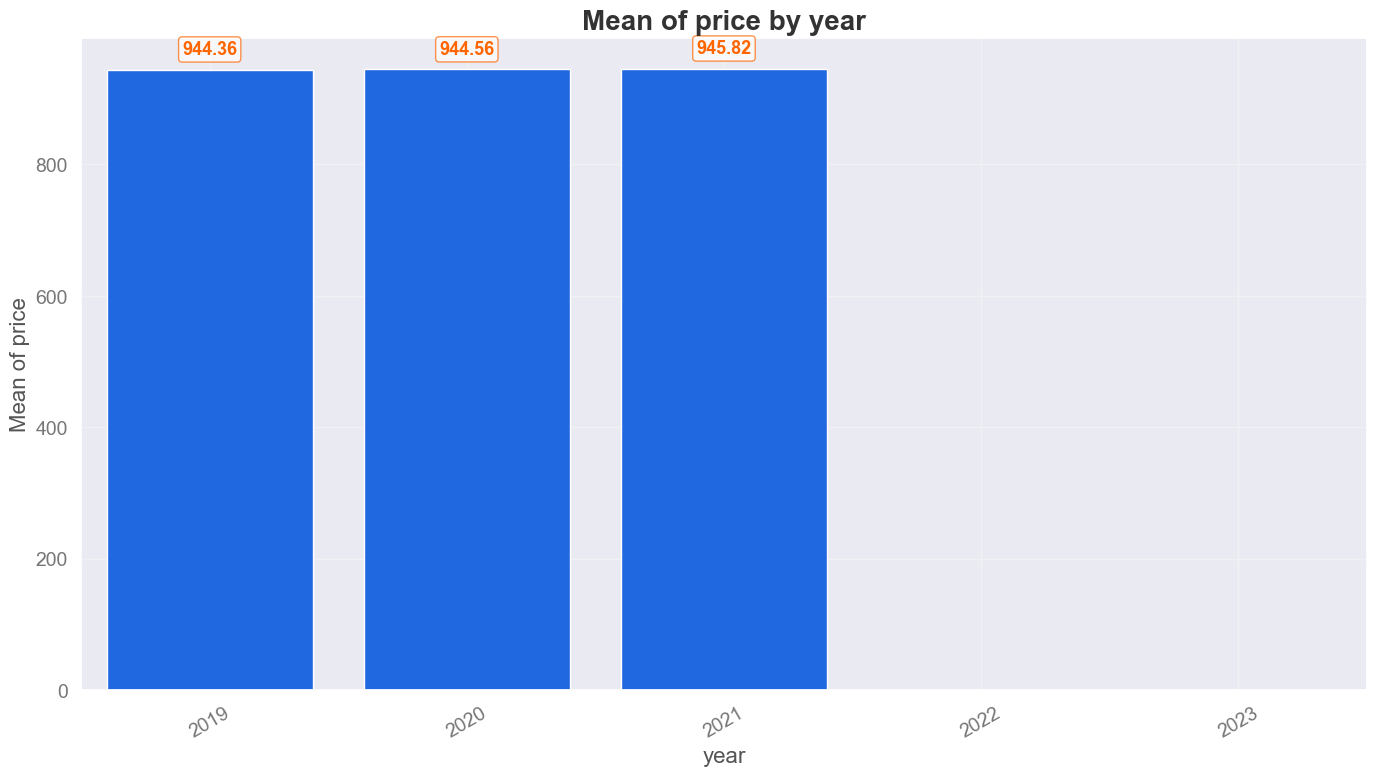

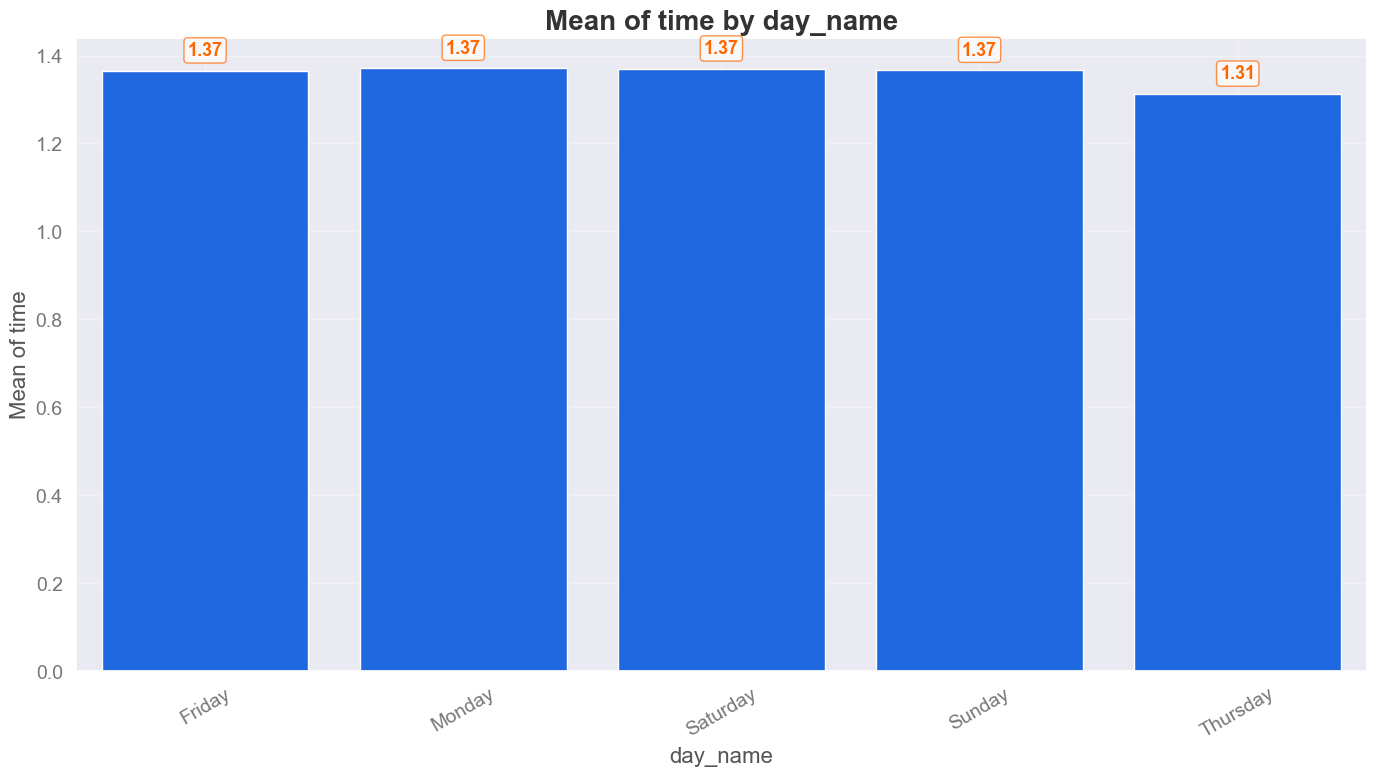

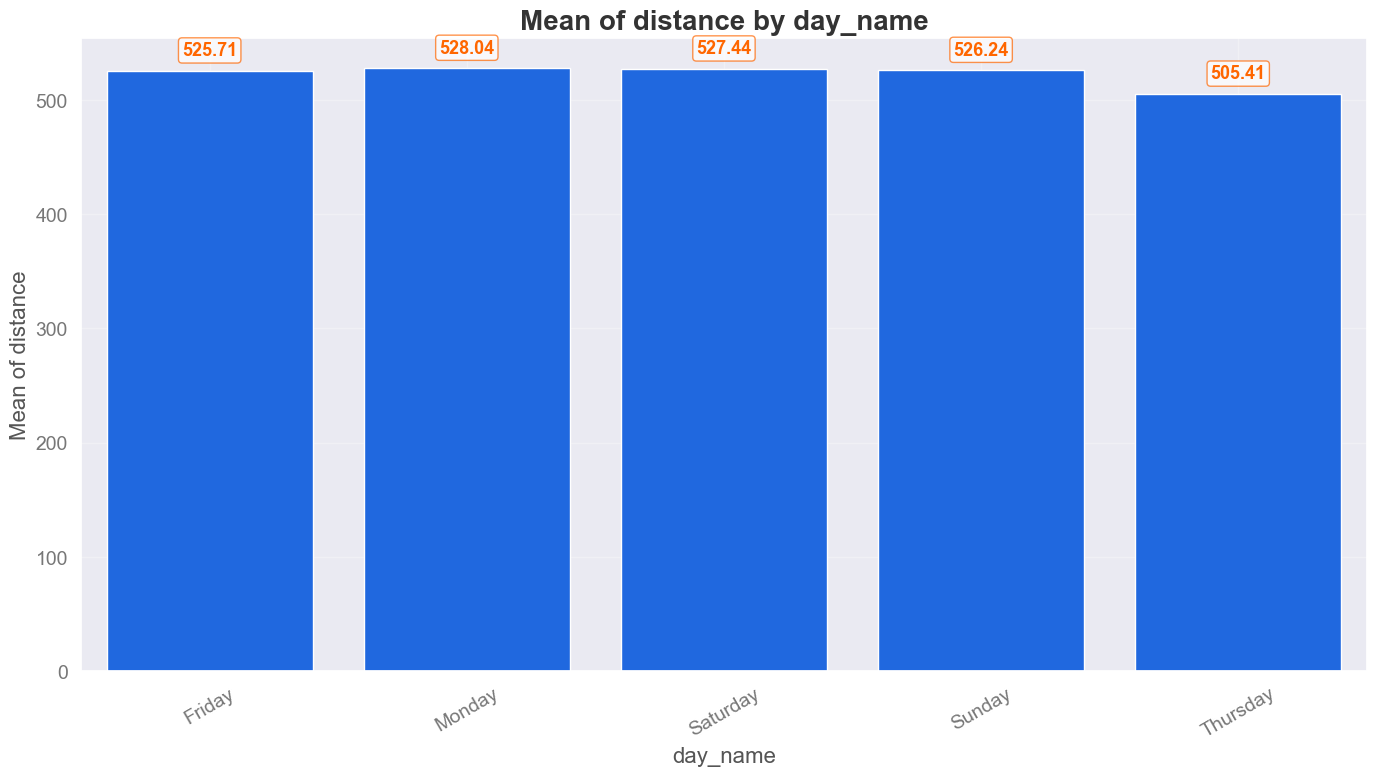

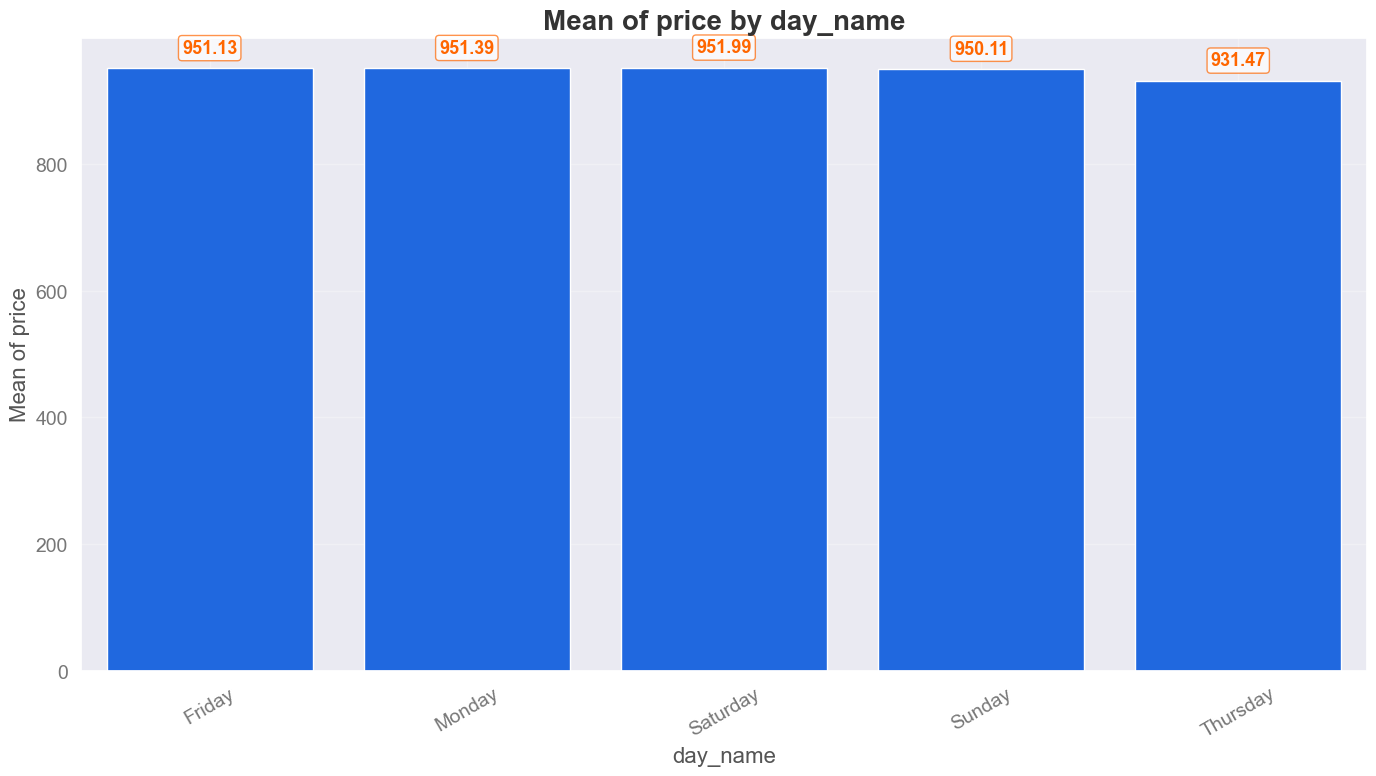

In [ ]:
# can change aggregation to mean, mode ,median and sum as well
barplot_bivariate(
    flights_train,
    flights_train_cat,
    ["time", "distance", "price"],
    "sum",
)



#### 📊 **Categorical vs. Numerical Aggregations: Bar Plot Insights**

This section details insights derived from bar plots showing aggregated numerical values (sum and mean) for different categorical features.

---

#### ➕ **Sum Aggregation Insights**

These insights reflect the total sums (e.g., total sales, total distance covered) for each category.

#### 🛫 By Origin (`from`)

*   **Total Price (Sales Volume) 💰:**
    *   The highest total sales were generated from flights originating in **Brasilia (DF)**, closely followed by **Campo Grande (MS)** and **Aracaju (SE)**.
    *   The lowest total sales were from flights originating in **Salvador (BH)**. This contrasts with its distance/time metrics, potentially indicating fewer, but possibly more expensive, tickets or simply fewer flights overall from this origin in the dataset.
*   **Total Time & Distance 🕰️📏:**
    *   These two metrics show similar trends. The greatest total flight distance and time were covered by flights originating from **Florianopolis (SC)**, followed by **Aracaju (SE)**.

#### 🎯 By Destination (`to`)

*   **Total Price (Sales Volume) 💰:**
    *   Flights destined for **Florianopolis (SC)** generated the highest total sales by a significant margin, followed by **Aracaju (SE)**.
    *   The lowest total sales were for flights destined to **Rio de Janeiro (RJ)**.
*   **Total Time & Distance 🕰️📏:**
    *   The trend for total time and distance precisely mirrors the trend observed for total price, with Florianopolis (SC) leading.

#### ✈️ By Flight Type

*   **Total Time & Distance 🕰️📏:**
    *   A consistent pattern is observed: **firstClass** flights account for the largest total flight time and distance, followed by **economic** class, and then closely by **premium** class.
*   **Total Price (Sales Volume) 💰:**
    *   Total sales are highest for **firstClass** flights, followed by **premium**, and then **economic** class.

#### 🏢 By Agency

*   **Total Time & Distance 🕰️📏:**
    *   **FlyingDrops** accounts for the lowest total flight time and distance.
    *   **Rainbow** shows the highest total time and distance by a substantial margin compared to FlyingDrops, and is closely followed by **CloudFy**.
*   **Total Price (Sales Volume) 💰:**
    *   The sales pattern mirrors the time and distance trends: **Rainbow** generated the highest total revenue, followed by **CloudFy**, with **FlyingDrops** earning the least.

#### 📅 By Year

*   **Total Time & Distance 🕰️📏:**
    *   The year **2020** recorded the highest total flight time and distance by a significant margin, followed by **2021** and then **2019**. This lower figure for 2019 may be attributable to the dataset starting in the 9th month of that year.
*   **Total Price (Sales Volume) 💰:**
    *   Total sales follow a similar trend to total time and distance, with 2020 being the highest.

#### 🗓️ By Day of the Week (`day_name`)

*   **Total Time, Distance, & Price 🕰️📏💰:**
    *   **Thursday** exhibits the highest total flight distance, total flight time, and total sales. This could be linked to the observation that flights are comparably cheaper on Thursdays, potentially driving higher volume, or other contributing factors.

---

#### ⚖️ **Mean Aggregation Insights**

These insights reflect the average values (e.g., average price, average flight duration) for each category.

#### 🛫 By Origin (`from`)

*   **Mean Time & Distance 🕰️📏:**
    *   These metrics show similar trends. Flights originating from **Salvador (BH)** have the highest mean flight time and distance, followed by **Florianopolis (SC)** and **Aracaju (SE)**.
*   **Mean Price 💰:**
    *   The highest mean price is for flights originating from **Salvador (BH)**, followed by **Brasilia (DF)** and **Rio de Janeiro (RJ)**.

#### 🎯 By Destination (`to`)

*   **Mean Time & Distance 🕰️📏:**
    *   A similar pattern is observed: **Salvador (BH)** has the highest mean flight time and distance for arrivals, followed by **Florianopolis (SC)** and **Aracaju (SE)**.
    *   The lowest mean time and distance are for flights arriving at **Sao Paulo (SP)** and **Brasilia (DF)**.
*   **Mean Price 💰:**
    *   The highest mean price is for flights destined to **Salvador (BH)**, followed by **Florianopolis (SC)** and **Aracaju (SE)**.
    *   The lowest mean price is for flights arriving at **Sao Paulo (SP)**.

#### ✈️ By Flight Type

*   **Mean Time & Distance 🕰️📏:**
    *   Mean flight time and distance are **similar across all flight types** (Economic, firstClass, premium).
*   **Mean Price 💰:**
    *   **firstClass** flights have the highest mean price, followed by **premium**, and then **economic** class.

#### 🏢 By Agency

*   **Mean Time & Distance 🕰️📏:**
    *   Mean flight time and distance show **similar values across the different agencies**.
*   **Mean Price 💰:**
    *   **FlyingDrops** has the highest mean price.
    *   **Rainbow** and **CloudFy** have similar, lower mean prices compared to FlyingDrops.

#### 📅 By Year

*   **Mean Time, Distance, & Price 🕰️📏💰:**
    *   Mean flight distance, mean price, and mean time are all **relatively similar across the years** (2019-2022, where data is available).

#### 🗓️ By Day of the Week (`day_name`)

*   **Mean Time & Distance 🕰️📏:**
    *   Mean flight time and distance are **marginally lowest on Thursday**. Values for other days of the week are quite similar to each other.
*   **Mean Price 💰:**
    *   The **mean price is lower on Thursday** compared to other days of the week.